<small><i>October 2021 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Unsupervised learning in Keras

+ Autoencoders
+ Pretraining
+ Manifold Learning
+ Sparse Coding
+ A brief note on Variational Autoencoders


# Autoencoders

Let us train a simple autoencoder with a physical bottleneck. 

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

In [3]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [11]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="linear"),
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])


from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

model.fit(train, train, epochs=300, batch_size = 32)


Epoch 1/300
20/54 [==========>...................] - ETA: 0s - loss: 105.7556 - mean_squared_error: 105.7556

2023-08-27 16:39:20.622338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 6ms/step - loss: 91.4152 - mean_squared_error: 91.4152
Epoch 2/300
54/54 [==============================] - 0s 5ms/step - loss: 62.9684 - mean_squared_error: 62.9684
Epoch 3/300
54/54 [==============================] - 0s 5ms/step - loss: 47.3836 - mean_squared_error: 47.3836
Epoch 4/300
54/54 [==============================] - 0s 5ms/step - loss: 37.6988 - mean_squared_error: 37.6988
Epoch 5/300
54/54 [==============================] - 0s 5ms/step - loss: 32.0438 - mean_squared_error: 32.0438
Epoch 6/300
54/54 [==============================] - 0s 5ms/step - loss: 29.0459 - mean_squared_error: 29.0459
Epoch 7/300
54/54 [==============================] - 0s 5ms/step - loss: 27.4453 - mean_squared_error: 27.4453
Epoch 8/300
54/54 [==============================] - 0s 5ms/step - loss: 26.4835 - mean_squared_error: 26.4835
Epoch 9/300
54/54 [==============================] - 0s 5ms/step - loss: 25.7668 - mean_squared_error: 25.7668
Epoch 10/300


54/54 [==============================] - 0s 5ms/step - loss: 11.4596 - mean_squared_error: 11.4596
Epoch 147/300
54/54 [==============================] - 0s 5ms/step - loss: 11.4322 - mean_squared_error: 11.4322
Epoch 148/300
54/54 [==============================] - 0s 5ms/step - loss: 11.4091 - mean_squared_error: 11.4091
Epoch 149/300
54/54 [==============================] - 0s 5ms/step - loss: 11.3840 - mean_squared_error: 11.3840
Epoch 150/300
54/54 [==============================] - 0s 5ms/step - loss: 11.3595 - mean_squared_error: 11.3595
Epoch 151/300
54/54 [==============================] - 0s 5ms/step - loss: 11.3357 - mean_squared_error: 11.3357
Epoch 152/300
54/54 [==============================] - 0s 5ms/step - loss: 11.3130 - mean_squared_error: 11.3130
Epoch 153/300
54/54 [==============================] - 0s 5ms/step - loss: 11.2896 - mean_squared_error: 11.2896
Epoch 154/300
54/54 [==============================] - 0s 5ms/step - loss: 11.2617 - mean_squared_error: 11.26

54/54 [==============================] - 0s 5ms/step - loss: 8.6020 - mean_squared_error: 8.6020
Epoch 292/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5913 - mean_squared_error: 8.5913
Epoch 293/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5791 - mean_squared_error: 8.5791
Epoch 294/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5689 - mean_squared_error: 8.5689
Epoch 295/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5564 - mean_squared_error: 8.5564
Epoch 296/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5437 - mean_squared_error: 8.5437
Epoch 297/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5343 - mean_squared_error: 8.5343
Epoch 298/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5232 - mean_squared_error: 8.5232
Epoch 299/300
54/54 [==============================] - 0s 5ms/step - loss: 8.5110 - mean_squared_error: 8.5110
Epoch 300/300
5

Let us check some predictions for training

1/1 [==============================] - 0s 27ms/step


2023-08-27 16:40:44.329096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


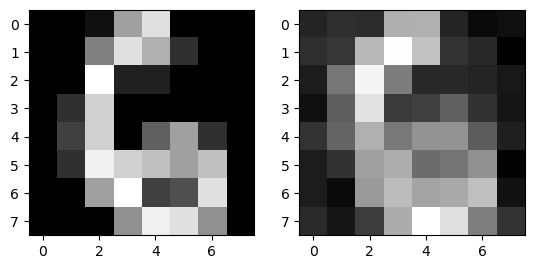

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 101
reconstruction = model.predict(train[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

The same for test

1/1 [==============================] - 0s 12ms/step


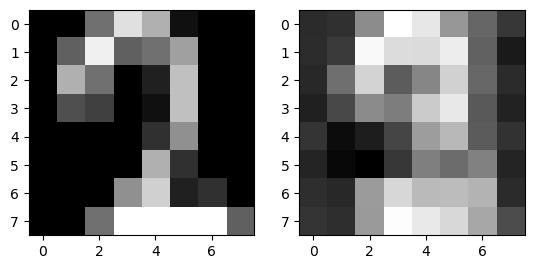

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Learning representations and pretraining

Let us use the intermediate representation for something.

In [49]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.2)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = keras.layers.Dense(16,activation="relu")(encoder_output)
x = keras.layers.Dense(32,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [50]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])


from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

history = model.fit(train, train, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100


2023-08-27 16:55:42.024405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 18ms/step - loss: 65.5110 - accuracy: 0.0029 - val_loss: 62.6939 - val_accuracy: 0.0265
Epoch 2/100
 6/43 [===>..........................] - ETA: 0s - loss: 65.5647 - accuracy: 0.0052    

2023-08-27 16:55:43.058667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 12ms/step - loss: 63.3837 - accuracy: 0.0044 - val_loss: 59.8747 - val_accuracy: 0.0294
Epoch 3/100
43/43 [==============================] - 0s 12ms/step - loss: 59.3712 - accuracy: 0.0074 - val_loss: 55.5031 - val_accuracy: 0.0294
Epoch 4/100
43/43 [==============================] - 1s 12ms/step - loss: 54.3600 - accuracy: 0.0140 - val_loss: 49.9552 - val_accuracy: 0.0324
Epoch 5/100
43/43 [==============================] - 1s 12ms/step - loss: 48.6305 - accuracy: 0.0206 - val_loss: 43.9764 - val_accuracy: 0.0382
Epoch 6/100
43/43 [==============================] - 0s 12ms/step - loss: 42.8780 - accuracy: 0.0265 - val_loss: 38.3672 - val_accuracy: 0.0441
Epoch 7/100
43/43 [==============================] - 0s 12ms/step - loss: 37.5835 - accuracy: 0.0280 - val_loss: 33.2941 - val_accuracy: 0.0441
Epoch 8/100
43/43 [==============================] - 0s 11ms/step - loss: 32.9584 - accuracy: 0.0405 - val_loss: 29.0771 - val_accuracy: 0.0471
Epoc

In [51]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 17.1369 - accuracy: 0.0700 - 35ms/epoch - 9ms/step


1/1 [==============================] - 0s 30ms/step


2023-08-27 16:56:31.467087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


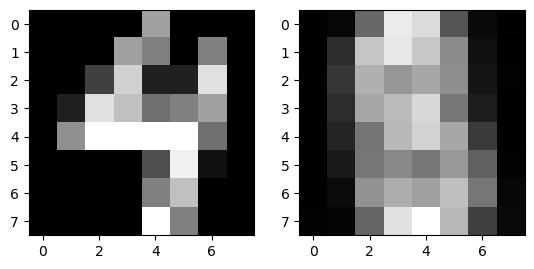

In [52]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [53]:
model.save("damodel")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("damodel")

INFO:tensorflow:Assets written to: damodel/assets


INFO:tensorflow:Assets written to: damodel/assets


1/1 [==============================] - 0s 30ms/step


2023-08-27 16:56:32.008190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


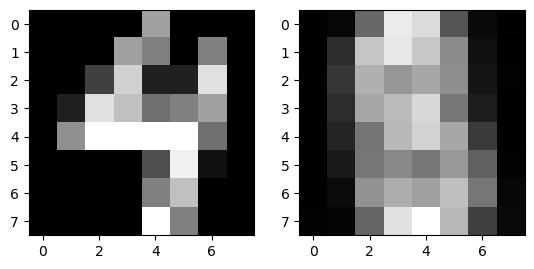

In [54]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [55]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [56]:
code = feature_ext(train)

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [58]:
print(code)

tf.Tensor(
[[24.980188  34.096714 ]
 [10.483791  22.59061  ]
 [22.407122  38.163647 ]
 ...
 [ 4.777671  15.24373  ]
 [ 7.4611034 19.042778 ]
 [19.125559  31.340788 ]], shape=(1697, 2), dtype=float32)


In [59]:
code = feature_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.29
0.99


With just 2 features??????

In [60]:
code[1,:],test_y[1]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 5.541035, 11.491758], dtype=float32)>,
 9)

# Physical vs Logical bottlenecks: Sparse coding

Let us try a logical bottleneck.

In [61]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

class SparseRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(tf.reduce_sum(tf.abs(inputs))*0.001)
        return inputs  # Pass-through layer.



input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(128,activation="relu")(x)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(512,activation="relu")(x)
encoder_output = SparseRegularizationLayer()(x)
x = keras.layers.Dense(256,activation="relu")(encoder_output)
x = keras.layers.Dense(128,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


In [62]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=200, validation_split=0.2)


Epoch 1/200


2023-08-27 16:56:54.017513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 2s 39ms/step - loss: 255.0228 - accuracy: 0.0634 - val_loss: 265.6195 - val_accuracy: 0.1618
Epoch 2/200
 4/22 [====>.........................] - ETA: 0s - loss: 286.1153 - accuracy: 0.1523

2023-08-27 16:56:55.266352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 15ms/step - loss: 295.9504 - accuracy: 0.0892 - val_loss: 304.0844 - val_accuracy: 0.1471
Epoch 3/200
22/22 [==============================] - 0s 15ms/step - loss: 327.8649 - accuracy: 0.0700 - val_loss: 323.9236 - val_accuracy: 0.0706
Epoch 4/200
22/22 [==============================] - 0s 13ms/step - loss: 347.8269 - accuracy: 0.0811 - val_loss: 348.2473 - val_accuracy: 0.0412
Epoch 5/200
22/22 [==============================] - 0s 13ms/step - loss: 372.0699 - accuracy: 0.0825 - val_loss: 379.7370 - val_accuracy: 0.1176
Epoch 6/200
22/22 [==============================] - 0s 13ms/step - loss: 406.6623 - accuracy: 0.0862 - val_loss: 409.1660 - val_accuracy: 0.0294
Epoch 7/200
22/22 [==============================] - 0s 13ms/step - loss: 433.5133 - accuracy: 0.0700 - val_loss: 418.7516 - val_accuracy: 0.1618
Epoch 8/200
22/22 [==============================] - 0s 13ms/step - loss: 445.1891 - accuracy: 0.0722 - val_loss: 431.8276 - val_accurac

Epoch 58/200
22/22 [==============================] - 0s 12ms/step - loss: 601.2278 - accuracy: 0.1172 - val_loss: 580.7598 - val_accuracy: 0.1471
Epoch 59/200
22/22 [==============================] - 0s 12ms/step - loss: 604.9184 - accuracy: 0.0973 - val_loss: 603.0198 - val_accuracy: 0.0853
Epoch 60/200
22/22 [==============================] - 0s 12ms/step - loss: 620.2206 - accuracy: 0.1061 - val_loss: 602.5209 - val_accuracy: 0.1147
Epoch 61/200
22/22 [==============================] - 0s 12ms/step - loss: 623.6779 - accuracy: 0.1010 - val_loss: 599.8487 - val_accuracy: 0.0676
Epoch 62/200
22/22 [==============================] - 0s 12ms/step - loss: 622.5646 - accuracy: 0.1032 - val_loss: 601.9891 - val_accuracy: 0.1059
Epoch 63/200
22/22 [==============================] - 0s 12ms/step - loss: 623.8415 - accuracy: 0.1054 - val_loss: 601.4643 - val_accuracy: 0.1206
Epoch 64/200
22/22 [==============================] - 0s 12ms/step - loss: 622.7489 - accuracy: 0.1076 - val_loss: 603

22/22 [==============================] - 0s 12ms/step - loss: 699.4256 - accuracy: 0.1113 - val_loss: 677.7360 - val_accuracy: 0.0794
Epoch 169/200
22/22 [==============================] - 0s 12ms/step - loss: 700.0547 - accuracy: 0.1076 - val_loss: 672.8693 - val_accuracy: 0.1118
Epoch 170/200
22/22 [==============================] - 0s 12ms/step - loss: 699.9780 - accuracy: 0.1120 - val_loss: 673.9619 - val_accuracy: 0.0735
Epoch 171/200
22/22 [==============================] - 0s 12ms/step - loss: 699.9626 - accuracy: 0.1194 - val_loss: 674.6818 - val_accuracy: 0.1824
Epoch 172/200
22/22 [==============================] - 0s 12ms/step - loss: 699.8973 - accuracy: 0.1186 - val_loss: 672.5438 - val_accuracy: 0.2088
Epoch 173/200
22/22 [==============================] - 0s 12ms/step - loss: 699.6165 - accuracy: 0.1157 - val_loss: 675.7692 - val_accuracy: 0.1059
Epoch 174/200
22/22 [==============================] - 0s 12ms/step - loss: 700.2521 - accuracy: 0.1150 - val_loss: 670.7895 -

In [63]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 337.9785 - accuracy: 0.1200 - 82ms/epoch - 21ms/step


1/1 [==============================] - 0s 79ms/step


2023-08-27 16:57:49.711827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


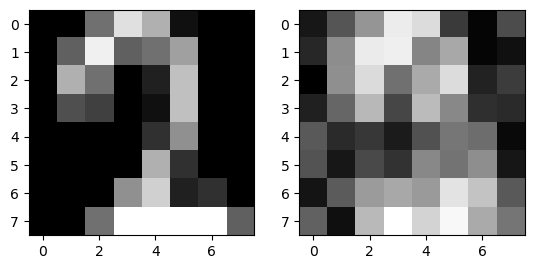

In [64]:
k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [65]:
sparse_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [66]:
code = sparse_ext(train)

In [67]:
code = code.numpy()

In [68]:
code[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.1893094 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.2055473 , 1.8937107 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.365658  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.64457995, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [69]:
non_zero=[]
for i in range(code.shape[0]):
    non_zero.append(len(np.where(code[i]>1e-6)[0]))

(array([  8.,  12.,  16.,  27.,  45.,  57.,  89., 109., 112., 109., 101.,
        118., 123., 108., 108.,  86.,  88.,  77.,  69.,  54.,  49.,  33.,
         22.,  25.,  22.,   7.,  10.,   6.,   5.,   2.]),
 array([42.        , 43.03333333, 44.06666667, 45.1       , 46.13333333,
        47.16666667, 48.2       , 49.23333333, 50.26666667, 51.3       ,
        52.33333333, 53.36666667, 54.4       , 55.43333333, 56.46666667,
        57.5       , 58.53333333, 59.56666667, 60.6       , 61.63333333,
        62.66666667, 63.7       , 64.73333333, 65.76666667, 66.8       ,
        67.83333333, 68.86666667, 69.9       , 70.93333333, 71.96666667,
        73.        ]),
 <BarContainer object of 30 artists>)

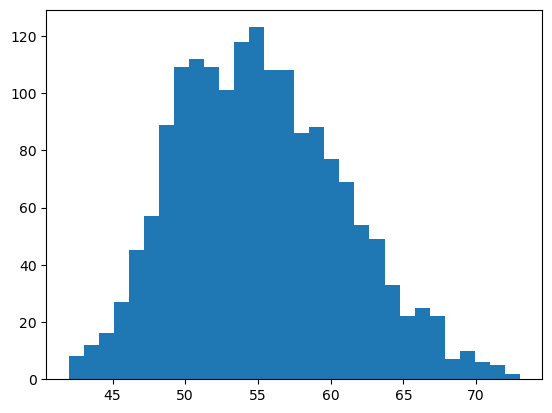

In [70]:
# Histogram of coded values
plt.hist(non_zero,bins = 30)

Let us check also the prediction capabilities from the intermediate representation.

In [71]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [72]:
code = sparse_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.92
0.99


# Generating with the decoder. From compressed to restored

Now let us get the decoder. Let us get the saved model first.

In [73]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

#Instanciate the layers that are going to be reused in two data flows, 
#training of the autoencoder and decoding from intermediate layer

dec1 = keras.layers.Dense(16,activation="relu")
dec2 = keras.layers.Dense(32,activation="relu")
dec3 = keras.layers.Dense(64)

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = dec1(encoder_output)
x = dec2(x)
decoder_output = dec3(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")



intermediate_input = keras.Input(shape=dec1.get_input_shape_at(0)) # get shape at node 0
x = dec1(intermediate_input)
x = dec2(x)
decoder_output = dec3(x)
decoder = keras.Model(inputs=intermediate_input, outputs=decoder_output, name="a_decoder")



#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
history = model.fit(train, train, batch_size=64, epochs=400, validation_split=0.2)


Epoch 1/400


2023-08-27 16:59:34.511128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 30ms/step - loss: 17.7528 - accuracy: 0.0678 - val_loss: 17.1668 - val_accuracy: 0.2029
Epoch 2/400
 6/22 [=======>......................] - ETA: 0s - loss: 16.8857 - accuracy: 0.1536

2023-08-27 16:59:35.441592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 15ms/step - loss: 16.6006 - accuracy: 0.0965 - val_loss: 17.1048 - val_accuracy: 0.0176
Epoch 3/400
22/22 [==============================] - 0s 13ms/step - loss: 16.6272 - accuracy: 0.0604 - val_loss: 17.0356 - val_accuracy: 0.0147
Epoch 4/400
22/22 [==============================] - 0s 12ms/step - loss: 16.6246 - accuracy: 0.0722 - val_loss: 17.2205 - val_accuracy: 0.1176
Epoch 5/400
22/22 [==============================] - 0s 12ms/step - loss: 16.5843 - accuracy: 0.0590 - val_loss: 16.6122 - val_accuracy: 0.1029
Epoch 6/400
22/22 [==============================] - 0s 12ms/step - loss: 16.5539 - accuracy: 0.0678 - val_loss: 16.8982 - val_accuracy: 0.2176
Epoch 7/400
22/22 [==============================] - 0s 11ms/step - loss: 16.6116 - accuracy: 0.0752 - val_loss: 16.6828 - val_accuracy: 0.2118
Epoch 8/400
22/22 [==============================] - 0s 11ms/step - loss: 16.5762 - accuracy: 0.0722 - val_loss: 16.6620 - val_accuracy: 0.1176
Epoc

22/22 [==============================] - 0s 11ms/step - loss: 17.1328 - accuracy: 0.0523 - val_loss: 17.5021 - val_accuracy: 0.0794
Epoch 115/400
22/22 [==============================] - 0s 11ms/step - loss: 17.1070 - accuracy: 0.0435 - val_loss: 17.2318 - val_accuracy: 0.0294
Epoch 116/400
22/22 [==============================] - 0s 11ms/step - loss: 17.1434 - accuracy: 0.0626 - val_loss: 17.7236 - val_accuracy: 0.0176
Epoch 117/400
22/22 [==============================] - 0s 11ms/step - loss: 17.1358 - accuracy: 0.0243 - val_loss: 17.7387 - val_accuracy: 0.0235
Epoch 118/400
22/22 [==============================] - 0s 11ms/step - loss: 17.1057 - accuracy: 0.0310 - val_loss: 17.2142 - val_accuracy: 0.0176
Epoch 119/400
22/22 [==============================] - 0s 11ms/step - loss: 17.1090 - accuracy: 0.0442 - val_loss: 17.4863 - val_accuracy: 0.0706
Epoch 120/400
22/22 [==============================] - 0s 11ms/step - loss: 17.0727 - accuracy: 0.0413 - val_loss: 17.6653 - val_accuracy:

22/22 [==============================] - 0s 11ms/step - loss: 17.7280 - accuracy: 0.0634 - val_loss: 19.8028 - val_accuracy: 0.0206
Epoch 227/400
22/22 [==============================] - 0s 11ms/step - loss: 17.6770 - accuracy: 0.0626 - val_loss: 20.4545 - val_accuracy: 0.0206
Epoch 228/400
22/22 [==============================] - 0s 11ms/step - loss: 17.8006 - accuracy: 0.0479 - val_loss: 18.7047 - val_accuracy: 0.0794
Epoch 229/400
22/22 [==============================] - 0s 11ms/step - loss: 17.6365 - accuracy: 0.0693 - val_loss: 18.0769 - val_accuracy: 0.0353
Epoch 230/400
22/22 [==============================] - 0s 11ms/step - loss: 17.6454 - accuracy: 0.0508 - val_loss: 18.0875 - val_accuracy: 0.0912
Epoch 231/400
22/22 [==============================] - 0s 11ms/step - loss: 17.7703 - accuracy: 0.0597 - val_loss: 19.1041 - val_accuracy: 0.0235
Epoch 232/400
22/22 [==============================] - 0s 11ms/step - loss: 17.7978 - accuracy: 0.0648 - val_loss: 19.7638 - val_accuracy:

22/22 [==============================] - 0s 11ms/step - loss: 20.0497 - accuracy: 0.0789 - val_loss: 22.1232 - val_accuracy: 0.1382
Epoch 339/400
22/22 [==============================] - 0s 11ms/step - loss: 19.8054 - accuracy: 0.0567 - val_loss: 24.7572 - val_accuracy: 0.0147
Epoch 340/400
22/22 [==============================] - 0s 11ms/step - loss: 20.2218 - accuracy: 0.0803 - val_loss: 20.5265 - val_accuracy: 0.0676
Epoch 341/400
22/22 [==============================] - 0s 11ms/step - loss: 19.8260 - accuracy: 0.0582 - val_loss: 24.8778 - val_accuracy: 0.0294
Epoch 342/400
22/22 [==============================] - 0s 11ms/step - loss: 19.9919 - accuracy: 0.0715 - val_loss: 20.7947 - val_accuracy: 0.0265
Epoch 343/400
22/22 [==============================] - 0s 11ms/step - loss: 20.1900 - accuracy: 0.0501 - val_loss: 20.1626 - val_accuracy: 0.0176
Epoch 344/400
22/22 [==============================] - 0s 11ms/step - loss: 19.9923 - accuracy: 0.0597 - val_loss: 20.6235 - val_accuracy:

In [ ]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
intermediate_code=feature_ext(train)

In [ ]:
code_decoded=decoder(intermediate_code)

In [ ]:
intermediate_code[0,:],code_decoded[0,:]

Let us query a random value and see what we get...

In [ ]:
reconstruction = decoder(tf.constant([[-1.,3.]]))

In [ ]:
reconstruction=reconstruction.numpy()

In [ ]:
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Surfing the embedding manifold 

In [ ]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
representation=feature_ext(train)

In [ ]:
from scipy.spatial import distance 
N=10
vx = np.linspace(np.min(representation[:,0]),np.max(representation[:,0]),N)
vy = np.linspace(np.min(representation[:,1]),np.max(representation[:,1]),N)
print(vx,vy)

def is_visited(x,l):
    for item in l:
        if np.abs(x-item)<1e-10:
            return True
    return False

visited=[]
idx_mat=np.zeros((N,N))       

for i in range(N):
    for j in range(N):
        d = distance.cdist(np.array([vx[i],vy[j]])[np.newaxis,:], representation)
        idx_sort = np.argsort(d)[0]
        idx_not_visited=[tmp for tmp in idx_sort if not(is_visited(tmp,visited))]
        if len(idx_not_visited)>0:
            idx_mat[i,j] = idx_not_visited[0]
            visited.append(idx_not_visited[0])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        axarr[i,j].imshow(train[int(idx_mat[i,j]),:].reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        reconstruction = decoder(tf.constant(np.array([[vx[i],vy[j]]])))
        axarr[i,j].imshow(reconstruction.numpy().reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

# Some notes on Variational Autoencoders

Althought autoencoders already serve the trick for generating samples. It turns out that space from which we are generating seems to be composed of bubbles of information with bad interpolation properties among bubbles. In order to solve that issue and smooth the manifold Variational Autoencoders (VAE) are proposed.

<img src = "vae2_proc.png">

This probabilistic behavior requires the use of a different loss, Kullbakc-Leibler divergence.

In practice the latent space is going to be modeled as a Gaussian distribution, and thus two vectors are returned.

<img src = "vae2.png">

But... what is the distribution we are comparing with in the loss? We will use standard normal distribution, resulting in the following loss:


$$L (x,\hat{x}) = \|x-\hat{x}\| + KL(\mathcal{N}(\mu(x),\sigma(x)),\mathcal{N}(0,1))$$


Where this comes from?

We are using Variational Inference for learning. This is we are approximating the desired distribution $p(z|x)$ by a controlled set of base functions $q(z)$. Usually, we use mean field approximation in which we assume that all variables in $z$ are independent and Gaussian. This is $q_x(z) = \prod q_x(z^{(i)}) = \prod \mathcal{N}(\mu^{(i)}(x),\sigma^{(i)}(x))$.

Our goal is

$$\underset{\mu,\sigma}{\text{minimize}}\quad KL(q_x(z),p(z|x))$$

where 

$$KL(q(x)\|p(x)) = \mathbb{E}_{q(x)}[\log\frac{q(x)}{p(x)}] = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p(x)}dx$$,

thus 

$$KL(q_x(z),p(z|x)) = \mathbb{E}_{z\sim q(x)}[\log q(z) - \log p(z|x)] $$

$$= \mathbb{E}_{z\sim q(x)}[\log q(z)] - \mathbb{E}_{z\sim q(x)}[\log p(z|x)]$$

$$= \mathbb{E}_{z\sim q(z)}[\log q(x)] - \mathbb{E}_{z\sim q(x)}[\log p(x|z) + \log p(z) - \log p(x)]$$

$$= - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z) + \log p(x)]$$

Observe that $p(x)$ does not depend on $z$ so this term is irrelevant in terms of the minimization. Thus

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z)] = $$

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +KL(q(z)\|p(z))$$


considering $p(x|z)$ a Gaussian distribution, then 

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[-\frac{(x-f(z))^2}{2c}] +KL(q(z)\|p(z))$$

that shows the dual loss we brought up before. 

# Generative Adversarial Networks

This is a clever trick for guiding a network into mimicking a sampled data distribution. In a nutshell it consists of a two part process:

- **Part 1: The generator** A network plays the role of a generator. We input data coming from one well-known distribution such as a Normal distribution and the output is expected to be the type of data we desire, e.g. cat images, words, etc. Just as we saw with the decoder of the Auto-encoder.

- **Part 2: The discriminator** In order for the generator to be able to achieve its goal here comes the clever trick. A discriminator is trained with data coming from the true source we want to mimick and with the data coming from the generator. These are mixed. And the role of the discriminator is to tell apart real from fake data. 

In [4]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [5]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [6]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

noise = keras.Input(shape=(64,), name="random")

x = keras.layers.Dense(128,activation="relu")(noise)
x = keras.layers.Dense(64,activation="relu")(x)
gen_output = keras.layers.Dense(64)(x) # The same as the decoder
generator = keras.Model(inputs=noise, outputs=gen_output, name="generator")


In [7]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
GEN = tf.keras.Sequential()
GEN.add(generator)
GEN.compile(loss='least_squares', optimizer=optimizer,metrics=['rmse'])


ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.RMSprop.

In [46]:

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(64,activation="relu")(x)
dis_output = keras.layers.Dense(1)(x)

discriminator = keras.Model(inputs=input_img, outputs=dis_output, name="discriminator")


In [47]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
DM = tf.keras.Sequential()
DM.add(discriminator)
DM.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [48]:
generator.trainable=False
GAN = tf.keras.Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

tf.Tensor(
[[ 0.32766518  0.08126039  0.46472335 -0.34138185 -0.6254648   0.24156275
  -0.03363755 -0.3197345  -1.0848318   1.1447692  -0.07221648 -1.0799575
   0.11785471 -0.19735798 -0.273885    0.3942282   0.4514687  -0.5651351
  -0.10245561 -0.44546884 -0.34812877  0.18784657  0.444853    0.01450828
  -0.2062136   0.94788516  0.89586484 -0.11035658 -0.37641215  1.16998
   0.06978055  0.48649192 -0.23497403  0.689156    0.4996563   0.5992128
  -0.21572706 -0.88944054  0.01865098 -0.11616421  0.18359038 -0.59996474
  -0.53965175 -0.6656134   0.12178491  0.4837354   0.35828245  0.40527606
  -0.36695528 -0.1921123   0.3042798   1.1417315  -1.644366   -0.39032632
   0.17615782 -0.0279161  -1.109177   -0.00636674  0.79178154  0.11264324
  -0.2381676   0.02443206  0.39164257  0.703593  ]], shape=(1, 64), dtype=float32)


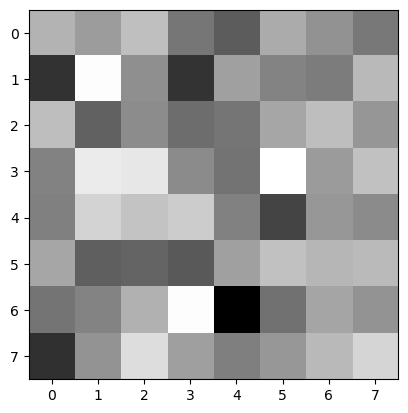

In [49]:
noise = tf.random.normal([1, 64])
generated_image = generator(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')

In [50]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [51]:
generate_latent_points(64,2)

array([[ 9.59117902e-01, -2.10106011e-02, -2.80590976e+00,
        -8.44430725e-01,  1.58101506e-01,  9.93237025e-01,
         8.90058432e-01, -3.95897502e-01,  5.90260136e-01,
         1.24697881e+00, -6.69019974e-01,  4.43353645e-01,
        -1.26070719e-01,  3.45992325e-01,  9.21270523e-01,
        -2.57737771e-01,  1.26860450e+00, -7.99649079e-01,
         8.96414662e-01, -1.20788588e+00,  1.88039030e+00,
        -5.57115819e-01,  1.63609698e-01,  3.01608743e+00,
        -1.90481912e-01, -2.99079683e-02, -4.59474943e-01,
        -9.57080695e-01,  6.87018256e-01, -1.17568940e+00,
         1.16506769e+00,  4.26745999e-01, -1.03033086e+00,
        -3.44382590e-01,  1.60504991e+00, -3.80346829e-02,
        -4.22655063e-01, -1.50864880e-01,  1.00763399e-01,
         1.96134785e-01, -1.67744251e+00, -6.28334512e-01,
         6.93910716e-01, -1.44156214e+00, -6.39655362e-01,
         1.30029985e+00, -7.50479023e-01, -4.38939225e-01,
         7.53298320e-01,  2.11643531e+00, -2.04843740e-0

In [52]:
def generate_fake_samples(gen, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = gen.predict(x_input)
    # create 'fake' class labels (0)
    y = np.zeros((n_samples, 1))
    return X, y


In [53]:
generate_fake_samples(GEN,64,1)

1/1 [==============================] - 0s 26ms/step


2022-08-31 18:31:23.609184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([[ 7.0212728e-01, -7.6322293e-01,  7.2094744e-01,  2.3356859e-01,
         -4.8058009e-01,  3.6065516e-01,  4.6811253e-01, -5.4094005e-01,
          1.9956928e-01,  3.9107496e-01, -2.3751068e-01, -1.3502887e-01,
          4.4907600e-01,  4.0516692e-01,  2.7513093e-01,  7.6904196e-01,
         -3.6450550e-01, -3.2211445e-02, -9.3779251e-02,  3.1282479e-01,
          3.4748018e-04,  5.6560487e-02,  3.4231728e-01, -2.9879841e-01,
          1.4292631e-01,  7.2965038e-01,  3.3438712e-01, -1.1179254e+00,
          8.9985296e-02,  1.0188481e+00,  2.5400797e-01,  7.3369908e-01,
         -1.2709498e-02,  9.2520612e-01, -2.5019521e-01,  2.5003582e-01,
         -3.3173096e-01, -1.7388073e-01, -5.8151692e-02, -3.9486259e-02,
         -1.4376244e-01, -1.4678189e-01, -3.6973375e-01, -3.3762175e-01,
          3.2029188e-01,  3.3656052e-01,  4.6484587e-01,  6.8675661e-01,
         -5.1916081e-01,  1.0425362e-01,  6.7870402e-01,  1.1150341e+00,
         -5.3411162e-01, -2.9214764e-01,  6.3208413

In [54]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [55]:
generate_real_samples(train,3)

(array([[ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8.,
         11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
         15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0.,
          0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
         14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
        [ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11.,
         11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3.,
         12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
          0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4.,
         15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.],
        [ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,
         13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,
          8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,
          0.,  0.,  1., 16., 16., 16., 10.,  0

In [56]:
def trainGAN(gen, dm, gan, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    print(bat_per_epo)
    print(half_batch)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(gen, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = dm.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples - we want the error to improve the generator thus the change
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss[0]))

In [57]:
trainGAN(GEN,DM,GAN,train,64,n_epochs=10000)

6
128
4/4 [==============================] - 0s 2ms/step


2022-08-31 18:31:23.864549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


>1, 1/6, d=0.698, g=9.894
4/4 [==============================] - 0s 2ms/step


2022-08-31 18:31:24.236150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


>1, 2/6, d=2.256, g=1.334
4/4 [==============================] - 0s 2ms/step
>1, 3/6, d=0.557, g=0.846
4/4 [==============================] - 0s 2ms/step
>1, 4/6, d=0.625, g=0.726
4/4 [==============================] - 0s 2ms/step
>1, 5/6, d=0.845, g=0.689
4/4 [==============================] - 0s 2ms/step
>1, 6/6, d=1.233, g=0.769
4/4 [==============================] - 0s 2ms/step
>2, 1/6, d=1.015, g=0.730
4/4 [==============================] - 0s 2ms/step
>2, 2/6, d=0.770, g=0.779
4/4 [==============================] - 0s 2ms/step
>2, 3/6, d=0.824, g=0.727
4/4 [==============================] - 0s 2ms/step
>2, 4/6, d=0.644, g=0.853
4/4 [==============================] - 0s 2ms/step
>2, 5/6, d=0.508, g=0.956
4/4 [==============================] - 0s 2ms/step
>2, 6/6, d=0.438, g=0.820
4/4 [==============================] - 0s 2ms/step
>3, 1/6, d=0.869, g=1.210
4/4 [==============================] - 0s 2ms/step
>3, 2/6, d=0.332, g=0.834
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step
>36, 3/6, d=0.450, g=0.620
4/4 [==============================] - 0s 2ms/step
>36, 4/6, d=0.450, g=0.599
4/4 [==============================] - 0s 2ms/step
>36, 5/6, d=0.489, g=0.603
4/4 [==============================] - 0s 2ms/step
>36, 6/6, d=0.478, g=0.596
4/4 [==============================] - 0s 2ms/step
>37, 1/6, d=0.467, g=0.564
4/4 [==============================] - 0s 2ms/step
>37, 2/6, d=0.517, g=0.552
4/4 [==============================] - 0s 2ms/step
>37, 3/6, d=0.526, g=0.585
4/4 [==============================] - 0s 2ms/step
>37, 4/6, d=0.487, g=0.584
4/4 [==============================] - 0s 2ms/step
>37, 5/6, d=0.516, g=0.586
4/4 [==============================] - 0s 2ms/step
>37, 6/6, d=0.523, g=0.566
4/4 [==============================] - 0s 2ms/step
>38, 1/6, d=0.582, g=0.569
4/4 [==============================] - 0s 2ms/step
>38, 2/6, d=0.503, g=0.584
4/4 [==============================] - 0s 2ms/step
>38, 3/6, d=0

4/4 [==============================] - 0s 2ms/step
>71, 3/6, d=0.542, g=0.529
4/4 [==============================] - 0s 2ms/step
>71, 4/6, d=0.516, g=0.544
4/4 [==============================] - 0s 2ms/step
>71, 5/6, d=0.557, g=0.545
4/4 [==============================] - 0s 2ms/step
>71, 6/6, d=0.516, g=0.541
4/4 [==============================] - 0s 2ms/step
>72, 1/6, d=0.517, g=0.543
4/4 [==============================] - 0s 2ms/step
>72, 2/6, d=0.558, g=0.534
4/4 [==============================] - 0s 2ms/step
>72, 3/6, d=0.536, g=0.535
4/4 [==============================] - 0s 2ms/step
>72, 4/6, d=0.529, g=0.528
4/4 [==============================] - 0s 2ms/step
>72, 5/6, d=0.513, g=0.522
4/4 [==============================] - 0s 2ms/step
>72, 6/6, d=0.535, g=0.538
4/4 [==============================] - 0s 2ms/step
>73, 1/6, d=0.541, g=0.535
4/4 [==============================] - 0s 2ms/step
>73, 2/6, d=0.537, g=0.543
4/4 [==============================] - 0s 2ms/step
>73, 3/6, d=0

4/4 [==============================] - 0s 2ms/step
>106, 2/6, d=0.519, g=0.530
4/4 [==============================] - 0s 2ms/step
>106, 3/6, d=0.537, g=0.542
4/4 [==============================] - 0s 2ms/step
>106, 4/6, d=0.513, g=0.545
4/4 [==============================] - 0s 2ms/step
>106, 5/6, d=0.503, g=0.549
4/4 [==============================] - 0s 2ms/step
>106, 6/6, d=0.483, g=0.549
4/4 [==============================] - 0s 2ms/step
>107, 1/6, d=0.529, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 2/6, d=0.512, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 3/6, d=0.505, g=0.539
4/4 [==============================] - 0s 2ms/step
>107, 4/6, d=0.501, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 5/6, d=0.508, g=0.518
4/4 [==============================] - 0s 2ms/step
>107, 6/6, d=0.504, g=0.539
4/4 [==============================] - 0s 2ms/step
>108, 1/6, d=0.501, g=0.516
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>123, 4/6, d=0.531, g=0.506
4/4 [==============================] - 0s 2ms/step
>123, 5/6, d=0.533, g=0.500
4/4 [==============================] - 0s 2ms/step
>123, 6/6, d=0.526, g=0.494
4/4 [==============================] - 0s 2ms/step
>124, 1/6, d=0.507, g=0.503
4/4 [==============================] - 0s 2ms/step
>124, 2/6, d=0.530, g=0.500
4/4 [==============================] - 0s 2ms/step
>124, 3/6, d=0.522, g=0.502
4/4 [==============================] - 0s 2ms/step
>124, 4/6, d=0.552, g=0.497
4/4 [==============================] - 0s 2ms/step
>124, 5/6, d=0.520, g=0.512
4/4 [==============================] - 0s 2ms/step
>124, 6/6, d=0.548, g=0.523
4/4 [==============================] - 0s 2ms/step
>125, 1/6, d=0.533, g=0.518
4/4 [==============================] - 0s 2ms/step
>125, 2/6, d=0.529, g=0.506
4/4 [==============================] - 0s 2ms/step
>125, 3/6, d=0.501, g=0.511
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>140, 6/6, d=0.531, g=0.509
4/4 [==============================] - 0s 2ms/step
>141, 1/6, d=0.538, g=0.502
4/4 [==============================] - 0s 2ms/step
>141, 2/6, d=0.534, g=0.497
4/4 [==============================] - 0s 2ms/step
>141, 3/6, d=0.507, g=0.484
4/4 [==============================] - 0s 2ms/step
>141, 4/6, d=0.534, g=0.500
4/4 [==============================] - 0s 2ms/step
>141, 5/6, d=0.513, g=0.508
4/4 [==============================] - 0s 2ms/step
>141, 6/6, d=0.585, g=0.488
4/4 [==============================] - 0s 2ms/step
>142, 1/6, d=0.562, g=0.493
4/4 [==============================] - 0s 2ms/step
>142, 2/6, d=0.532, g=0.505
4/4 [==============================] - 0s 2ms/step
>142, 3/6, d=0.524, g=0.502
4/4 [==============================] - 0s 2ms/step
>142, 4/6, d=0.547, g=0.504
4/4 [==============================] - 0s 2ms/step
>142, 5/6, d=0.532, g=0.501
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>158, 2/6, d=0.508, g=0.508
4/4 [==============================] - 0s 2ms/step
>158, 3/6, d=0.523, g=0.516
4/4 [==============================] - 0s 2ms/step
>158, 4/6, d=0.512, g=0.521
4/4 [==============================] - 0s 2ms/step
>158, 5/6, d=0.535, g=0.511
4/4 [==============================] - 0s 2ms/step
>158, 6/6, d=0.537, g=0.510
4/4 [==============================] - 0s 2ms/step
>159, 1/6, d=0.510, g=0.521
4/4 [==============================] - 0s 2ms/step
>159, 2/6, d=0.512, g=0.496
4/4 [==============================] - 0s 2ms/step
>159, 3/6, d=0.515, g=0.489
4/4 [==============================] - 0s 2ms/step
>159, 4/6, d=0.531, g=0.497
4/4 [==============================] - 0s 2ms/step
>159, 5/6, d=0.594, g=0.505
4/4 [==============================] - 0s 2ms/step
>159, 6/6, d=0.512, g=0.492
4/4 [==============================] - 0s 2ms/step
>160, 1/6, d=0.528, g=0.496
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>175, 4/6, d=0.519, g=0.499
4/4 [==============================] - 0s 2ms/step
>175, 5/6, d=0.508, g=0.511
4/4 [==============================] - 0s 2ms/step
>175, 6/6, d=0.529, g=0.486
4/4 [==============================] - 0s 2ms/step
>176, 1/6, d=0.541, g=0.485
4/4 [==============================] - 0s 2ms/step
>176, 2/6, d=0.537, g=0.492
4/4 [==============================] - 0s 2ms/step
>176, 3/6, d=0.519, g=0.485
4/4 [==============================] - 0s 2ms/step
>176, 4/6, d=0.514, g=0.481
4/4 [==============================] - 0s 2ms/step
>176, 5/6, d=0.528, g=0.482
4/4 [==============================] - 0s 2ms/step
>176, 6/6, d=0.528, g=0.479
4/4 [==============================] - 0s 2ms/step
>177, 1/6, d=0.522, g=0.494
4/4 [==============================] - 0s 2ms/step
>177, 2/6, d=0.535, g=0.496
4/4 [==============================] - 0s 2ms/step
>177, 3/6, d=0.548, g=0.496
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>192, 6/6, d=0.529, g=0.476
4/4 [==============================] - 0s 2ms/step
>193, 1/6, d=0.549, g=0.495
4/4 [==============================] - 0s 2ms/step
>193, 2/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>193, 3/6, d=0.544, g=0.500
4/4 [==============================] - 0s 2ms/step
>193, 4/6, d=0.519, g=0.498
4/4 [==============================] - 0s 2ms/step
>193, 5/6, d=0.523, g=0.478
4/4 [==============================] - 0s 2ms/step
>193, 6/6, d=0.542, g=0.473
4/4 [==============================] - 0s 2ms/step
>194, 1/6, d=0.558, g=0.491
4/4 [==============================] - 0s 2ms/step
>194, 2/6, d=0.529, g=0.503
4/4 [==============================] - 0s 2ms/step
>194, 3/6, d=0.537, g=0.498
4/4 [==============================] - 0s 2ms/step
>194, 4/6, d=0.523, g=0.497
4/4 [==============================] - 0s 2ms/step
>194, 5/6, d=0.516, g=0.491
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>210, 2/6, d=0.513, g=0.488
4/4 [==============================] - 0s 2ms/step
>210, 3/6, d=0.521, g=0.497
4/4 [==============================] - 0s 2ms/step
>210, 4/6, d=0.541, g=0.500
4/4 [==============================] - 0s 2ms/step
>210, 5/6, d=0.544, g=0.497
4/4 [==============================] - 0s 2ms/step
>210, 6/6, d=0.519, g=0.487
4/4 [==============================] - 0s 2ms/step
>211, 1/6, d=0.526, g=0.488
4/4 [==============================] - 0s 2ms/step
>211, 2/6, d=0.547, g=0.487
4/4 [==============================] - 0s 2ms/step
>211, 3/6, d=0.508, g=0.470
4/4 [==============================] - 0s 2ms/step
>211, 4/6, d=0.535, g=0.475
4/4 [==============================] - 0s 2ms/step
>211, 5/6, d=0.538, g=0.480
4/4 [==============================] - 0s 2ms/step
>211, 6/6, d=0.531, g=0.479
4/4 [==============================] - 0s 2ms/step
>212, 1/6, d=0.548, g=0.493
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>227, 4/6, d=0.520, g=0.494
4/4 [==============================] - 0s 2ms/step
>227, 5/6, d=0.522, g=0.478
4/4 [==============================] - 0s 2ms/step
>227, 6/6, d=0.535, g=0.483
4/4 [==============================] - 0s 2ms/step
>228, 1/6, d=0.532, g=0.484
4/4 [==============================] - 0s 2ms/step
>228, 2/6, d=0.519, g=0.478
4/4 [==============================] - 0s 2ms/step
>228, 3/6, d=0.543, g=0.478
4/4 [==============================] - 0s 2ms/step
>228, 4/6, d=0.527, g=0.476
4/4 [==============================] - 0s 2ms/step
>228, 5/6, d=0.534, g=0.484
4/4 [==============================] - 0s 2ms/step
>228, 6/6, d=0.537, g=0.490
4/4 [==============================] - 0s 2ms/step
>229, 1/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>229, 2/6, d=0.556, g=0.488
4/4 [==============================] - 0s 2ms/step
>229, 3/6, d=0.533, g=0.493
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>244, 6/6, d=0.571, g=0.472
4/4 [==============================] - 0s 2ms/step
>245, 1/6, d=0.543, g=0.478
4/4 [==============================] - 0s 2ms/step
>245, 2/6, d=0.516, g=0.477
4/4 [==============================] - 0s 2ms/step
>245, 3/6, d=0.567, g=0.491
4/4 [==============================] - 0s 2ms/step
>245, 4/6, d=0.537, g=0.482
4/4 [==============================] - 0s 2ms/step
>245, 5/6, d=0.544, g=0.474
4/4 [==============================] - 0s 2ms/step
>245, 6/6, d=0.528, g=0.478
4/4 [==============================] - 0s 2ms/step
>246, 1/6, d=0.514, g=0.469
4/4 [==============================] - 0s 2ms/step
>246, 2/6, d=0.544, g=0.478
4/4 [==============================] - 0s 2ms/step
>246, 3/6, d=0.549, g=0.471
4/4 [==============================] - 0s 2ms/step
>246, 4/6, d=0.528, g=0.476
4/4 [==============================] - 0s 2ms/step
>246, 5/6, d=0.542, g=0.464
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>262, 2/6, d=0.533, g=0.474
4/4 [==============================] - 0s 2ms/step
>262, 3/6, d=0.530, g=0.478
4/4 [==============================] - 0s 2ms/step
>262, 4/6, d=0.534, g=0.467
4/4 [==============================] - 0s 2ms/step
>262, 5/6, d=0.535, g=0.473
4/4 [==============================] - 0s 2ms/step
>262, 6/6, d=0.523, g=0.469
4/4 [==============================] - 0s 2ms/step
>263, 1/6, d=0.532, g=0.476
4/4 [==============================] - 0s 2ms/step
>263, 2/6, d=0.545, g=0.457
4/4 [==============================] - 0s 2ms/step
>263, 3/6, d=0.524, g=0.468
4/4 [==============================] - 0s 2ms/step
>263, 4/6, d=0.537, g=0.460
4/4 [==============================] - 0s 2ms/step
>263, 5/6, d=0.546, g=0.465
4/4 [==============================] - 0s 2ms/step
>263, 6/6, d=0.543, g=0.479
4/4 [==============================] - 0s 2ms/step
>264, 1/6, d=0.533, g=0.462
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>279, 4/6, d=0.554, g=0.472
4/4 [==============================] - 0s 2ms/step
>279, 5/6, d=0.536, g=0.476
4/4 [==============================] - 0s 2ms/step
>279, 6/6, d=0.546, g=0.480
4/4 [==============================] - 0s 2ms/step
>280, 1/6, d=0.531, g=0.480
4/4 [==============================] - 0s 2ms/step
>280, 2/6, d=0.516, g=0.471
4/4 [==============================] - 0s 2ms/step
>280, 3/6, d=0.526, g=0.472
4/4 [==============================] - 0s 2ms/step
>280, 4/6, d=0.521, g=0.472
4/4 [==============================] - 0s 2ms/step
>280, 5/6, d=0.507, g=0.461
4/4 [==============================] - 0s 2ms/step
>280, 6/6, d=0.543, g=0.464
4/4 [==============================] - 0s 2ms/step
>281, 1/6, d=0.527, g=0.468
4/4 [==============================] - 0s 2ms/step
>281, 2/6, d=0.535, g=0.461
4/4 [==============================] - 0s 2ms/step
>281, 3/6, d=0.549, g=0.468
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>296, 6/6, d=0.531, g=0.465
4/4 [==============================] - 0s 2ms/step
>297, 1/6, d=0.515, g=0.460
4/4 [==============================] - 0s 2ms/step
>297, 2/6, d=0.521, g=0.467
4/4 [==============================] - 0s 2ms/step
>297, 3/6, d=0.531, g=0.457
4/4 [==============================] - 0s 2ms/step
>297, 4/6, d=0.534, g=0.460
4/4 [==============================] - 0s 2ms/step
>297, 5/6, d=0.540, g=0.466
4/4 [==============================] - 0s 2ms/step
>297, 6/6, d=0.532, g=0.472
4/4 [==============================] - 0s 2ms/step
>298, 1/6, d=0.539, g=0.466
4/4 [==============================] - 0s 2ms/step
>298, 2/6, d=0.540, g=0.451
4/4 [==============================] - 0s 2ms/step
>298, 3/6, d=0.538, g=0.464
4/4 [==============================] - 0s 2ms/step
>298, 4/6, d=0.529, g=0.457
4/4 [==============================] - 0s 2ms/step
>298, 5/6, d=0.536, g=0.452
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>314, 2/6, d=0.535, g=0.468
4/4 [==============================] - 0s 2ms/step
>314, 3/6, d=0.524, g=0.466
4/4 [==============================] - 0s 2ms/step
>314, 4/6, d=0.574, g=0.464
4/4 [==============================] - 0s 2ms/step
>314, 5/6, d=0.534, g=0.461
4/4 [==============================] - 0s 2ms/step
>314, 6/6, d=0.537, g=0.462
4/4 [==============================] - 0s 2ms/step
>315, 1/6, d=0.535, g=0.463
4/4 [==============================] - 0s 2ms/step
>315, 2/6, d=0.538, g=0.481
4/4 [==============================] - 0s 2ms/step
>315, 3/6, d=0.532, g=0.459
4/4 [==============================] - 0s 2ms/step
>315, 4/6, d=0.534, g=0.463
4/4 [==============================] - 0s 2ms/step
>315, 5/6, d=0.572, g=0.467
4/4 [==============================] - 0s 2ms/step
>315, 6/6, d=0.533, g=0.468
4/4 [==============================] - 0s 2ms/step
>316, 1/6, d=0.533, g=0.475
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>331, 4/6, d=0.541, g=0.464
4/4 [==============================] - 0s 2ms/step
>331, 5/6, d=0.544, g=0.468
4/4 [==============================] - 0s 2ms/step
>331, 6/6, d=0.544, g=0.476
4/4 [==============================] - 0s 2ms/step
>332, 1/6, d=0.523, g=0.471
4/4 [==============================] - 0s 2ms/step
>332, 2/6, d=0.591, g=0.457
4/4 [==============================] - 0s 2ms/step
>332, 3/6, d=0.536, g=0.458
4/4 [==============================] - 0s 2ms/step
>332, 4/6, d=0.538, g=0.467
4/4 [==============================] - 0s 2ms/step
>332, 5/6, d=0.533, g=0.470
4/4 [==============================] - 0s 2ms/step
>332, 6/6, d=0.530, g=0.463
4/4 [==============================] - 0s 2ms/step
>333, 1/6, d=0.544, g=0.472
4/4 [==============================] - 0s 2ms/step
>333, 2/6, d=0.531, g=0.468
4/4 [==============================] - 0s 2ms/step
>333, 3/6, d=0.531, g=0.464
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>348, 6/6, d=0.602, g=0.453
4/4 [==============================] - 0s 2ms/step
>349, 1/6, d=0.598, g=0.472
4/4 [==============================] - 0s 2ms/step
>349, 2/6, d=0.537, g=0.454
4/4 [==============================] - 0s 2ms/step
>349, 3/6, d=0.524, g=0.451
4/4 [==============================] - 0s 2ms/step
>349, 4/6, d=0.519, g=0.464
4/4 [==============================] - 0s 2ms/step
>349, 5/6, d=0.537, g=0.447
4/4 [==============================] - 0s 2ms/step
>349, 6/6, d=0.536, g=0.446
4/4 [==============================] - 0s 2ms/step
>350, 1/6, d=0.537, g=0.448
4/4 [==============================] - 0s 2ms/step
>350, 2/6, d=0.557, g=0.463
4/4 [==============================] - 0s 2ms/step
>350, 3/6, d=0.526, g=0.450
4/4 [==============================] - 0s 2ms/step
>350, 4/6, d=0.539, g=0.454
4/4 [==============================] - 0s 2ms/step
>350, 5/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>366, 2/6, d=0.586, g=0.456
4/4 [==============================] - 0s 2ms/step
>366, 3/6, d=0.548, g=0.468
4/4 [==============================] - 0s 2ms/step
>366, 4/6, d=0.526, g=0.462
4/4 [==============================] - 0s 2ms/step
>366, 5/6, d=0.536, g=0.468
4/4 [==============================] - 0s 2ms/step
>366, 6/6, d=0.519, g=0.468
4/4 [==============================] - 0s 2ms/step
>367, 1/6, d=0.515, g=0.465
4/4 [==============================] - 0s 2ms/step
>367, 2/6, d=0.540, g=0.466
4/4 [==============================] - 0s 2ms/step
>367, 3/6, d=0.520, g=0.457
4/4 [==============================] - 0s 2ms/step
>367, 4/6, d=0.528, g=0.463
4/4 [==============================] - 0s 2ms/step
>367, 5/6, d=0.529, g=0.469
4/4 [==============================] - 0s 2ms/step
>367, 6/6, d=0.534, g=0.450
4/4 [==============================] - 0s 2ms/step
>368, 1/6, d=0.533, g=0.465
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>383, 4/6, d=0.526, g=0.456
4/4 [==============================] - 0s 2ms/step
>383, 5/6, d=0.518, g=0.460
4/4 [==============================] - 0s 2ms/step
>383, 6/6, d=0.529, g=0.463
4/4 [==============================] - 0s 2ms/step
>384, 1/6, d=0.536, g=0.460
4/4 [==============================] - 0s 2ms/step
>384, 2/6, d=0.532, g=0.460
4/4 [==============================] - 0s 2ms/step
>384, 3/6, d=0.549, g=0.454
4/4 [==============================] - 0s 2ms/step
>384, 4/6, d=0.550, g=0.469
4/4 [==============================] - 0s 2ms/step
>384, 5/6, d=0.536, g=0.461
4/4 [==============================] - 0s 2ms/step
>384, 6/6, d=0.591, g=0.461
4/4 [==============================] - 0s 2ms/step
>385, 1/6, d=0.530, g=0.452
4/4 [==============================] - 0s 2ms/step
>385, 2/6, d=0.533, g=0.451
4/4 [==============================] - 0s 2ms/step
>385, 3/6, d=0.530, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>400, 6/6, d=0.513, g=0.460
4/4 [==============================] - 0s 2ms/step
>401, 1/6, d=0.534, g=0.446
4/4 [==============================] - 0s 2ms/step
>401, 2/6, d=0.532, g=0.463
4/4 [==============================] - 0s 2ms/step
>401, 3/6, d=0.539, g=0.461
4/4 [==============================] - 0s 2ms/step
>401, 4/6, d=0.588, g=0.461
4/4 [==============================] - 0s 2ms/step
>401, 5/6, d=0.543, g=0.457
4/4 [==============================] - 0s 2ms/step
>401, 6/6, d=0.523, g=0.458
4/4 [==============================] - 0s 2ms/step
>402, 1/6, d=0.555, g=0.465
4/4 [==============================] - 0s 2ms/step
>402, 2/6, d=0.550, g=0.466
4/4 [==============================] - 0s 2ms/step
>402, 3/6, d=0.537, g=0.460
4/4 [==============================] - 0s 2ms/step
>402, 4/6, d=0.521, g=0.462
4/4 [==============================] - 0s 2ms/step
>402, 5/6, d=0.534, g=0.465
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>418, 2/6, d=0.533, g=0.456
4/4 [==============================] - 0s 2ms/step
>418, 3/6, d=0.538, g=0.456
4/4 [==============================] - 0s 2ms/step
>418, 4/6, d=0.533, g=0.455
4/4 [==============================] - 0s 2ms/step
>418, 5/6, d=0.528, g=0.442
4/4 [==============================] - 0s 2ms/step
>418, 6/6, d=0.527, g=0.462
4/4 [==============================] - 0s 2ms/step
>419, 1/6, d=0.531, g=0.450
4/4 [==============================] - 0s 2ms/step
>419, 2/6, d=0.542, g=0.451
4/4 [==============================] - 0s 2ms/step
>419, 3/6, d=0.518, g=0.454
4/4 [==============================] - 0s 2ms/step
>419, 4/6, d=0.541, g=0.444
4/4 [==============================] - 0s 2ms/step
>419, 5/6, d=0.525, g=0.446
4/4 [==============================] - 0s 2ms/step
>419, 6/6, d=0.542, g=0.453
4/4 [==============================] - 0s 2ms/step
>420, 1/6, d=0.532, g=0.451
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>435, 4/6, d=0.585, g=0.446
4/4 [==============================] - 0s 2ms/step
>435, 5/6, d=0.546, g=0.456
4/4 [==============================] - 0s 2ms/step
>435, 6/6, d=0.536, g=0.454
4/4 [==============================] - 0s 2ms/step
>436, 1/6, d=0.533, g=0.454
4/4 [==============================] - 0s 2ms/step
>436, 2/6, d=0.536, g=0.462
4/4 [==============================] - 0s 2ms/step
>436, 3/6, d=0.598, g=0.452
4/4 [==============================] - 0s 2ms/step
>436, 4/6, d=0.538, g=0.452
4/4 [==============================] - 0s 2ms/step
>436, 5/6, d=0.549, g=0.448
4/4 [==============================] - 0s 2ms/step
>436, 6/6, d=0.526, g=0.451
4/4 [==============================] - 0s 2ms/step
>437, 1/6, d=0.522, g=0.445
4/4 [==============================] - 0s 2ms/step
>437, 2/6, d=0.518, g=0.450
4/4 [==============================] - 0s 2ms/step
>437, 3/6, d=0.517, g=0.452
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>452, 6/6, d=0.543, g=0.456
4/4 [==============================] - 0s 2ms/step
>453, 1/6, d=0.591, g=0.450
4/4 [==============================] - 0s 2ms/step
>453, 2/6, d=0.543, g=0.449
4/4 [==============================] - 0s 2ms/step
>453, 3/6, d=0.527, g=0.437
4/4 [==============================] - 0s 2ms/step
>453, 4/6, d=0.532, g=0.440
4/4 [==============================] - 0s 2ms/step
>453, 5/6, d=0.540, g=0.445
4/4 [==============================] - 0s 2ms/step
>453, 6/6, d=0.594, g=0.441
4/4 [==============================] - 0s 2ms/step
>454, 1/6, d=0.550, g=0.446
4/4 [==============================] - 0s 2ms/step
>454, 2/6, d=0.542, g=0.455
4/4 [==============================] - 0s 2ms/step
>454, 3/6, d=0.541, g=0.457
4/4 [==============================] - 0s 2ms/step
>454, 4/6, d=0.530, g=0.456
4/4 [==============================] - 0s 2ms/step
>454, 5/6, d=0.548, g=0.454
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>470, 2/6, d=0.527, g=0.447
4/4 [==============================] - 0s 2ms/step
>470, 3/6, d=0.546, g=0.439
4/4 [==============================] - 0s 2ms/step
>470, 4/6, d=0.545, g=0.440
4/4 [==============================] - 0s 2ms/step
>470, 5/6, d=0.536, g=0.442
4/4 [==============================] - 0s 2ms/step
>470, 6/6, d=0.545, g=0.447
4/4 [==============================] - 0s 2ms/step
>471, 1/6, d=0.595, g=0.448
4/4 [==============================] - 0s 2ms/step
>471, 2/6, d=0.592, g=0.452
4/4 [==============================] - 0s 2ms/step
>471, 3/6, d=0.534, g=0.452
4/4 [==============================] - 0s 2ms/step
>471, 4/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>471, 5/6, d=0.527, g=0.435
4/4 [==============================] - 0s 2ms/step
>471, 6/6, d=0.552, g=0.446
4/4 [==============================] - 0s 2ms/step
>472, 1/6, d=0.585, g=0.439
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>487, 4/6, d=0.521, g=0.438
4/4 [==============================] - 0s 2ms/step
>487, 5/6, d=0.533, g=0.450
4/4 [==============================] - 0s 2ms/step
>487, 6/6, d=0.543, g=0.456
4/4 [==============================] - 0s 2ms/step
>488, 1/6, d=0.515, g=0.439
4/4 [==============================] - 0s 2ms/step
>488, 2/6, d=0.552, g=0.448
4/4 [==============================] - 0s 2ms/step
>488, 3/6, d=0.576, g=0.455
4/4 [==============================] - 0s 2ms/step
>488, 4/6, d=0.548, g=0.452
4/4 [==============================] - 0s 2ms/step
>488, 5/6, d=0.518, g=0.450
4/4 [==============================] - 0s 2ms/step
>488, 6/6, d=0.525, g=0.442
4/4 [==============================] - 0s 2ms/step
>489, 1/6, d=0.532, g=0.450
4/4 [==============================] - 0s 2ms/step
>489, 2/6, d=0.556, g=0.441
4/4 [==============================] - 0s 2ms/step
>489, 3/6, d=0.536, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>504, 6/6, d=0.593, g=0.471
4/4 [==============================] - 0s 2ms/step
>505, 1/6, d=0.517, g=0.452
4/4 [==============================] - 0s 2ms/step
>505, 2/6, d=0.565, g=0.453
4/4 [==============================] - 0s 2ms/step
>505, 3/6, d=0.540, g=0.458
4/4 [==============================] - 0s 2ms/step
>505, 4/6, d=0.516, g=0.460
4/4 [==============================] - 0s 2ms/step
>505, 5/6, d=0.536, g=0.440
4/4 [==============================] - 0s 2ms/step
>505, 6/6, d=0.522, g=0.463
4/4 [==============================] - 0s 2ms/step
>506, 1/6, d=0.525, g=0.460
4/4 [==============================] - 0s 2ms/step
>506, 2/6, d=0.580, g=0.452
4/4 [==============================] - 0s 2ms/step
>506, 3/6, d=0.529, g=0.452
4/4 [==============================] - 0s 2ms/step
>506, 4/6, d=0.527, g=0.453
4/4 [==============================] - 0s 2ms/step
>506, 5/6, d=0.532, g=0.432
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>522, 2/6, d=0.585, g=0.440
4/4 [==============================] - 0s 2ms/step
>522, 3/6, d=0.519, g=0.445
4/4 [==============================] - 0s 2ms/step
>522, 4/6, d=0.549, g=0.441
4/4 [==============================] - 0s 2ms/step
>522, 5/6, d=0.518, g=0.443
4/4 [==============================] - 0s 2ms/step
>522, 6/6, d=0.538, g=0.444
4/4 [==============================] - 0s 2ms/step
>523, 1/6, d=0.585, g=0.441
4/4 [==============================] - 0s 2ms/step
>523, 2/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>523, 3/6, d=0.535, g=0.447
4/4 [==============================] - 0s 2ms/step
>523, 4/6, d=0.539, g=0.432
4/4 [==============================] - 0s 2ms/step
>523, 5/6, d=0.541, g=0.440
4/4 [==============================] - 0s 2ms/step
>523, 6/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>524, 1/6, d=0.550, g=0.448
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>539, 4/6, d=0.528, g=0.447
4/4 [==============================] - 0s 2ms/step
>539, 5/6, d=0.532, g=0.447
4/4 [==============================] - 0s 2ms/step
>539, 6/6, d=0.538, g=0.439
4/4 [==============================] - 0s 2ms/step
>540, 1/6, d=0.529, g=0.451
4/4 [==============================] - 0s 2ms/step
>540, 2/6, d=0.547, g=0.449
4/4 [==============================] - 0s 2ms/step
>540, 3/6, d=0.538, g=0.442
4/4 [==============================] - 0s 2ms/step
>540, 4/6, d=0.536, g=0.451
4/4 [==============================] - 0s 2ms/step
>540, 5/6, d=0.542, g=0.456
4/4 [==============================] - 0s 2ms/step
>540, 6/6, d=0.574, g=0.450
4/4 [==============================] - 0s 2ms/step
>541, 1/6, d=0.526, g=0.447
4/4 [==============================] - 0s 2ms/step
>541, 2/6, d=0.525, g=0.456
4/4 [==============================] - 0s 2ms/step
>541, 3/6, d=0.538, g=0.446
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>556, 6/6, d=0.518, g=0.449
4/4 [==============================] - 0s 2ms/step
>557, 1/6, d=0.586, g=0.428
4/4 [==============================] - 0s 2ms/step
>557, 2/6, d=0.609, g=0.441
4/4 [==============================] - 0s 2ms/step
>557, 3/6, d=0.530, g=0.435
4/4 [==============================] - 0s 2ms/step
>557, 4/6, d=0.539, g=0.451
4/4 [==============================] - 0s 2ms/step
>557, 5/6, d=0.529, g=0.434
4/4 [==============================] - 0s 2ms/step
>557, 6/6, d=0.600, g=0.444
4/4 [==============================] - 0s 2ms/step
>558, 1/6, d=0.579, g=0.444
4/4 [==============================] - 0s 2ms/step
>558, 2/6, d=0.529, g=0.424
4/4 [==============================] - 0s 2ms/step
>558, 3/6, d=0.544, g=0.449
4/4 [==============================] - 0s 2ms/step
>558, 4/6, d=0.586, g=0.441
4/4 [==============================] - 0s 2ms/step
>558, 5/6, d=0.660, g=0.437
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>574, 2/6, d=0.530, g=0.449
4/4 [==============================] - 0s 2ms/step
>574, 3/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>574, 4/6, d=0.524, g=0.441
4/4 [==============================] - 0s 2ms/step
>574, 5/6, d=0.528, g=0.456
4/4 [==============================] - 0s 2ms/step
>574, 6/6, d=0.530, g=0.448
4/4 [==============================] - 0s 2ms/step
>575, 1/6, d=0.532, g=0.443
4/4 [==============================] - 0s 2ms/step
>575, 2/6, d=0.540, g=0.433
4/4 [==============================] - 0s 2ms/step
>575, 3/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>575, 4/6, d=0.580, g=0.452
4/4 [==============================] - 0s 2ms/step
>575, 5/6, d=0.534, g=0.441
4/4 [==============================] - 0s 2ms/step
>575, 6/6, d=0.572, g=0.435
4/4 [==============================] - 0s 2ms/step
>576, 1/6, d=0.532, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>591, 4/6, d=0.523, g=0.450
4/4 [==============================] - 0s 2ms/step
>591, 5/6, d=0.552, g=0.445
4/4 [==============================] - 0s 2ms/step
>591, 6/6, d=0.537, g=0.440
4/4 [==============================] - 0s 2ms/step
>592, 1/6, d=0.541, g=0.457
4/4 [==============================] - 0s 2ms/step
>592, 2/6, d=0.532, g=0.452
4/4 [==============================] - 0s 2ms/step
>592, 3/6, d=0.585, g=0.453
4/4 [==============================] - 0s 2ms/step
>592, 4/6, d=0.515, g=0.434
4/4 [==============================] - 0s 2ms/step
>592, 5/6, d=0.591, g=0.453
4/4 [==============================] - 0s 2ms/step
>592, 6/6, d=0.592, g=0.446
4/4 [==============================] - 0s 2ms/step
>593, 1/6, d=0.528, g=0.453
4/4 [==============================] - 0s 2ms/step
>593, 2/6, d=0.536, g=0.444
4/4 [==============================] - 0s 2ms/step
>593, 3/6, d=0.516, g=0.454
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>608, 6/6, d=0.546, g=0.451
4/4 [==============================] - 0s 2ms/step
>609, 1/6, d=0.534, g=0.439
4/4 [==============================] - 0s 2ms/step
>609, 2/6, d=0.596, g=0.440
4/4 [==============================] - 0s 2ms/step
>609, 3/6, d=0.531, g=0.447
4/4 [==============================] - 0s 2ms/step
>609, 4/6, d=0.531, g=0.445
4/4 [==============================] - 0s 2ms/step
>609, 5/6, d=0.592, g=0.446
4/4 [==============================] - 0s 2ms/step
>609, 6/6, d=0.606, g=0.443
4/4 [==============================] - 0s 2ms/step
>610, 1/6, d=0.600, g=0.441
4/4 [==============================] - 0s 2ms/step
>610, 2/6, d=0.524, g=0.444
4/4 [==============================] - 0s 2ms/step
>610, 3/6, d=0.586, g=0.442
4/4 [==============================] - 0s 2ms/step
>610, 4/6, d=0.586, g=0.446
4/4 [==============================] - 0s 2ms/step
>610, 5/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>626, 2/6, d=0.530, g=0.429
4/4 [==============================] - 0s 2ms/step
>626, 3/6, d=0.535, g=0.441
4/4 [==============================] - 0s 2ms/step
>626, 4/6, d=0.533, g=0.453
4/4 [==============================] - 0s 2ms/step
>626, 5/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>626, 6/6, d=0.596, g=0.440
4/4 [==============================] - 0s 2ms/step
>627, 1/6, d=0.545, g=0.443
4/4 [==============================] - 0s 2ms/step
>627, 2/6, d=0.546, g=0.442
4/4 [==============================] - 0s 2ms/step
>627, 3/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>627, 4/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>627, 5/6, d=0.573, g=0.435
4/4 [==============================] - 0s 2ms/step
>627, 6/6, d=0.546, g=0.431
4/4 [==============================] - 0s 2ms/step
>628, 1/6, d=0.648, g=0.440
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>643, 4/6, d=0.579, g=0.438
4/4 [==============================] - 0s 2ms/step
>643, 5/6, d=0.541, g=0.439
4/4 [==============================] - 0s 2ms/step
>643, 6/6, d=0.547, g=0.454
4/4 [==============================] - 0s 2ms/step
>644, 1/6, d=0.529, g=0.435
4/4 [==============================] - 0s 2ms/step
>644, 2/6, d=0.650, g=0.441
4/4 [==============================] - 0s 2ms/step
>644, 3/6, d=0.518, g=0.441
4/4 [==============================] - 0s 2ms/step
>644, 4/6, d=0.535, g=0.450
4/4 [==============================] - 0s 2ms/step
>644, 5/6, d=0.594, g=0.438
4/4 [==============================] - 0s 2ms/step
>644, 6/6, d=0.541, g=0.452
4/4 [==============================] - 0s 2ms/step
>645, 1/6, d=0.531, g=0.444
4/4 [==============================] - 0s 2ms/step
>645, 2/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>645, 3/6, d=0.528, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>660, 6/6, d=0.520, g=0.458
4/4 [==============================] - 0s 2ms/step
>661, 1/6, d=0.527, g=0.455
4/4 [==============================] - 0s 2ms/step
>661, 2/6, d=0.539, g=0.452
4/4 [==============================] - 0s 2ms/step
>661, 3/6, d=0.522, g=0.448
4/4 [==============================] - 0s 2ms/step
>661, 4/6, d=0.535, g=0.459
4/4 [==============================] - 0s 2ms/step
>661, 5/6, d=0.508, g=0.456
4/4 [==============================] - 0s 2ms/step
>661, 6/6, d=0.566, g=0.447
4/4 [==============================] - 0s 2ms/step
>662, 1/6, d=0.521, g=0.463
4/4 [==============================] - 0s 2ms/step
>662, 2/6, d=0.575, g=0.463
4/4 [==============================] - 0s 2ms/step
>662, 3/6, d=0.577, g=0.449
4/4 [==============================] - 0s 2ms/step
>662, 4/6, d=0.521, g=0.459
4/4 [==============================] - 0s 2ms/step
>662, 5/6, d=0.592, g=0.451
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>678, 2/6, d=0.534, g=0.449
4/4 [==============================] - 0s 2ms/step
>678, 3/6, d=0.540, g=0.447
4/4 [==============================] - 0s 2ms/step
>678, 4/6, d=0.547, g=0.443
4/4 [==============================] - 0s 2ms/step
>678, 5/6, d=0.542, g=0.444
4/4 [==============================] - 0s 2ms/step
>678, 6/6, d=0.525, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 1/6, d=0.523, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 2/6, d=0.536, g=0.447
4/4 [==============================] - 0s 2ms/step
>679, 3/6, d=0.531, g=0.440
4/4 [==============================] - 0s 2ms/step
>679, 4/6, d=0.531, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 5/6, d=0.534, g=0.447
4/4 [==============================] - 0s 2ms/step
>679, 6/6, d=0.524, g=0.443
4/4 [==============================] - 0s 2ms/step
>680, 1/6, d=0.521, g=0.437
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>695, 4/6, d=0.592, g=0.439
4/4 [==============================] - 0s 2ms/step
>695, 5/6, d=0.535, g=0.434
4/4 [==============================] - 0s 2ms/step
>695, 6/6, d=0.540, g=0.444
4/4 [==============================] - 0s 2ms/step
>696, 1/6, d=0.534, g=0.451
4/4 [==============================] - 0s 2ms/step
>696, 2/6, d=0.520, g=0.438
4/4 [==============================] - 0s 2ms/step
>696, 3/6, d=0.582, g=0.446
4/4 [==============================] - 0s 2ms/step
>696, 4/6, d=0.536, g=0.445
4/4 [==============================] - 0s 2ms/step
>696, 5/6, d=0.595, g=0.443
4/4 [==============================] - 0s 2ms/step
>696, 6/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>697, 1/6, d=0.550, g=0.441
4/4 [==============================] - 0s 2ms/step
>697, 2/6, d=0.587, g=0.440
4/4 [==============================] - 0s 2ms/step
>697, 3/6, d=0.604, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>712, 6/6, d=0.602, g=0.435
4/4 [==============================] - 0s 2ms/step
>713, 1/6, d=0.588, g=0.450
4/4 [==============================] - 0s 2ms/step
>713, 2/6, d=0.651, g=0.450
4/4 [==============================] - 0s 2ms/step
>713, 3/6, d=0.518, g=0.445
4/4 [==============================] - 0s 2ms/step
>713, 4/6, d=0.514, g=0.452
4/4 [==============================] - 0s 2ms/step
>713, 5/6, d=0.543, g=0.446
4/4 [==============================] - 0s 2ms/step
>713, 6/6, d=0.529, g=0.441
4/4 [==============================] - 0s 2ms/step
>714, 1/6, d=0.529, g=0.440
4/4 [==============================] - 0s 2ms/step
>714, 2/6, d=0.580, g=0.443
4/4 [==============================] - 0s 2ms/step
>714, 3/6, d=0.534, g=0.451
4/4 [==============================] - 0s 2ms/step
>714, 4/6, d=0.584, g=0.443
4/4 [==============================] - 0s 2ms/step
>714, 5/6, d=0.531, g=0.449
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>730, 2/6, d=0.523, g=0.446
4/4 [==============================] - 0s 2ms/step
>730, 3/6, d=0.529, g=0.445
4/4 [==============================] - 0s 2ms/step
>730, 4/6, d=0.525, g=0.441
4/4 [==============================] - 0s 2ms/step
>730, 5/6, d=0.591, g=0.436
4/4 [==============================] - 0s 2ms/step
>730, 6/6, d=0.586, g=0.439
4/4 [==============================] - 0s 2ms/step
>731, 1/6, d=0.646, g=0.445
4/4 [==============================] - 0s 2ms/step
>731, 2/6, d=0.591, g=0.441
4/4 [==============================] - 0s 2ms/step
>731, 3/6, d=0.584, g=0.440
4/4 [==============================] - 0s 2ms/step
>731, 4/6, d=0.538, g=0.442
4/4 [==============================] - 0s 2ms/step
>731, 5/6, d=0.522, g=0.442
4/4 [==============================] - 0s 2ms/step
>731, 6/6, d=0.596, g=0.435
4/4 [==============================] - 0s 2ms/step
>732, 1/6, d=0.520, g=0.446
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>747, 4/6, d=0.536, g=0.436
4/4 [==============================] - 0s 2ms/step
>747, 5/6, d=0.544, g=0.444
4/4 [==============================] - 0s 2ms/step
>747, 6/6, d=0.532, g=0.451
4/4 [==============================] - 0s 2ms/step
>748, 1/6, d=0.524, g=0.444
4/4 [==============================] - 0s 2ms/step
>748, 2/6, d=0.530, g=0.443
4/4 [==============================] - 0s 2ms/step
>748, 3/6, d=0.536, g=0.433
4/4 [==============================] - 0s 2ms/step
>748, 4/6, d=0.587, g=0.438
4/4 [==============================] - 0s 2ms/step
>748, 5/6, d=0.585, g=0.438
4/4 [==============================] - 0s 2ms/step
>748, 6/6, d=0.585, g=0.445
4/4 [==============================] - 0s 2ms/step
>749, 1/6, d=0.602, g=0.440
4/4 [==============================] - 0s 2ms/step
>749, 2/6, d=0.521, g=0.432
4/4 [==============================] - 0s 2ms/step
>749, 3/6, d=0.530, g=0.449
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>764, 6/6, d=0.656, g=0.435
4/4 [==============================] - 0s 2ms/step
>765, 1/6, d=0.588, g=0.423
4/4 [==============================] - 0s 2ms/step
>765, 2/6, d=0.534, g=0.434
4/4 [==============================] - 0s 2ms/step
>765, 3/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>765, 4/6, d=0.544, g=0.433
4/4 [==============================] - 0s 2ms/step
>765, 5/6, d=0.546, g=0.450
4/4 [==============================] - 0s 2ms/step
>765, 6/6, d=0.519, g=0.446
4/4 [==============================] - 0s 2ms/step
>766, 1/6, d=0.525, g=0.461
4/4 [==============================] - 0s 2ms/step
>766, 2/6, d=0.518, g=0.445
4/4 [==============================] - 0s 2ms/step
>766, 3/6, d=0.518, g=0.446
4/4 [==============================] - 0s 2ms/step
>766, 4/6, d=0.591, g=0.440
4/4 [==============================] - 0s 2ms/step
>766, 5/6, d=0.521, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>782, 2/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>782, 3/6, d=0.588, g=0.449
4/4 [==============================] - 0s 2ms/step
>782, 4/6, d=0.603, g=0.441
4/4 [==============================] - 0s 2ms/step
>782, 5/6, d=0.525, g=0.438
4/4 [==============================] - 0s 2ms/step
>782, 6/6, d=0.522, g=0.442
4/4 [==============================] - 0s 2ms/step
>783, 1/6, d=0.528, g=0.441
4/4 [==============================] - 0s 2ms/step
>783, 2/6, d=0.642, g=0.429
4/4 [==============================] - 0s 2ms/step
>783, 3/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>783, 4/6, d=0.533, g=0.450
4/4 [==============================] - 0s 2ms/step
>783, 5/6, d=0.537, g=0.447
4/4 [==============================] - 0s 2ms/step
>783, 6/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>784, 1/6, d=0.533, g=0.430
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>799, 4/6, d=0.542, g=0.431
4/4 [==============================] - 0s 2ms/step
>799, 5/6, d=0.651, g=0.442
4/4 [==============================] - 0s 2ms/step
>799, 6/6, d=0.571, g=0.434
4/4 [==============================] - 0s 2ms/step
>800, 1/6, d=0.587, g=0.444
4/4 [==============================] - 0s 2ms/step
>800, 2/6, d=0.530, g=0.437
4/4 [==============================] - 0s 2ms/step
>800, 3/6, d=0.527, g=0.436
4/4 [==============================] - 0s 2ms/step
>800, 4/6, d=0.537, g=0.451
4/4 [==============================] - 0s 2ms/step
>800, 5/6, d=0.543, g=0.444
4/4 [==============================] - 0s 2ms/step
>800, 6/6, d=0.520, g=0.442
4/4 [==============================] - 0s 2ms/step
>801, 1/6, d=0.552, g=0.454
4/4 [==============================] - 0s 2ms/step
>801, 2/6, d=0.575, g=0.453
4/4 [==============================] - 0s 2ms/step
>801, 3/6, d=0.520, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>816, 6/6, d=0.512, g=0.441
4/4 [==============================] - 0s 2ms/step
>817, 1/6, d=0.534, g=0.453
4/4 [==============================] - 0s 2ms/step
>817, 2/6, d=0.509, g=0.438
4/4 [==============================] - 0s 2ms/step
>817, 3/6, d=0.577, g=0.443
4/4 [==============================] - 0s 2ms/step
>817, 4/6, d=0.529, g=0.439
4/4 [==============================] - 0s 2ms/step
>817, 5/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>817, 6/6, d=0.538, g=0.446
4/4 [==============================] - 0s 2ms/step
>818, 1/6, d=0.579, g=0.449
4/4 [==============================] - 0s 2ms/step
>818, 2/6, d=0.526, g=0.441
4/4 [==============================] - 0s 2ms/step
>818, 3/6, d=0.519, g=0.451
4/4 [==============================] - 0s 2ms/step
>818, 4/6, d=0.523, g=0.438
4/4 [==============================] - 0s 2ms/step
>818, 5/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>834, 2/6, d=0.538, g=0.436
4/4 [==============================] - 0s 2ms/step
>834, 3/6, d=0.524, g=0.430
4/4 [==============================] - 0s 2ms/step
>834, 4/6, d=0.518, g=0.431
4/4 [==============================] - 0s 2ms/step
>834, 5/6, d=0.532, g=0.445
4/4 [==============================] - 0s 2ms/step
>834, 6/6, d=0.526, g=0.434
4/4 [==============================] - 0s 2ms/step
>835, 1/6, d=0.537, g=0.428
4/4 [==============================] - 0s 2ms/step
>835, 2/6, d=0.530, g=0.426
4/4 [==============================] - 0s 2ms/step
>835, 3/6, d=0.519, g=0.434
4/4 [==============================] - 0s 2ms/step
>835, 4/6, d=0.538, g=0.427
4/4 [==============================] - 0s 2ms/step
>835, 5/6, d=0.529, g=0.436
4/4 [==============================] - 0s 2ms/step
>835, 6/6, d=0.536, g=0.430
4/4 [==============================] - 0s 2ms/step
>836, 1/6, d=0.586, g=0.433
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>851, 4/6, d=0.524, g=0.430
4/4 [==============================] - 0s 2ms/step
>851, 5/6, d=0.565, g=0.426
4/4 [==============================] - 0s 2ms/step
>851, 6/6, d=0.595, g=0.436
4/4 [==============================] - 0s 2ms/step
>852, 1/6, d=0.540, g=0.436
4/4 [==============================] - 0s 2ms/step
>852, 2/6, d=0.531, g=0.438
4/4 [==============================] - 0s 2ms/step
>852, 3/6, d=0.540, g=0.433
4/4 [==============================] - 0s 2ms/step
>852, 4/6, d=0.535, g=0.428
4/4 [==============================] - 0s 2ms/step
>852, 5/6, d=0.528, g=0.430
4/4 [==============================] - 0s 2ms/step
>852, 6/6, d=0.530, g=0.431
4/4 [==============================] - 0s 2ms/step
>853, 1/6, d=0.541, g=0.439
4/4 [==============================] - 0s 2ms/step
>853, 2/6, d=0.539, g=0.438
4/4 [==============================] - 0s 2ms/step
>853, 3/6, d=0.532, g=0.436
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>868, 6/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>869, 1/6, d=0.593, g=0.451
4/4 [==============================] - 0s 2ms/step
>869, 2/6, d=0.522, g=0.440
4/4 [==============================] - 0s 2ms/step
>869, 3/6, d=0.521, g=0.436
4/4 [==============================] - 0s 2ms/step
>869, 4/6, d=0.585, g=0.445
4/4 [==============================] - 0s 2ms/step
>869, 5/6, d=0.521, g=0.446
4/4 [==============================] - 0s 2ms/step
>869, 6/6, d=0.518, g=0.446
4/4 [==============================] - 0s 2ms/step
>870, 1/6, d=0.566, g=0.435
4/4 [==============================] - 0s 2ms/step
>870, 2/6, d=0.541, g=0.437
4/4 [==============================] - 0s 2ms/step
>870, 3/6, d=0.578, g=0.441
4/4 [==============================] - 0s 2ms/step
>870, 4/6, d=0.531, g=0.426
4/4 [==============================] - 0s 3ms/step
>870, 5/6, d=0.519, g=0.436
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>886, 2/6, d=0.540, g=0.441
4/4 [==============================] - 0s 2ms/step
>886, 3/6, d=0.572, g=0.431
4/4 [==============================] - 0s 2ms/step
>886, 4/6, d=0.573, g=0.427
4/4 [==============================] - 0s 2ms/step
>886, 5/6, d=0.584, g=0.435
4/4 [==============================] - 0s 2ms/step
>886, 6/6, d=0.532, g=0.437
4/4 [==============================] - 0s 2ms/step
>887, 1/6, d=0.656, g=0.428
4/4 [==============================] - 0s 2ms/step
>887, 2/6, d=0.573, g=0.453
4/4 [==============================] - 0s 2ms/step
>887, 3/6, d=0.600, g=0.445
4/4 [==============================] - 0s 2ms/step
>887, 4/6, d=0.532, g=0.439
4/4 [==============================] - 0s 2ms/step
>887, 5/6, d=0.516, g=0.437
4/4 [==============================] - 0s 2ms/step
>887, 6/6, d=0.629, g=0.435
4/4 [==============================] - 0s 2ms/step
>888, 1/6, d=0.534, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>903, 4/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>903, 5/6, d=0.514, g=0.431
4/4 [==============================] - 0s 2ms/step
>903, 6/6, d=0.633, g=0.432
4/4 [==============================] - 0s 2ms/step
>904, 1/6, d=0.572, g=0.428
4/4 [==============================] - 0s 2ms/step
>904, 2/6, d=0.526, g=0.443
4/4 [==============================] - 0s 2ms/step
>904, 3/6, d=0.574, g=0.430
4/4 [==============================] - 0s 2ms/step
>904, 4/6, d=0.530, g=0.434
4/4 [==============================] - 0s 2ms/step
>904, 5/6, d=0.582, g=0.435
4/4 [==============================] - 0s 2ms/step
>904, 6/6, d=0.532, g=0.444
4/4 [==============================] - 0s 2ms/step
>905, 1/6, d=0.541, g=0.442
4/4 [==============================] - 0s 2ms/step
>905, 2/6, d=0.650, g=0.450
4/4 [==============================] - 0s 2ms/step
>905, 3/6, d=0.578, g=0.434
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>920, 6/6, d=0.581, g=0.438
4/4 [==============================] - 0s 2ms/step
>921, 1/6, d=0.527, g=0.427
4/4 [==============================] - 0s 2ms/step
>921, 2/6, d=0.523, g=0.432
4/4 [==============================] - 0s 2ms/step
>921, 3/6, d=0.534, g=0.438
4/4 [==============================] - 0s 2ms/step
>921, 4/6, d=0.519, g=0.429
4/4 [==============================] - 0s 2ms/step
>921, 5/6, d=0.523, g=0.446
4/4 [==============================] - 0s 2ms/step
>921, 6/6, d=0.656, g=0.435
4/4 [==============================] - 0s 2ms/step
>922, 1/6, d=0.574, g=0.434
4/4 [==============================] - 0s 2ms/step
>922, 2/6, d=0.525, g=0.446
4/4 [==============================] - 0s 2ms/step
>922, 3/6, d=0.526, g=0.436
4/4 [==============================] - 0s 2ms/step
>922, 4/6, d=0.532, g=0.436
4/4 [==============================] - 0s 2ms/step
>922, 5/6, d=0.525, g=0.428
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>938, 2/6, d=0.572, g=0.442
4/4 [==============================] - 0s 2ms/step
>938, 3/6, d=0.555, g=0.447
4/4 [==============================] - 0s 2ms/step
>938, 4/6, d=0.567, g=0.448
4/4 [==============================] - 0s 2ms/step
>938, 5/6, d=0.525, g=0.447
4/4 [==============================] - 0s 2ms/step
>938, 6/6, d=0.536, g=0.461
4/4 [==============================] - 0s 2ms/step
>939, 1/6, d=0.574, g=0.445
4/4 [==============================] - 0s 2ms/step
>939, 2/6, d=0.580, g=0.444
4/4 [==============================] - 0s 2ms/step
>939, 3/6, d=0.514, g=0.432
4/4 [==============================] - 0s 2ms/step
>939, 4/6, d=0.528, g=0.440
4/4 [==============================] - 0s 2ms/step
>939, 5/6, d=0.520, g=0.433
4/4 [==============================] - 0s 2ms/step
>939, 6/6, d=0.536, g=0.434
4/4 [==============================] - 0s 2ms/step
>940, 1/6, d=0.529, g=0.438
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>955, 4/6, d=0.527, g=0.441
4/4 [==============================] - 0s 2ms/step
>955, 5/6, d=0.507, g=0.435
4/4 [==============================] - 0s 2ms/step
>955, 6/6, d=0.578, g=0.442
4/4 [==============================] - 0s 2ms/step
>956, 1/6, d=0.529, g=0.446
4/4 [==============================] - 0s 2ms/step
>956, 2/6, d=0.589, g=0.431
4/4 [==============================] - 0s 2ms/step
>956, 3/6, d=0.527, g=0.447
4/4 [==============================] - 0s 2ms/step
>956, 4/6, d=0.633, g=0.426
4/4 [==============================] - 0s 2ms/step
>956, 5/6, d=0.527, g=0.428
4/4 [==============================] - 0s 2ms/step
>956, 6/6, d=0.604, g=0.437
4/4 [==============================] - 0s 2ms/step
>957, 1/6, d=0.579, g=0.446
4/4 [==============================] - 0s 2ms/step
>957, 2/6, d=0.570, g=0.429
4/4 [==============================] - 0s 2ms/step
>957, 3/6, d=0.605, g=0.439
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>972, 6/6, d=0.569, g=0.442
4/4 [==============================] - 0s 2ms/step
>973, 1/6, d=0.513, g=0.440
4/4 [==============================] - 0s 2ms/step
>973, 2/6, d=0.522, g=0.438
4/4 [==============================] - 0s 2ms/step
>973, 3/6, d=0.526, g=0.438
4/4 [==============================] - 0s 2ms/step
>973, 4/6, d=0.538, g=0.437
4/4 [==============================] - 0s 2ms/step
>973, 5/6, d=0.600, g=0.447
4/4 [==============================] - 0s 2ms/step
>973, 6/6, d=0.513, g=0.453
4/4 [==============================] - 0s 2ms/step
>974, 1/6, d=0.521, g=0.447
4/4 [==============================] - 0s 2ms/step
>974, 2/6, d=0.513, g=0.442
4/4 [==============================] - 0s 2ms/step
>974, 3/6, d=0.509, g=0.451
4/4 [==============================] - 0s 3ms/step
>974, 4/6, d=0.514, g=0.452
4/4 [==============================] - 0s 2ms/step
>974, 5/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>990, 2/6, d=0.592, g=0.439
4/4 [==============================] - 0s 2ms/step
>990, 3/6, d=0.629, g=0.439
4/4 [==============================] - 0s 2ms/step
>990, 4/6, d=0.578, g=0.448
4/4 [==============================] - 0s 2ms/step
>990, 5/6, d=0.583, g=0.425
4/4 [==============================] - 0s 2ms/step
>990, 6/6, d=0.544, g=0.450
4/4 [==============================] - 0s 2ms/step
>991, 1/6, d=0.503, g=0.437
4/4 [==============================] - 0s 2ms/step
>991, 2/6, d=0.581, g=0.432
4/4 [==============================] - 0s 2ms/step
>991, 3/6, d=0.542, g=0.431
4/4 [==============================] - 0s 2ms/step
>991, 4/6, d=0.645, g=0.442
4/4 [==============================] - 0s 2ms/step
>991, 5/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>991, 6/6, d=0.540, g=0.442
4/4 [==============================] - 0s 2ms/step
>992, 1/6, d=0.533, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>1024, 3/6, d=0.580, g=0.440
4/4 [==============================] - 0s 2ms/step
>1024, 4/6, d=0.512, g=0.442
4/4 [==============================] - 0s 2ms/step
>1024, 5/6, d=0.593, g=0.431
4/4 [==============================] - 0s 2ms/step
>1024, 6/6, d=0.583, g=0.440
4/4 [==============================] - 0s 2ms/step
>1025, 1/6, d=0.528, g=0.426
4/4 [==============================] - 0s 2ms/step
>1025, 2/6, d=0.540, g=0.438
4/4 [==============================] - 0s 2ms/step
>1025, 3/6, d=0.523, g=0.431
4/4 [==============================] - 0s 2ms/step
>1025, 4/6, d=0.575, g=0.425
4/4 [==============================] - 0s 2ms/step
>1025, 5/6, d=0.524, g=0.435
4/4 [==============================] - 0s 2ms/step
>1025, 6/6, d=0.641, g=0.421
4/4 [==============================] - 0s 2ms/step
>1026, 1/6, d=0.541, g=0.442
4/4 [==============================] - 0s 2ms/step
>1026, 2/6, d=0.581, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1058, 3/6, d=0.525, g=0.444
4/4 [==============================] - 0s 2ms/step
>1058, 4/6, d=0.518, g=0.430
4/4 [==============================] - 0s 2ms/step
>1058, 5/6, d=0.526, g=0.442
4/4 [==============================] - 0s 2ms/step
>1058, 6/6, d=0.529, g=0.435
4/4 [==============================] - 0s 2ms/step
>1059, 1/6, d=0.538, g=0.432
4/4 [==============================] - 0s 2ms/step
>1059, 2/6, d=0.589, g=0.445
4/4 [==============================] - 0s 2ms/step
>1059, 3/6, d=0.550, g=0.445
4/4 [==============================] - 0s 2ms/step
>1059, 4/6, d=0.538, g=0.450
4/4 [==============================] - 0s 2ms/step
>1059, 5/6, d=0.526, g=0.452
4/4 [==============================] - 0s 2ms/step
>1059, 6/6, d=0.519, g=0.440
4/4 [==============================] - 0s 2ms/step
>1060, 1/6, d=0.574, g=0.432
4/4 [==============================] - 0s 2ms/step
>1060, 2/6, d=0.532, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1092, 3/6, d=0.524, g=0.433
4/4 [==============================] - 0s 2ms/step
>1092, 4/6, d=0.610, g=0.450
4/4 [==============================] - 0s 2ms/step
>1092, 5/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>1092, 6/6, d=0.577, g=0.442
4/4 [==============================] - 0s 2ms/step
>1093, 1/6, d=0.566, g=0.444
4/4 [==============================] - 0s 2ms/step
>1093, 2/6, d=0.540, g=0.437
4/4 [==============================] - 0s 2ms/step
>1093, 3/6, d=0.545, g=0.437
4/4 [==============================] - 0s 2ms/step
>1093, 4/6, d=0.656, g=0.443
4/4 [==============================] - 0s 2ms/step
>1093, 5/6, d=0.532, g=0.449
4/4 [==============================] - 0s 2ms/step
>1093, 6/6, d=0.570, g=0.449
4/4 [==============================] - 0s 2ms/step
>1094, 1/6, d=0.530, g=0.442
4/4 [==============================] - 0s 2ms/step
>1094, 2/6, d=0.577, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1126, 3/6, d=0.636, g=0.436
4/4 [==============================] - 0s 2ms/step
>1126, 4/6, d=0.587, g=0.427
4/4 [==============================] - 0s 2ms/step
>1126, 5/6, d=0.629, g=0.430
4/4 [==============================] - 0s 2ms/step
>1126, 6/6, d=0.533, g=0.432
4/4 [==============================] - 0s 2ms/step
>1127, 1/6, d=0.585, g=0.438
4/4 [==============================] - 0s 2ms/step
>1127, 2/6, d=0.571, g=0.447
4/4 [==============================] - 0s 2ms/step
>1127, 3/6, d=0.589, g=0.433
4/4 [==============================] - 0s 2ms/step
>1127, 4/6, d=0.625, g=0.435
4/4 [==============================] - 0s 2ms/step
>1127, 5/6, d=0.537, g=0.434
4/4 [==============================] - 0s 2ms/step
>1127, 6/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>1128, 1/6, d=0.606, g=0.435
4/4 [==============================] - 0s 2ms/step
>1128, 2/6, d=0.527, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1160, 3/6, d=0.575, g=0.442
4/4 [==============================] - 0s 2ms/step
>1160, 4/6, d=0.513, g=0.459
4/4 [==============================] - 0s 2ms/step
>1160, 5/6, d=0.524, g=0.456
4/4 [==============================] - 0s 2ms/step
>1160, 6/6, d=0.615, g=0.441
4/4 [==============================] - 0s 2ms/step
>1161, 1/6, d=0.517, g=0.458
4/4 [==============================] - 0s 2ms/step
>1161, 2/6, d=0.581, g=0.440
4/4 [==============================] - 0s 2ms/step
>1161, 3/6, d=0.515, g=0.442
4/4 [==============================] - 0s 2ms/step
>1161, 4/6, d=0.522, g=0.444
4/4 [==============================] - 0s 2ms/step
>1161, 5/6, d=0.517, g=0.450
4/4 [==============================] - 0s 2ms/step
>1161, 6/6, d=0.516, g=0.437
4/4 [==============================] - 0s 2ms/step
>1162, 1/6, d=0.592, g=0.437
4/4 [==============================] - 0s 2ms/step
>1162, 2/6, d=0.576, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1194, 3/6, d=0.693, g=0.441
4/4 [==============================] - 0s 2ms/step
>1194, 4/6, d=0.528, g=0.433
4/4 [==============================] - 0s 2ms/step
>1194, 5/6, d=0.600, g=0.442
4/4 [==============================] - 0s 2ms/step
>1194, 6/6, d=0.574, g=0.433
4/4 [==============================] - 0s 2ms/step
>1195, 1/6, d=0.526, g=0.445
4/4 [==============================] - 0s 2ms/step
>1195, 2/6, d=0.595, g=0.427
4/4 [==============================] - 0s 2ms/step
>1195, 3/6, d=0.650, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 4/6, d=0.520, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 5/6, d=0.521, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 6/6, d=0.581, g=0.443
4/4 [==============================] - 0s 2ms/step
>1196, 1/6, d=0.689, g=0.440
4/4 [==============================] - 0s 2ms/step
>1196, 2/6, d=0.622, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1228, 3/6, d=0.531, g=0.454
4/4 [==============================] - 0s 2ms/step
>1228, 4/6, d=0.532, g=0.435
4/4 [==============================] - 0s 2ms/step
>1228, 5/6, d=0.636, g=0.441
4/4 [==============================] - 0s 2ms/step
>1228, 6/6, d=0.511, g=0.432
4/4 [==============================] - 0s 2ms/step
>1229, 1/6, d=0.574, g=0.433
4/4 [==============================] - 0s 2ms/step
>1229, 2/6, d=0.540, g=0.439
4/4 [==============================] - 0s 2ms/step
>1229, 3/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>1229, 4/6, d=0.698, g=0.439
4/4 [==============================] - 0s 2ms/step
>1229, 5/6, d=0.593, g=0.442
4/4 [==============================] - 0s 2ms/step
>1229, 6/6, d=0.580, g=0.431
4/4 [==============================] - 0s 2ms/step
>1230, 1/6, d=0.519, g=0.434
4/4 [==============================] - 0s 2ms/step
>1230, 2/6, d=0.588, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1262, 3/6, d=0.524, g=0.434
4/4 [==============================] - 0s 2ms/step
>1262, 4/6, d=0.661, g=0.445
4/4 [==============================] - 0s 2ms/step
>1262, 5/6, d=0.583, g=0.432
4/4 [==============================] - 0s 2ms/step
>1262, 6/6, d=0.633, g=0.441
4/4 [==============================] - 0s 2ms/step
>1263, 1/6, d=0.571, g=0.434
4/4 [==============================] - 0s 2ms/step
>1263, 2/6, d=0.524, g=0.450
4/4 [==============================] - 0s 2ms/step
>1263, 3/6, d=0.636, g=0.436
4/4 [==============================] - 0s 2ms/step
>1263, 4/6, d=0.578, g=0.425
4/4 [==============================] - 0s 2ms/step
>1263, 5/6, d=0.694, g=0.430
4/4 [==============================] - 0s 2ms/step
>1263, 6/6, d=0.584, g=0.429
4/4 [==============================] - 0s 2ms/step
>1264, 1/6, d=0.643, g=0.428
4/4 [==============================] - 0s 2ms/step
>1264, 2/6, d=0.701, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1296, 3/6, d=0.574, g=0.448
4/4 [==============================] - 0s 2ms/step
>1296, 4/6, d=0.586, g=0.436
4/4 [==============================] - 0s 2ms/step
>1296, 5/6, d=0.567, g=0.458
4/4 [==============================] - 0s 2ms/step
>1296, 6/6, d=0.578, g=0.441
4/4 [==============================] - 0s 2ms/step
>1297, 1/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>1297, 2/6, d=0.636, g=0.451
4/4 [==============================] - 0s 2ms/step
>1297, 3/6, d=0.540, g=0.444
4/4 [==============================] - 0s 2ms/step
>1297, 4/6, d=0.588, g=0.438
4/4 [==============================] - 0s 2ms/step
>1297, 5/6, d=0.549, g=0.446
4/4 [==============================] - 0s 2ms/step
>1297, 6/6, d=0.582, g=0.440
4/4 [==============================] - 0s 2ms/step
>1298, 1/6, d=0.535, g=0.434
4/4 [==============================] - 0s 2ms/step
>1298, 2/6, d=0.579, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1330, 3/6, d=0.689, g=0.431
4/4 [==============================] - 0s 2ms/step
>1330, 4/6, d=0.638, g=0.445
4/4 [==============================] - 0s 2ms/step
>1330, 5/6, d=0.694, g=0.444
4/4 [==============================] - 0s 2ms/step
>1330, 6/6, d=0.575, g=0.445
4/4 [==============================] - 0s 2ms/step
>1331, 1/6, d=0.685, g=0.436
4/4 [==============================] - 0s 2ms/step
>1331, 2/6, d=0.521, g=0.449
4/4 [==============================] - 0s 2ms/step
>1331, 3/6, d=0.704, g=0.428
4/4 [==============================] - 0s 2ms/step
>1331, 4/6, d=0.596, g=0.445
4/4 [==============================] - 0s 2ms/step
>1331, 5/6, d=0.506, g=0.440
4/4 [==============================] - 0s 2ms/step
>1331, 6/6, d=0.617, g=0.448
4/4 [==============================] - 0s 2ms/step
>1332, 1/6, d=0.521, g=0.445
4/4 [==============================] - 0s 2ms/step
>1332, 2/6, d=0.681, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1364, 3/6, d=0.585, g=0.434
4/4 [==============================] - 0s 2ms/step
>1364, 4/6, d=0.575, g=0.441
4/4 [==============================] - 0s 2ms/step
>1364, 5/6, d=0.529, g=0.438
4/4 [==============================] - 0s 2ms/step
>1364, 6/6, d=0.578, g=0.445
4/4 [==============================] - 0s 2ms/step
>1365, 1/6, d=0.585, g=0.422
4/4 [==============================] - 0s 2ms/step
>1365, 2/6, d=0.637, g=0.439
4/4 [==============================] - 0s 2ms/step
>1365, 3/6, d=0.704, g=0.437
4/4 [==============================] - 0s 2ms/step
>1365, 4/6, d=0.625, g=0.430
4/4 [==============================] - 0s 2ms/step
>1365, 5/6, d=0.531, g=0.445
4/4 [==============================] - 0s 2ms/step
>1365, 6/6, d=0.587, g=0.441
4/4 [==============================] - 0s 2ms/step
>1366, 1/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>1366, 2/6, d=0.736, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1398, 3/6, d=0.641, g=0.411
4/4 [==============================] - 0s 2ms/step
>1398, 4/6, d=0.725, g=0.440
4/4 [==============================] - 0s 2ms/step
>1398, 5/6, d=0.690, g=0.440
4/4 [==============================] - 0s 2ms/step
>1398, 6/6, d=0.630, g=0.428
4/4 [==============================] - 0s 2ms/step
>1399, 1/6, d=0.584, g=0.433
4/4 [==============================] - 0s 2ms/step
>1399, 2/6, d=0.527, g=0.427
4/4 [==============================] - 0s 2ms/step
>1399, 3/6, d=0.715, g=0.429
4/4 [==============================] - 0s 2ms/step
>1399, 4/6, d=0.573, g=0.437
4/4 [==============================] - 0s 2ms/step
>1399, 5/6, d=0.596, g=0.441
4/4 [==============================] - 0s 2ms/step
>1399, 6/6, d=0.718, g=0.438
4/4 [==============================] - 0s 2ms/step
>1400, 1/6, d=0.572, g=0.443
4/4 [==============================] - 0s 2ms/step
>1400, 2/6, d=0.517, g=0.453
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1432, 3/6, d=0.673, g=0.430
4/4 [==============================] - 0s 2ms/step
>1432, 4/6, d=0.686, g=0.440
4/4 [==============================] - 0s 2ms/step
>1432, 5/6, d=0.740, g=0.446
4/4 [==============================] - 0s 2ms/step
>1432, 6/6, d=0.586, g=0.437
4/4 [==============================] - 0s 2ms/step
>1433, 1/6, d=0.686, g=0.441
4/4 [==============================] - 0s 2ms/step
>1433, 2/6, d=0.558, g=0.421
4/4 [==============================] - 0s 2ms/step
>1433, 3/6, d=0.647, g=0.451
4/4 [==============================] - 0s 2ms/step
>1433, 4/6, d=0.704, g=0.429
4/4 [==============================] - 0s 2ms/step
>1433, 5/6, d=0.586, g=0.423
4/4 [==============================] - 0s 2ms/step
>1433, 6/6, d=0.587, g=0.451
4/4 [==============================] - 0s 2ms/step
>1434, 1/6, d=0.570, g=0.438
4/4 [==============================] - 0s 2ms/step
>1434, 2/6, d=0.541, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1466, 3/6, d=0.641, g=0.435
4/4 [==============================] - 0s 2ms/step
>1466, 4/6, d=0.532, g=0.437
4/4 [==============================] - 0s 2ms/step
>1466, 5/6, d=0.520, g=0.434
4/4 [==============================] - 0s 2ms/step
>1466, 6/6, d=0.576, g=0.427
4/4 [==============================] - 0s 2ms/step
>1467, 1/6, d=0.660, g=0.436
4/4 [==============================] - 0s 2ms/step
>1467, 2/6, d=0.585, g=0.435
4/4 [==============================] - 0s 2ms/step
>1467, 3/6, d=0.575, g=0.438
4/4 [==============================] - 0s 2ms/step
>1467, 4/6, d=0.613, g=0.429
4/4 [==============================] - 0s 2ms/step
>1467, 5/6, d=0.705, g=0.435
4/4 [==============================] - 0s 2ms/step
>1467, 6/6, d=0.526, g=0.437
4/4 [==============================] - 0s 2ms/step
>1468, 1/6, d=0.634, g=0.431
4/4 [==============================] - 0s 2ms/step
>1468, 2/6, d=0.528, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1500, 3/6, d=0.651, g=0.439
4/4 [==============================] - 0s 2ms/step
>1500, 4/6, d=0.568, g=0.445
4/4 [==============================] - 0s 2ms/step
>1500, 5/6, d=0.534, g=0.439
4/4 [==============================] - 0s 2ms/step
>1500, 6/6, d=0.516, g=0.439
4/4 [==============================] - 0s 2ms/step
>1501, 1/6, d=0.708, g=0.427
4/4 [==============================] - 0s 2ms/step
>1501, 2/6, d=0.622, g=0.428
4/4 [==============================] - 0s 2ms/step
>1501, 3/6, d=0.651, g=0.440
4/4 [==============================] - 0s 2ms/step
>1501, 4/6, d=0.578, g=0.431
4/4 [==============================] - 0s 2ms/step
>1501, 5/6, d=0.593, g=0.439
4/4 [==============================] - 0s 2ms/step
>1501, 6/6, d=0.564, g=0.422
4/4 [==============================] - 0s 2ms/step
>1502, 1/6, d=0.737, g=0.440
4/4 [==============================] - 0s 2ms/step
>1502, 2/6, d=0.749, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1534, 3/6, d=0.629, g=0.434
4/4 [==============================] - 0s 2ms/step
>1534, 4/6, d=0.581, g=0.436
4/4 [==============================] - 0s 2ms/step
>1534, 5/6, d=0.534, g=0.432
4/4 [==============================] - 0s 2ms/step
>1534, 6/6, d=0.566, g=0.427
4/4 [==============================] - 0s 2ms/step
>1535, 1/6, d=0.733, g=0.453
4/4 [==============================] - 0s 2ms/step
>1535, 2/6, d=0.565, g=0.443
4/4 [==============================] - 0s 2ms/step
>1535, 3/6, d=0.572, g=0.437
4/4 [==============================] - 0s 2ms/step
>1535, 4/6, d=0.699, g=0.434
4/4 [==============================] - 0s 2ms/step
>1535, 5/6, d=0.574, g=0.458
4/4 [==============================] - 0s 2ms/step
>1535, 6/6, d=0.677, g=0.446
4/4 [==============================] - 0s 2ms/step
>1536, 1/6, d=0.637, g=0.441
4/4 [==============================] - 0s 2ms/step
>1536, 2/6, d=0.790, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1568, 3/6, d=0.763, g=0.444
4/4 [==============================] - 0s 2ms/step
>1568, 4/6, d=0.525, g=0.433
4/4 [==============================] - 0s 2ms/step
>1568, 5/6, d=0.692, g=0.434
4/4 [==============================] - 0s 2ms/step
>1568, 6/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>1569, 1/6, d=0.572, g=0.432
4/4 [==============================] - 0s 2ms/step
>1569, 2/6, d=0.636, g=0.435
4/4 [==============================] - 0s 2ms/step
>1569, 3/6, d=0.705, g=0.432
4/4 [==============================] - 0s 2ms/step
>1569, 4/6, d=0.625, g=0.444
4/4 [==============================] - 0s 2ms/step
>1569, 5/6, d=0.539, g=0.431
4/4 [==============================] - 0s 2ms/step
>1569, 6/6, d=0.647, g=0.426
4/4 [==============================] - 0s 2ms/step
>1570, 1/6, d=0.627, g=0.422
4/4 [==============================] - 0s 2ms/step
>1570, 2/6, d=0.639, g=0.449
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1602, 3/6, d=0.565, g=0.450
4/4 [==============================] - 0s 2ms/step
>1602, 4/6, d=0.693, g=0.443
4/4 [==============================] - 0s 2ms/step
>1602, 5/6, d=0.627, g=0.449
4/4 [==============================] - 0s 2ms/step
>1602, 6/6, d=0.805, g=0.437
4/4 [==============================] - 0s 2ms/step
>1603, 1/6, d=0.571, g=0.438
4/4 [==============================] - 0s 2ms/step
>1603, 2/6, d=0.533, g=0.431
4/4 [==============================] - 0s 2ms/step
>1603, 3/6, d=0.573, g=0.446
4/4 [==============================] - 0s 2ms/step
>1603, 4/6, d=0.532, g=0.431
4/4 [==============================] - 0s 2ms/step
>1603, 5/6, d=0.573, g=0.452
4/4 [==============================] - 0s 2ms/step
>1603, 6/6, d=0.609, g=0.443
4/4 [==============================] - 0s 2ms/step
>1604, 1/6, d=0.568, g=0.454
4/4 [==============================] - 0s 2ms/step
>1604, 2/6, d=0.857, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1636, 3/6, d=0.620, g=0.428
4/4 [==============================] - 0s 2ms/step
>1636, 4/6, d=0.710, g=0.444
4/4 [==============================] - 0s 2ms/step
>1636, 5/6, d=0.628, g=0.436
4/4 [==============================] - 0s 2ms/step
>1636, 6/6, d=0.654, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 1/6, d=0.638, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 2/6, d=0.647, g=0.445
4/4 [==============================] - 0s 2ms/step
>1637, 3/6, d=0.625, g=0.438
4/4 [==============================] - 0s 2ms/step
>1637, 4/6, d=0.529, g=0.430
4/4 [==============================] - 0s 2ms/step
>1637, 5/6, d=0.637, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 6/6, d=0.701, g=0.422
4/4 [==============================] - 0s 2ms/step
>1638, 1/6, d=0.696, g=0.436
4/4 [==============================] - 0s 2ms/step
>1638, 2/6, d=0.589, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1670, 3/6, d=0.693, g=0.449
4/4 [==============================] - 0s 2ms/step
>1670, 4/6, d=0.630, g=0.439
4/4 [==============================] - 0s 2ms/step
>1670, 5/6, d=0.534, g=0.433
4/4 [==============================] - 0s 2ms/step
>1670, 6/6, d=0.535, g=0.442
4/4 [==============================] - 0s 2ms/step
>1671, 1/6, d=0.522, g=0.432
4/4 [==============================] - 0s 2ms/step
>1671, 2/6, d=0.575, g=0.438
4/4 [==============================] - 0s 2ms/step
>1671, 3/6, d=0.509, g=0.442
4/4 [==============================] - 0s 2ms/step
>1671, 4/6, d=0.682, g=0.429
4/4 [==============================] - 0s 2ms/step
>1671, 5/6, d=0.598, g=0.428
4/4 [==============================] - 0s 2ms/step
>1671, 6/6, d=0.529, g=0.448
4/4 [==============================] - 0s 2ms/step
>1672, 1/6, d=0.518, g=0.435
4/4 [==============================] - 0s 2ms/step
>1672, 2/6, d=0.575, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1704, 3/6, d=0.510, g=0.428
4/4 [==============================] - 0s 2ms/step
>1704, 4/6, d=0.702, g=0.450
4/4 [==============================] - 0s 2ms/step
>1704, 5/6, d=0.559, g=0.446
4/4 [==============================] - 0s 2ms/step
>1704, 6/6, d=0.622, g=0.455
4/4 [==============================] - 0s 3ms/step
>1705, 1/6, d=0.616, g=0.449
4/4 [==============================] - 0s 2ms/step
>1705, 2/6, d=0.576, g=0.445
4/4 [==============================] - 0s 2ms/step
>1705, 3/6, d=0.518, g=0.439
4/4 [==============================] - 0s 2ms/step
>1705, 4/6, d=0.517, g=0.436
4/4 [==============================] - 0s 2ms/step
>1705, 5/6, d=0.680, g=0.437
4/4 [==============================] - 0s 2ms/step
>1705, 6/6, d=0.569, g=0.447
4/4 [==============================] - 0s 2ms/step
>1706, 1/6, d=0.623, g=0.454
4/4 [==============================] - 0s 2ms/step
>1706, 2/6, d=0.571, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1738, 3/6, d=0.517, g=0.428
4/4 [==============================] - 0s 2ms/step
>1738, 4/6, d=0.675, g=0.427
4/4 [==============================] - 0s 2ms/step
>1738, 5/6, d=0.572, g=0.426
4/4 [==============================] - 0s 2ms/step
>1738, 6/6, d=0.573, g=0.430
4/4 [==============================] - 0s 2ms/step
>1739, 1/6, d=0.630, g=0.425
4/4 [==============================] - 0s 2ms/step
>1739, 2/6, d=0.526, g=0.425
4/4 [==============================] - 0s 2ms/step
>1739, 3/6, d=0.760, g=0.435
4/4 [==============================] - 0s 2ms/step
>1739, 4/6, d=0.580, g=0.432
4/4 [==============================] - 0s 2ms/step
>1739, 5/6, d=0.535, g=0.428
4/4 [==============================] - 0s 2ms/step
>1739, 6/6, d=0.517, g=0.431
4/4 [==============================] - 0s 2ms/step
>1740, 1/6, d=0.660, g=0.439
4/4 [==============================] - 0s 2ms/step
>1740, 2/6, d=0.800, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1772, 3/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>1772, 4/6, d=0.699, g=0.453
4/4 [==============================] - 0s 2ms/step
>1772, 5/6, d=0.575, g=0.457
4/4 [==============================] - 0s 2ms/step
>1772, 6/6, d=0.616, g=0.439
4/4 [==============================] - 0s 2ms/step
>1773, 1/6, d=0.574, g=0.455
4/4 [==============================] - 0s 2ms/step
>1773, 2/6, d=0.570, g=0.465
4/4 [==============================] - 0s 2ms/step
>1773, 3/6, d=0.517, g=0.430
4/4 [==============================] - 0s 2ms/step
>1773, 4/6, d=0.630, g=0.432
4/4 [==============================] - 0s 2ms/step
>1773, 5/6, d=0.514, g=0.450
4/4 [==============================] - 0s 2ms/step
>1773, 6/6, d=0.563, g=0.454
4/4 [==============================] - 0s 2ms/step
>1774, 1/6, d=0.563, g=0.445
4/4 [==============================] - 0s 2ms/step
>1774, 2/6, d=0.573, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1806, 3/6, d=0.818, g=0.432
4/4 [==============================] - 0s 2ms/step
>1806, 4/6, d=0.544, g=0.433
4/4 [==============================] - 0s 2ms/step
>1806, 5/6, d=0.739, g=0.432
4/4 [==============================] - 0s 2ms/step
>1806, 6/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>1807, 1/6, d=0.651, g=0.435
4/4 [==============================] - 0s 2ms/step
>1807, 2/6, d=0.531, g=0.432
4/4 [==============================] - 0s 2ms/step
>1807, 3/6, d=0.747, g=0.443
4/4 [==============================] - 0s 2ms/step
>1807, 4/6, d=0.755, g=0.431
4/4 [==============================] - 0s 2ms/step
>1807, 5/6, d=0.692, g=0.428
4/4 [==============================] - 0s 2ms/step
>1807, 6/6, d=0.619, g=0.435
4/4 [==============================] - 0s 2ms/step
>1808, 1/6, d=0.690, g=0.431
4/4 [==============================] - 0s 2ms/step
>1808, 2/6, d=0.648, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1840, 3/6, d=0.847, g=0.440
4/4 [==============================] - 0s 2ms/step
>1840, 4/6, d=0.623, g=0.447
4/4 [==============================] - 0s 2ms/step
>1840, 5/6, d=0.754, g=0.432
4/4 [==============================] - 0s 2ms/step
>1840, 6/6, d=0.527, g=0.441
4/4 [==============================] - 0s 2ms/step
>1841, 1/6, d=0.581, g=0.414
4/4 [==============================] - 0s 2ms/step
>1841, 2/6, d=0.848, g=0.427
4/4 [==============================] - 0s 2ms/step
>1841, 3/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>1841, 4/6, d=0.761, g=0.434
4/4 [==============================] - 0s 2ms/step
>1841, 5/6, d=0.583, g=0.426
4/4 [==============================] - 0s 2ms/step
>1841, 6/6, d=0.751, g=0.422
4/4 [==============================] - 0s 2ms/step
>1842, 1/6, d=1.090, g=0.440
4/4 [==============================] - 0s 2ms/step
>1842, 2/6, d=0.663, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1874, 3/6, d=0.640, g=0.434
4/4 [==============================] - 0s 2ms/step
>1874, 4/6, d=0.564, g=0.440
4/4 [==============================] - 0s 2ms/step
>1874, 5/6, d=0.576, g=0.440
4/4 [==============================] - 0s 2ms/step
>1874, 6/6, d=0.742, g=0.436
4/4 [==============================] - 0s 2ms/step
>1875, 1/6, d=0.584, g=0.438
4/4 [==============================] - 0s 2ms/step
>1875, 2/6, d=0.730, g=0.436
4/4 [==============================] - 0s 2ms/step
>1875, 3/6, d=0.621, g=0.453
4/4 [==============================] - 0s 2ms/step
>1875, 4/6, d=0.630, g=0.439
4/4 [==============================] - 0s 2ms/step
>1875, 5/6, d=0.630, g=0.454
4/4 [==============================] - 0s 2ms/step
>1875, 6/6, d=0.560, g=0.412
4/4 [==============================] - 0s 2ms/step
>1876, 1/6, d=0.606, g=0.447
4/4 [==============================] - 0s 2ms/step
>1876, 2/6, d=0.817, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1908, 3/6, d=0.617, g=0.437
4/4 [==============================] - 0s 2ms/step
>1908, 4/6, d=0.525, g=0.451
4/4 [==============================] - 0s 2ms/step
>1908, 5/6, d=0.587, g=0.438
4/4 [==============================] - 0s 2ms/step
>1908, 6/6, d=0.617, g=0.456
4/4 [==============================] - 0s 2ms/step
>1909, 1/6, d=0.580, g=0.420
4/4 [==============================] - 0s 2ms/step
>1909, 2/6, d=0.541, g=0.446
4/4 [==============================] - 0s 2ms/step
>1909, 3/6, d=0.522, g=0.431
4/4 [==============================] - 0s 2ms/step
>1909, 4/6, d=0.619, g=0.450
4/4 [==============================] - 0s 2ms/step
>1909, 5/6, d=0.617, g=0.461
4/4 [==============================] - 0s 2ms/step
>1909, 6/6, d=0.560, g=0.451
4/4 [==============================] - 0s 2ms/step
>1910, 1/6, d=0.759, g=0.441
4/4 [==============================] - 0s 2ms/step
>1910, 2/6, d=0.572, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1942, 3/6, d=0.510, g=0.450
4/4 [==============================] - 0s 2ms/step
>1942, 4/6, d=0.635, g=0.445
4/4 [==============================] - 0s 2ms/step
>1942, 5/6, d=0.647, g=0.440
4/4 [==============================] - 0s 2ms/step
>1942, 6/6, d=0.494, g=0.429
4/4 [==============================] - 0s 2ms/step
>1943, 1/6, d=0.518, g=0.440
4/4 [==============================] - 0s 2ms/step
>1943, 2/6, d=0.568, g=0.448
4/4 [==============================] - 0s 2ms/step
>1943, 3/6, d=0.574, g=0.438
4/4 [==============================] - 0s 2ms/step
>1943, 4/6, d=0.638, g=0.444
4/4 [==============================] - 0s 2ms/step
>1943, 5/6, d=0.749, g=0.449
4/4 [==============================] - 0s 2ms/step
>1943, 6/6, d=0.642, g=0.443
4/4 [==============================] - 0s 2ms/step
>1944, 1/6, d=0.635, g=0.443
4/4 [==============================] - 0s 2ms/step
>1944, 2/6, d=0.625, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1976, 3/6, d=0.518, g=0.449
4/4 [==============================] - 0s 2ms/step
>1976, 4/6, d=0.550, g=0.452
4/4 [==============================] - 0s 2ms/step
>1976, 5/6, d=0.680, g=0.438
4/4 [==============================] - 0s 2ms/step
>1976, 6/6, d=0.576, g=0.432
4/4 [==============================] - 0s 2ms/step
>1977, 1/6, d=0.519, g=0.440
4/4 [==============================] - 0s 2ms/step
>1977, 2/6, d=0.587, g=0.423
4/4 [==============================] - 0s 2ms/step
>1977, 3/6, d=0.663, g=0.457
4/4 [==============================] - 0s 2ms/step
>1977, 4/6, d=0.563, g=0.431
4/4 [==============================] - 0s 2ms/step
>1977, 5/6, d=0.574, g=0.439
4/4 [==============================] - 0s 2ms/step
>1977, 6/6, d=0.616, g=0.442
4/4 [==============================] - 0s 2ms/step
>1978, 1/6, d=0.582, g=0.441
4/4 [==============================] - 0s 2ms/step
>1978, 2/6, d=0.571, g=0.462
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2010, 3/6, d=0.733, g=0.441
4/4 [==============================] - 0s 2ms/step
>2010, 4/6, d=0.504, g=0.439
4/4 [==============================] - 0s 2ms/step
>2010, 5/6, d=0.696, g=0.437
4/4 [==============================] - 0s 2ms/step
>2010, 6/6, d=0.713, g=0.434
4/4 [==============================] - 0s 2ms/step
>2011, 1/6, d=0.575, g=0.455
4/4 [==============================] - 0s 2ms/step
>2011, 2/6, d=0.656, g=0.431
4/4 [==============================] - 0s 2ms/step
>2011, 3/6, d=0.555, g=0.447
4/4 [==============================] - 0s 2ms/step
>2011, 4/6, d=0.628, g=0.443
4/4 [==============================] - 0s 2ms/step
>2011, 5/6, d=0.564, g=0.431
4/4 [==============================] - 0s 2ms/step
>2011, 6/6, d=0.701, g=0.435
4/4 [==============================] - 0s 2ms/step
>2012, 1/6, d=0.632, g=0.426
4/4 [==============================] - 0s 2ms/step
>2012, 2/6, d=0.628, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2044, 3/6, d=0.521, g=0.442
4/4 [==============================] - 0s 2ms/step
>2044, 4/6, d=0.574, g=0.455
4/4 [==============================] - 0s 2ms/step
>2044, 5/6, d=0.749, g=0.436
4/4 [==============================] - 0s 2ms/step
>2044, 6/6, d=0.515, g=0.439
4/4 [==============================] - 0s 2ms/step
>2045, 1/6, d=0.562, g=0.429
4/4 [==============================] - 0s 2ms/step
>2045, 2/6, d=0.560, g=0.442
4/4 [==============================] - 0s 2ms/step
>2045, 3/6, d=0.620, g=0.433
4/4 [==============================] - 0s 2ms/step
>2045, 4/6, d=0.801, g=0.432
4/4 [==============================] - 0s 2ms/step
>2045, 5/6, d=0.625, g=0.420
4/4 [==============================] - 0s 2ms/step
>2045, 6/6, d=0.644, g=0.413
4/4 [==============================] - 0s 2ms/step
>2046, 1/6, d=0.805, g=0.432
4/4 [==============================] - 0s 2ms/step
>2046, 2/6, d=0.650, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2078, 3/6, d=0.781, g=0.429
4/4 [==============================] - 0s 2ms/step
>2078, 4/6, d=0.733, g=0.427
4/4 [==============================] - 0s 2ms/step
>2078, 5/6, d=0.844, g=0.442
4/4 [==============================] - 0s 2ms/step
>2078, 6/6, d=0.686, g=0.417
4/4 [==============================] - 0s 2ms/step
>2079, 1/6, d=0.757, g=0.427
4/4 [==============================] - 0s 2ms/step
>2079, 2/6, d=0.649, g=0.440
4/4 [==============================] - 0s 2ms/step
>2079, 3/6, d=0.686, g=0.434
4/4 [==============================] - 0s 2ms/step
>2079, 4/6, d=0.596, g=0.438
4/4 [==============================] - 0s 2ms/step
>2079, 5/6, d=0.739, g=0.418
4/4 [==============================] - 0s 2ms/step
>2079, 6/6, d=0.623, g=0.409
4/4 [==============================] - 0s 2ms/step
>2080, 1/6, d=0.793, g=0.404
4/4 [==============================] - 0s 2ms/step
>2080, 2/6, d=0.717, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2112, 3/6, d=0.505, g=0.455
4/4 [==============================] - 0s 2ms/step
>2112, 4/6, d=0.739, g=0.439
4/4 [==============================] - 0s 2ms/step
>2112, 5/6, d=0.681, g=0.439
4/4 [==============================] - 0s 2ms/step
>2112, 6/6, d=0.548, g=0.430
4/4 [==============================] - 0s 2ms/step
>2113, 1/6, d=0.598, g=0.454
4/4 [==============================] - 0s 2ms/step
>2113, 2/6, d=0.679, g=0.454
4/4 [==============================] - 0s 2ms/step
>2113, 3/6, d=0.898, g=0.439
4/4 [==============================] - 0s 2ms/step
>2113, 4/6, d=0.625, g=0.447
4/4 [==============================] - 0s 2ms/step
>2113, 5/6, d=0.682, g=0.447
4/4 [==============================] - 0s 2ms/step
>2113, 6/6, d=0.718, g=0.435
4/4 [==============================] - 0s 2ms/step
>2114, 1/6, d=0.655, g=0.445
4/4 [==============================] - 0s 2ms/step
>2114, 2/6, d=0.782, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2146, 3/6, d=0.524, g=0.422
4/4 [==============================] - 0s 2ms/step
>2146, 4/6, d=0.730, g=0.440
4/4 [==============================] - 0s 2ms/step
>2146, 5/6, d=0.632, g=0.439
4/4 [==============================] - 0s 2ms/step
>2146, 6/6, d=0.861, g=0.435
4/4 [==============================] - 0s 2ms/step
>2147, 1/6, d=0.676, g=0.436
4/4 [==============================] - 0s 2ms/step
>2147, 2/6, d=0.535, g=0.446
4/4 [==============================] - 0s 2ms/step
>2147, 3/6, d=0.573, g=0.433
4/4 [==============================] - 0s 2ms/step
>2147, 4/6, d=0.574, g=0.423
4/4 [==============================] - 0s 2ms/step
>2147, 5/6, d=0.653, g=0.439
4/4 [==============================] - 0s 2ms/step
>2147, 6/6, d=0.625, g=0.438
4/4 [==============================] - 0s 2ms/step
>2148, 1/6, d=0.884, g=0.440
4/4 [==============================] - 0s 2ms/step
>2148, 2/6, d=0.526, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2180, 3/6, d=0.569, g=0.438
4/4 [==============================] - 0s 2ms/step
>2180, 4/6, d=0.729, g=0.441
4/4 [==============================] - 0s 2ms/step
>2180, 5/6, d=0.692, g=0.439
4/4 [==============================] - 0s 2ms/step
>2180, 6/6, d=0.721, g=0.425
4/4 [==============================] - 0s 2ms/step
>2181, 1/6, d=0.580, g=0.435
4/4 [==============================] - 0s 2ms/step
>2181, 2/6, d=0.566, g=0.439
4/4 [==============================] - 0s 2ms/step
>2181, 3/6, d=0.645, g=0.449
4/4 [==============================] - 0s 2ms/step
>2181, 4/6, d=0.566, g=0.430
4/4 [==============================] - 0s 2ms/step
>2181, 5/6, d=0.676, g=0.433
4/4 [==============================] - 0s 2ms/step
>2181, 6/6, d=0.843, g=0.457
4/4 [==============================] - 0s 2ms/step
>2182, 1/6, d=0.504, g=0.439
4/4 [==============================] - 0s 2ms/step
>2182, 2/6, d=0.734, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2214, 3/6, d=0.642, g=0.452
4/4 [==============================] - 0s 2ms/step
>2214, 4/6, d=0.608, g=0.429
4/4 [==============================] - 0s 2ms/step
>2214, 5/6, d=0.664, g=0.430
4/4 [==============================] - 0s 2ms/step
>2214, 6/6, d=0.685, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 1/6, d=0.645, g=0.428
4/4 [==============================] - 0s 3ms/step
>2215, 2/6, d=0.695, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 3/6, d=0.513, g=0.446
4/4 [==============================] - 0s 2ms/step
>2215, 4/6, d=0.801, g=0.452
4/4 [==============================] - 0s 2ms/step
>2215, 5/6, d=0.625, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 6/6, d=0.536, g=0.425
4/4 [==============================] - 0s 2ms/step
>2216, 1/6, d=0.800, g=0.431
4/4 [==============================] - 0s 2ms/step
>2216, 2/6, d=0.581, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2248, 3/6, d=0.575, g=0.427
4/4 [==============================] - 0s 2ms/step
>2248, 4/6, d=0.650, g=0.428
4/4 [==============================] - 0s 2ms/step
>2248, 5/6, d=0.743, g=0.425
4/4 [==============================] - 0s 2ms/step
>2248, 6/6, d=0.754, g=0.443
4/4 [==============================] - 0s 2ms/step
>2249, 1/6, d=0.593, g=0.430
4/4 [==============================] - 0s 2ms/step
>2249, 2/6, d=0.604, g=0.436
4/4 [==============================] - 0s 2ms/step
>2249, 3/6, d=0.621, g=0.429
4/4 [==============================] - 0s 2ms/step
>2249, 4/6, d=0.733, g=0.427
4/4 [==============================] - 0s 2ms/step
>2249, 5/6, d=0.646, g=0.430
4/4 [==============================] - 0s 2ms/step
>2249, 6/6, d=0.742, g=0.428
4/4 [==============================] - 0s 2ms/step
>2250, 1/6, d=0.725, g=0.426
4/4 [==============================] - 0s 2ms/step
>2250, 2/6, d=0.797, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2282, 3/6, d=0.638, g=0.445
4/4 [==============================] - 0s 2ms/step
>2282, 4/6, d=0.678, g=0.452
4/4 [==============================] - 0s 2ms/step
>2282, 5/6, d=0.613, g=0.429
4/4 [==============================] - 0s 2ms/step
>2282, 6/6, d=0.523, g=0.436
4/4 [==============================] - 0s 2ms/step
>2283, 1/6, d=0.682, g=0.439
4/4 [==============================] - 0s 2ms/step
>2283, 2/6, d=0.607, g=0.442
4/4 [==============================] - 0s 2ms/step
>2283, 3/6, d=0.617, g=0.439
4/4 [==============================] - 0s 2ms/step
>2283, 4/6, d=0.610, g=0.456
4/4 [==============================] - 0s 2ms/step
>2283, 5/6, d=0.633, g=0.453
4/4 [==============================] - 0s 2ms/step
>2283, 6/6, d=0.603, g=0.437
4/4 [==============================] - 0s 2ms/step
>2284, 1/6, d=0.553, g=0.464
4/4 [==============================] - 0s 2ms/step
>2284, 2/6, d=0.719, g=0.460
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2316, 3/6, d=0.636, g=0.435
4/4 [==============================] - 0s 2ms/step
>2316, 4/6, d=0.560, g=0.434
4/4 [==============================] - 0s 2ms/step
>2316, 5/6, d=0.798, g=0.434
4/4 [==============================] - 0s 2ms/step
>2316, 6/6, d=0.522, g=0.450
4/4 [==============================] - 0s 2ms/step
>2317, 1/6, d=0.842, g=0.429
4/4 [==============================] - 0s 2ms/step
>2317, 2/6, d=0.505, g=0.422
4/4 [==============================] - 0s 2ms/step
>2317, 3/6, d=0.613, g=0.424
4/4 [==============================] - 0s 2ms/step
>2317, 4/6, d=0.657, g=0.427
4/4 [==============================] - 0s 2ms/step
>2317, 5/6, d=0.563, g=0.420
4/4 [==============================] - 0s 2ms/step
>2317, 6/6, d=0.667, g=0.433
4/4 [==============================] - 0s 2ms/step
>2318, 1/6, d=0.810, g=0.431
4/4 [==============================] - 0s 2ms/step
>2318, 2/6, d=0.679, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2350, 3/6, d=0.507, g=0.447
4/4 [==============================] - 0s 2ms/step
>2350, 4/6, d=0.564, g=0.446
4/4 [==============================] - 0s 2ms/step
>2350, 5/6, d=0.579, g=0.435
4/4 [==============================] - 0s 2ms/step
>2350, 6/6, d=0.696, g=0.439
4/4 [==============================] - 0s 2ms/step
>2351, 1/6, d=0.625, g=0.434
4/4 [==============================] - 0s 2ms/step
>2351, 2/6, d=0.631, g=0.429
4/4 [==============================] - 0s 2ms/step
>2351, 3/6, d=0.692, g=0.440
4/4 [==============================] - 0s 2ms/step
>2351, 4/6, d=0.534, g=0.435
4/4 [==============================] - 0s 2ms/step
>2351, 5/6, d=0.962, g=0.427
4/4 [==============================] - 0s 2ms/step
>2351, 6/6, d=0.567, g=0.420
4/4 [==============================] - 0s 2ms/step
>2352, 1/6, d=0.521, g=0.438
4/4 [==============================] - 0s 2ms/step
>2352, 2/6, d=0.631, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2384, 3/6, d=0.745, g=0.420
4/4 [==============================] - 0s 2ms/step
>2384, 4/6, d=0.638, g=0.419
4/4 [==============================] - 0s 2ms/step
>2384, 5/6, d=0.593, g=0.411
4/4 [==============================] - 0s 2ms/step
>2384, 6/6, d=0.669, g=0.414
4/4 [==============================] - 0s 2ms/step
>2385, 1/6, d=0.706, g=0.424
4/4 [==============================] - 0s 2ms/step
>2385, 2/6, d=0.734, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 3/6, d=0.737, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 4/6, d=0.567, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 5/6, d=0.624, g=0.437
4/4 [==============================] - 0s 2ms/step
>2385, 6/6, d=0.525, g=0.427
4/4 [==============================] - 0s 2ms/step
>2386, 1/6, d=0.850, g=0.420
4/4 [==============================] - 0s 2ms/step
>2386, 2/6, d=0.614, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2418, 3/6, d=0.534, g=0.433
4/4 [==============================] - 0s 2ms/step
>2418, 4/6, d=0.944, g=0.433
4/4 [==============================] - 0s 2ms/step
>2418, 5/6, d=0.627, g=0.426
4/4 [==============================] - 0s 2ms/step
>2418, 6/6, d=0.615, g=0.434
4/4 [==============================] - 0s 2ms/step
>2419, 1/6, d=0.804, g=0.413
4/4 [==============================] - 0s 2ms/step
>2419, 2/6, d=0.641, g=0.440
4/4 [==============================] - 0s 2ms/step
>2419, 3/6, d=0.862, g=0.426
4/4 [==============================] - 0s 2ms/step
>2419, 4/6, d=0.629, g=0.439
4/4 [==============================] - 0s 2ms/step
>2419, 5/6, d=0.577, g=0.430
4/4 [==============================] - 0s 2ms/step
>2419, 6/6, d=0.578, g=0.425
4/4 [==============================] - 0s 2ms/step
>2420, 1/6, d=0.589, g=0.417
4/4 [==============================] - 0s 2ms/step
>2420, 2/6, d=0.618, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2452, 3/6, d=0.512, g=0.428
4/4 [==============================] - 0s 2ms/step
>2452, 4/6, d=0.639, g=0.428
4/4 [==============================] - 0s 2ms/step
>2452, 5/6, d=0.738, g=0.430
4/4 [==============================] - 0s 2ms/step
>2452, 6/6, d=0.616, g=0.436
4/4 [==============================] - 0s 2ms/step
>2453, 1/6, d=0.640, g=0.422
4/4 [==============================] - 0s 2ms/step
>2453, 2/6, d=0.588, g=0.428
4/4 [==============================] - 0s 2ms/step
>2453, 3/6, d=0.626, g=0.440
4/4 [==============================] - 0s 2ms/step
>2453, 4/6, d=0.624, g=0.429
4/4 [==============================] - 0s 2ms/step
>2453, 5/6, d=0.629, g=0.432
4/4 [==============================] - 0s 2ms/step
>2453, 6/6, d=0.565, g=0.443
4/4 [==============================] - 0s 2ms/step
>2454, 1/6, d=0.813, g=0.434
4/4 [==============================] - 0s 2ms/step
>2454, 2/6, d=0.697, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2486, 3/6, d=0.745, g=0.406
4/4 [==============================] - 0s 2ms/step
>2486, 4/6, d=0.815, g=0.412
4/4 [==============================] - 0s 2ms/step
>2486, 5/6, d=0.669, g=0.415
4/4 [==============================] - 0s 2ms/step
>2486, 6/6, d=0.875, g=0.416
4/4 [==============================] - 0s 2ms/step
>2487, 1/6, d=0.702, g=0.386
4/4 [==============================] - 0s 2ms/step
>2487, 2/6, d=0.591, g=0.410
4/4 [==============================] - 0s 2ms/step
>2487, 3/6, d=0.703, g=0.418
4/4 [==============================] - 0s 2ms/step
>2487, 4/6, d=0.574, g=0.418
4/4 [==============================] - 0s 2ms/step
>2487, 5/6, d=0.654, g=0.403
4/4 [==============================] - 0s 2ms/step
>2487, 6/6, d=0.822, g=0.415
4/4 [==============================] - 0s 2ms/step
>2488, 1/6, d=0.636, g=0.398
4/4 [==============================] - 0s 2ms/step
>2488, 2/6, d=0.706, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2520, 3/6, d=0.526, g=0.426
4/4 [==============================] - 0s 2ms/step
>2520, 4/6, d=0.575, g=0.426
4/4 [==============================] - 0s 2ms/step
>2520, 5/6, d=0.639, g=0.423
4/4 [==============================] - 0s 2ms/step
>2520, 6/6, d=0.625, g=0.419
4/4 [==============================] - 0s 2ms/step
>2521, 1/6, d=0.771, g=0.429
4/4 [==============================] - 0s 2ms/step
>2521, 2/6, d=0.579, g=0.419
4/4 [==============================] - 0s 2ms/step
>2521, 3/6, d=0.695, g=0.418
4/4 [==============================] - 0s 2ms/step
>2521, 4/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>2521, 5/6, d=0.687, g=0.403
4/4 [==============================] - 0s 2ms/step
>2521, 6/6, d=0.645, g=0.431
4/4 [==============================] - 0s 2ms/step
>2522, 1/6, d=0.605, g=0.429
4/4 [==============================] - 0s 2ms/step
>2522, 2/6, d=0.691, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2554, 3/6, d=0.593, g=0.437
4/4 [==============================] - 0s 2ms/step
>2554, 4/6, d=0.688, g=0.420
4/4 [==============================] - 0s 2ms/step
>2554, 5/6, d=0.696, g=0.405
4/4 [==============================] - 0s 2ms/step
>2554, 6/6, d=0.901, g=0.420
4/4 [==============================] - 0s 2ms/step
>2555, 1/6, d=0.758, g=0.404
4/4 [==============================] - 0s 2ms/step
>2555, 2/6, d=0.814, g=0.421
4/4 [==============================] - 0s 2ms/step
>2555, 3/6, d=0.591, g=0.411
4/4 [==============================] - 0s 2ms/step
>2555, 4/6, d=0.735, g=0.424
4/4 [==============================] - 0s 2ms/step
>2555, 5/6, d=0.763, g=0.431
4/4 [==============================] - 0s 2ms/step
>2555, 6/6, d=0.593, g=0.407
4/4 [==============================] - 0s 2ms/step
>2556, 1/6, d=0.578, g=0.419
4/4 [==============================] - 0s 2ms/step
>2556, 2/6, d=0.697, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2588, 3/6, d=0.719, g=0.418
4/4 [==============================] - 0s 2ms/step
>2588, 4/6, d=0.690, g=0.411
4/4 [==============================] - 0s 2ms/step
>2588, 5/6, d=0.662, g=0.418
4/4 [==============================] - 0s 2ms/step
>2588, 6/6, d=0.830, g=0.416
4/4 [==============================] - 0s 2ms/step
>2589, 1/6, d=0.640, g=0.427
4/4 [==============================] - 0s 2ms/step
>2589, 2/6, d=0.600, g=0.416
4/4 [==============================] - 0s 2ms/step
>2589, 3/6, d=0.649, g=0.415
4/4 [==============================] - 0s 2ms/step
>2589, 4/6, d=0.593, g=0.422
4/4 [==============================] - 0s 2ms/step
>2589, 5/6, d=0.633, g=0.414
4/4 [==============================] - 0s 2ms/step
>2589, 6/6, d=0.697, g=0.411
4/4 [==============================] - 0s 2ms/step
>2590, 1/6, d=0.830, g=0.413
4/4 [==============================] - 0s 2ms/step
>2590, 2/6, d=0.638, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2622, 3/6, d=0.595, g=0.414
4/4 [==============================] - 0s 2ms/step
>2622, 4/6, d=0.652, g=0.420
4/4 [==============================] - 0s 2ms/step
>2622, 5/6, d=0.748, g=0.445
4/4 [==============================] - 0s 2ms/step
>2622, 6/6, d=0.762, g=0.423
4/4 [==============================] - 0s 2ms/step
>2623, 1/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>2623, 2/6, d=0.871, g=0.422
4/4 [==============================] - 0s 2ms/step
>2623, 3/6, d=0.641, g=0.423
4/4 [==============================] - 0s 2ms/step
>2623, 4/6, d=0.806, g=0.418
4/4 [==============================] - 0s 2ms/step
>2623, 5/6, d=0.566, g=0.419
4/4 [==============================] - 0s 2ms/step
>2623, 6/6, d=0.634, g=0.408
4/4 [==============================] - 0s 2ms/step
>2624, 1/6, d=0.674, g=0.414
4/4 [==============================] - 0s 2ms/step
>2624, 2/6, d=0.690, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2656, 3/6, d=0.588, g=0.416
4/4 [==============================] - 0s 2ms/step
>2656, 4/6, d=0.782, g=0.423
4/4 [==============================] - 0s 2ms/step
>2656, 5/6, d=0.586, g=0.413
4/4 [==============================] - 0s 2ms/step
>2656, 6/6, d=0.761, g=0.413
4/4 [==============================] - 0s 2ms/step
>2657, 1/6, d=0.594, g=0.421
4/4 [==============================] - 0s 2ms/step
>2657, 2/6, d=0.687, g=0.422
4/4 [==============================] - 0s 2ms/step
>2657, 3/6, d=0.639, g=0.407
4/4 [==============================] - 0s 2ms/step
>2657, 4/6, d=0.584, g=0.436
4/4 [==============================] - 0s 2ms/step
>2657, 5/6, d=0.846, g=0.407
4/4 [==============================] - 0s 2ms/step
>2657, 6/6, d=0.627, g=0.435
4/4 [==============================] - 0s 2ms/step
>2658, 1/6, d=0.557, g=0.432
4/4 [==============================] - 0s 2ms/step
>2658, 2/6, d=0.643, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2690, 3/6, d=0.813, g=0.426
4/4 [==============================] - 0s 2ms/step
>2690, 4/6, d=0.748, g=0.440
4/4 [==============================] - 0s 2ms/step
>2690, 5/6, d=0.748, g=0.437
4/4 [==============================] - 0s 2ms/step
>2690, 6/6, d=0.591, g=0.435
4/4 [==============================] - 0s 2ms/step
>2691, 1/6, d=0.646, g=0.424
4/4 [==============================] - 0s 2ms/step
>2691, 2/6, d=0.699, g=0.415
4/4 [==============================] - 0s 2ms/step
>2691, 3/6, d=0.598, g=0.422
4/4 [==============================] - 0s 2ms/step
>2691, 4/6, d=0.754, g=0.422
4/4 [==============================] - 0s 2ms/step
>2691, 5/6, d=0.647, g=0.431
4/4 [==============================] - 0s 2ms/step
>2691, 6/6, d=0.746, g=0.413
4/4 [==============================] - 0s 2ms/step
>2692, 1/6, d=0.693, g=0.427
4/4 [==============================] - 0s 2ms/step
>2692, 2/6, d=0.575, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2724, 3/6, d=0.808, g=0.424
4/4 [==============================] - 0s 2ms/step
>2724, 4/6, d=0.804, g=0.423
4/4 [==============================] - 0s 2ms/step
>2724, 5/6, d=0.736, g=0.426
4/4 [==============================] - 0s 2ms/step
>2724, 6/6, d=0.862, g=0.427
4/4 [==============================] - 0s 2ms/step
>2725, 1/6, d=0.854, g=0.426
4/4 [==============================] - 0s 2ms/step
>2725, 2/6, d=0.853, g=0.420
4/4 [==============================] - 0s 2ms/step
>2725, 3/6, d=0.727, g=0.408
4/4 [==============================] - 0s 2ms/step
>2725, 4/6, d=0.749, g=0.423
4/4 [==============================] - 0s 2ms/step
>2725, 5/6, d=0.859, g=0.412
4/4 [==============================] - 0s 2ms/step
>2725, 6/6, d=0.739, g=0.388
4/4 [==============================] - 0s 2ms/step
>2726, 1/6, d=0.905, g=0.424
4/4 [==============================] - 0s 2ms/step
>2726, 2/6, d=0.654, g=0.389
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2758, 3/6, d=0.590, g=0.431
4/4 [==============================] - 0s 2ms/step
>2758, 4/6, d=0.822, g=0.426
4/4 [==============================] - 0s 2ms/step
>2758, 5/6, d=0.693, g=0.408
4/4 [==============================] - 0s 2ms/step
>2758, 6/6, d=0.697, g=0.412
4/4 [==============================] - 0s 2ms/step
>2759, 1/6, d=0.597, g=0.423
4/4 [==============================] - 0s 2ms/step
>2759, 2/6, d=0.575, g=0.425
4/4 [==============================] - 0s 2ms/step
>2759, 3/6, d=0.683, g=0.425
4/4 [==============================] - 0s 2ms/step
>2759, 4/6, d=0.682, g=0.407
4/4 [==============================] - 0s 2ms/step
>2759, 5/6, d=0.630, g=0.417
4/4 [==============================] - 0s 2ms/step
>2759, 6/6, d=0.636, g=0.426
4/4 [==============================] - 0s 2ms/step
>2760, 1/6, d=0.632, g=0.387
4/4 [==============================] - 0s 2ms/step
>2760, 2/6, d=0.633, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2792, 3/6, d=0.975, g=0.408
4/4 [==============================] - 0s 2ms/step
>2792, 4/6, d=0.871, g=0.405
4/4 [==============================] - 0s 2ms/step
>2792, 5/6, d=0.699, g=0.423
4/4 [==============================] - 0s 2ms/step
>2792, 6/6, d=0.684, g=0.416
4/4 [==============================] - 0s 2ms/step
>2793, 1/6, d=0.869, g=0.407
4/4 [==============================] - 0s 2ms/step
>2793, 2/6, d=0.867, g=0.393
4/4 [==============================] - 0s 2ms/step
>2793, 3/6, d=0.733, g=0.413
4/4 [==============================] - 0s 2ms/step
>2793, 4/6, d=0.630, g=0.421
4/4 [==============================] - 0s 2ms/step
>2793, 5/6, d=0.967, g=0.395
4/4 [==============================] - 0s 2ms/step
>2793, 6/6, d=0.844, g=0.403
4/4 [==============================] - 0s 2ms/step
>2794, 1/6, d=0.861, g=0.421
4/4 [==============================] - 0s 2ms/step
>2794, 2/6, d=0.924, g=0.402
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2826, 3/6, d=0.588, g=0.422
4/4 [==============================] - 0s 2ms/step
>2826, 4/6, d=0.700, g=0.413
4/4 [==============================] - 0s 2ms/step
>2826, 5/6, d=0.571, g=0.424
4/4 [==============================] - 0s 2ms/step
>2826, 6/6, d=0.921, g=0.416
4/4 [==============================] - 0s 2ms/step
>2827, 1/6, d=0.805, g=0.406
4/4 [==============================] - 0s 2ms/step
>2827, 2/6, d=0.809, g=0.407
4/4 [==============================] - 0s 2ms/step
>2827, 3/6, d=0.635, g=0.418
4/4 [==============================] - 0s 2ms/step
>2827, 4/6, d=0.799, g=0.410
4/4 [==============================] - 0s 2ms/step
>2827, 5/6, d=0.655, g=0.402
4/4 [==============================] - 0s 2ms/step
>2827, 6/6, d=0.698, g=0.423
4/4 [==============================] - 0s 2ms/step
>2828, 1/6, d=0.762, g=0.406
4/4 [==============================] - 0s 2ms/step
>2828, 2/6, d=0.738, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2860, 3/6, d=0.580, g=0.416
4/4 [==============================] - 0s 2ms/step
>2860, 4/6, d=0.757, g=0.416
4/4 [==============================] - 0s 2ms/step
>2860, 5/6, d=0.525, g=0.425
4/4 [==============================] - 0s 2ms/step
>2860, 6/6, d=0.619, g=0.415
4/4 [==============================] - 0s 2ms/step
>2861, 1/6, d=0.838, g=0.417
4/4 [==============================] - 0s 2ms/step
>2861, 2/6, d=0.690, g=0.427
4/4 [==============================] - 0s 2ms/step
>2861, 3/6, d=0.610, g=0.420
4/4 [==============================] - 0s 2ms/step
>2861, 4/6, d=0.913, g=0.414
4/4 [==============================] - 0s 2ms/step
>2861, 5/6, d=0.683, g=0.412
4/4 [==============================] - 0s 2ms/step
>2861, 6/6, d=0.863, g=0.412
4/4 [==============================] - 0s 2ms/step
>2862, 1/6, d=0.650, g=0.392
4/4 [==============================] - 0s 2ms/step
>2862, 2/6, d=0.820, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2894, 3/6, d=0.720, g=0.394
4/4 [==============================] - 0s 2ms/step
>2894, 4/6, d=0.938, g=0.405
4/4 [==============================] - 0s 2ms/step
>2894, 5/6, d=0.921, g=0.417
4/4 [==============================] - 0s 2ms/step
>2894, 6/6, d=0.664, g=0.405
4/4 [==============================] - 0s 2ms/step
>2895, 1/6, d=0.641, g=0.411
4/4 [==============================] - 0s 2ms/step
>2895, 2/6, d=0.694, g=0.425
4/4 [==============================] - 0s 2ms/step
>2895, 3/6, d=0.695, g=0.413
4/4 [==============================] - 0s 2ms/step
>2895, 4/6, d=0.657, g=0.431
4/4 [==============================] - 0s 2ms/step
>2895, 5/6, d=0.579, g=0.429
4/4 [==============================] - 0s 2ms/step
>2895, 6/6, d=0.649, g=0.427
4/4 [==============================] - 0s 2ms/step
>2896, 1/6, d=0.747, g=0.427
4/4 [==============================] - 0s 2ms/step
>2896, 2/6, d=0.693, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2928, 3/6, d=0.584, g=0.419
4/4 [==============================] - 0s 2ms/step
>2928, 4/6, d=0.740, g=0.422
4/4 [==============================] - 0s 2ms/step
>2928, 5/6, d=0.805, g=0.423
4/4 [==============================] - 0s 2ms/step
>2928, 6/6, d=0.793, g=0.429
4/4 [==============================] - 0s 2ms/step
>2929, 1/6, d=0.860, g=0.439
4/4 [==============================] - 0s 2ms/step
>2929, 2/6, d=0.691, g=0.410
4/4 [==============================] - 0s 2ms/step
>2929, 3/6, d=0.720, g=0.409
4/4 [==============================] - 0s 2ms/step
>2929, 4/6, d=0.638, g=0.417
4/4 [==============================] - 0s 2ms/step
>2929, 5/6, d=0.650, g=0.406
4/4 [==============================] - 0s 2ms/step
>2929, 6/6, d=0.758, g=0.414
4/4 [==============================] - 0s 2ms/step
>2930, 1/6, d=0.633, g=0.404
4/4 [==============================] - 0s 2ms/step
>2930, 2/6, d=0.533, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2962, 3/6, d=0.783, g=0.402
4/4 [==============================] - 0s 2ms/step
>2962, 4/6, d=0.656, g=0.384
4/4 [==============================] - 0s 2ms/step
>2962, 5/6, d=0.611, g=0.399
4/4 [==============================] - 0s 2ms/step
>2962, 6/6, d=0.882, g=0.408
4/4 [==============================] - 0s 2ms/step
>2963, 1/6, d=0.646, g=0.411
4/4 [==============================] - 0s 2ms/step
>2963, 2/6, d=0.825, g=0.411
4/4 [==============================] - 0s 2ms/step
>2963, 3/6, d=0.820, g=0.410
4/4 [==============================] - 0s 2ms/step
>2963, 4/6, d=0.653, g=0.414
4/4 [==============================] - 0s 2ms/step
>2963, 5/6, d=0.798, g=0.406
4/4 [==============================] - 0s 2ms/step
>2963, 6/6, d=0.941, g=0.411
4/4 [==============================] - 0s 2ms/step
>2964, 1/6, d=0.827, g=0.386
4/4 [==============================] - 0s 2ms/step
>2964, 2/6, d=0.705, g=0.399
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2996, 3/6, d=0.756, g=0.412
4/4 [==============================] - 0s 2ms/step
>2996, 4/6, d=0.597, g=0.421
4/4 [==============================] - 0s 2ms/step
>2996, 5/6, d=0.864, g=0.411
4/4 [==============================] - 0s 2ms/step
>2996, 6/6, d=0.760, g=0.407
4/4 [==============================] - 0s 2ms/step
>2997, 1/6, d=0.661, g=0.432
4/4 [==============================] - 0s 2ms/step
>2997, 2/6, d=0.579, g=0.430
4/4 [==============================] - 0s 2ms/step
>2997, 3/6, d=0.749, g=0.421
4/4 [==============================] - 0s 2ms/step
>2997, 4/6, d=0.598, g=0.424
4/4 [==============================] - 0s 2ms/step
>2997, 5/6, d=0.587, g=0.431
4/4 [==============================] - 0s 2ms/step
>2997, 6/6, d=0.803, g=0.423
4/4 [==============================] - 0s 2ms/step
>2998, 1/6, d=0.709, g=0.421
4/4 [==============================] - 0s 2ms/step
>2998, 2/6, d=0.592, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3030, 3/6, d=0.647, g=0.405
4/4 [==============================] - 0s 2ms/step
>3030, 4/6, d=0.556, g=0.412
4/4 [==============================] - 0s 2ms/step
>3030, 5/6, d=0.596, g=0.415
4/4 [==============================] - 0s 2ms/step
>3030, 6/6, d=0.636, g=0.412
4/4 [==============================] - 0s 2ms/step
>3031, 1/6, d=0.588, g=0.422
4/4 [==============================] - 0s 2ms/step
>3031, 2/6, d=0.585, g=0.424
4/4 [==============================] - 0s 2ms/step
>3031, 3/6, d=0.770, g=0.417
4/4 [==============================] - 0s 2ms/step
>3031, 4/6, d=0.605, g=0.430
4/4 [==============================] - 0s 2ms/step
>3031, 5/6, d=0.675, g=0.428
4/4 [==============================] - 0s 2ms/step
>3031, 6/6, d=0.677, g=0.424
4/4 [==============================] - 0s 2ms/step
>3032, 1/6, d=0.704, g=0.435
4/4 [==============================] - 0s 2ms/step
>3032, 2/6, d=0.658, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3064, 3/6, d=0.754, g=0.437
4/4 [==============================] - 0s 2ms/step
>3064, 4/6, d=0.727, g=0.409
4/4 [==============================] - 0s 2ms/step
>3064, 5/6, d=0.755, g=0.420
4/4 [==============================] - 0s 2ms/step
>3064, 6/6, d=0.646, g=0.415
4/4 [==============================] - 0s 2ms/step
>3065, 1/6, d=0.530, g=0.411
4/4 [==============================] - 0s 2ms/step
>3065, 2/6, d=1.039, g=0.426
4/4 [==============================] - 0s 2ms/step
>3065, 3/6, d=0.791, g=0.426
4/4 [==============================] - 0s 2ms/step
>3065, 4/6, d=0.672, g=0.415
4/4 [==============================] - 0s 2ms/step
>3065, 5/6, d=0.808, g=0.419
4/4 [==============================] - 0s 2ms/step
>3065, 6/6, d=0.866, g=0.426
4/4 [==============================] - 0s 2ms/step
>3066, 1/6, d=0.743, g=0.431
4/4 [==============================] - 0s 2ms/step
>3066, 2/6, d=0.684, g=0.402
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3098, 3/6, d=0.827, g=0.415
4/4 [==============================] - 0s 2ms/step
>3098, 4/6, d=0.684, g=0.424
4/4 [==============================] - 0s 2ms/step
>3098, 5/6, d=0.751, g=0.408
4/4 [==============================] - 0s 2ms/step
>3098, 6/6, d=0.772, g=0.419
4/4 [==============================] - 0s 2ms/step
>3099, 1/6, d=0.717, g=0.410
4/4 [==============================] - 0s 2ms/step
>3099, 2/6, d=0.639, g=0.413
4/4 [==============================] - 0s 2ms/step
>3099, 3/6, d=0.788, g=0.428
4/4 [==============================] - 0s 2ms/step
>3099, 4/6, d=0.714, g=0.411
4/4 [==============================] - 0s 2ms/step
>3099, 5/6, d=0.866, g=0.418
4/4 [==============================] - 0s 2ms/step
>3099, 6/6, d=0.707, g=0.410
4/4 [==============================] - 0s 2ms/step
>3100, 1/6, d=0.670, g=0.412
4/4 [==============================] - 0s 2ms/step
>3100, 2/6, d=1.247, g=0.398
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3132, 3/6, d=0.578, g=0.426
4/4 [==============================] - 0s 2ms/step
>3132, 4/6, d=0.804, g=0.418
4/4 [==============================] - 0s 2ms/step
>3132, 5/6, d=0.583, g=0.417
4/4 [==============================] - 0s 2ms/step
>3132, 6/6, d=0.593, g=0.422
4/4 [==============================] - 0s 2ms/step
>3133, 1/6, d=0.659, g=0.419
4/4 [==============================] - 0s 2ms/step
>3133, 2/6, d=0.722, g=0.410
4/4 [==============================] - 0s 2ms/step
>3133, 3/6, d=0.692, g=0.425
4/4 [==============================] - 0s 2ms/step
>3133, 4/6, d=0.640, g=0.396
4/4 [==============================] - 0s 2ms/step
>3133, 5/6, d=0.589, g=0.420
4/4 [==============================] - 0s 2ms/step
>3133, 6/6, d=0.769, g=0.422
4/4 [==============================] - 0s 2ms/step
>3134, 1/6, d=0.623, g=0.423
4/4 [==============================] - 0s 2ms/step
>3134, 2/6, d=0.678, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3166, 3/6, d=0.697, g=0.428
4/4 [==============================] - 0s 2ms/step
>3166, 4/6, d=0.649, g=0.412
4/4 [==============================] - 0s 2ms/step
>3166, 5/6, d=0.750, g=0.422
4/4 [==============================] - 0s 2ms/step
>3166, 6/6, d=0.640, g=0.420
4/4 [==============================] - 0s 2ms/step
>3167, 1/6, d=0.623, g=0.414
4/4 [==============================] - 0s 2ms/step
>3167, 2/6, d=0.546, g=0.419
4/4 [==============================] - 0s 2ms/step
>3167, 3/6, d=0.630, g=0.405
4/4 [==============================] - 0s 2ms/step
>3167, 4/6, d=0.564, g=0.427
4/4 [==============================] - 0s 2ms/step
>3167, 5/6, d=0.702, g=0.410
4/4 [==============================] - 0s 2ms/step
>3167, 6/6, d=0.811, g=0.418
4/4 [==============================] - 0s 2ms/step
>3168, 1/6, d=0.817, g=0.428
4/4 [==============================] - 0s 2ms/step
>3168, 2/6, d=0.645, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3200, 3/6, d=0.666, g=0.423
4/4 [==============================] - 0s 2ms/step
>3200, 4/6, d=1.057, g=0.401
4/4 [==============================] - 0s 2ms/step
>3200, 5/6, d=0.732, g=0.410
4/4 [==============================] - 0s 2ms/step
>3200, 6/6, d=0.993, g=0.407
4/4 [==============================] - 0s 2ms/step
>3201, 1/6, d=0.852, g=0.402
4/4 [==============================] - 0s 2ms/step
>3201, 2/6, d=0.629, g=0.428
4/4 [==============================] - 0s 2ms/step
>3201, 3/6, d=0.987, g=0.418
4/4 [==============================] - 0s 2ms/step
>3201, 4/6, d=0.890, g=0.407
4/4 [==============================] - 0s 2ms/step
>3201, 5/6, d=0.969, g=0.430
4/4 [==============================] - 0s 2ms/step
>3201, 6/6, d=0.791, g=0.394
4/4 [==============================] - 0s 2ms/step
>3202, 1/6, d=0.758, g=0.416
4/4 [==============================] - 0s 2ms/step
>3202, 2/6, d=0.871, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3234, 3/6, d=0.699, g=0.405
4/4 [==============================] - 0s 2ms/step
>3234, 4/6, d=0.838, g=0.396
4/4 [==============================] - 0s 2ms/step
>3234, 5/6, d=0.728, g=0.384
4/4 [==============================] - 0s 2ms/step
>3234, 6/6, d=0.761, g=0.392
4/4 [==============================] - 0s 2ms/step
>3235, 1/6, d=0.777, g=0.383
4/4 [==============================] - 0s 2ms/step
>3235, 2/6, d=0.655, g=0.408
4/4 [==============================] - 0s 2ms/step
>3235, 3/6, d=0.659, g=0.392
4/4 [==============================] - 0s 2ms/step
>3235, 4/6, d=0.890, g=0.396
4/4 [==============================] - 0s 2ms/step
>3235, 5/6, d=0.710, g=0.401
4/4 [==============================] - 0s 2ms/step
>3235, 6/6, d=0.935, g=0.388
4/4 [==============================] - 0s 2ms/step
>3236, 1/6, d=0.823, g=0.415
4/4 [==============================] - 0s 2ms/step
>3236, 2/6, d=0.712, g=0.383
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3268, 3/6, d=0.618, g=0.454
4/4 [==============================] - 0s 2ms/step
>3268, 4/6, d=0.509, g=0.432
4/4 [==============================] - 0s 2ms/step
>3268, 5/6, d=0.625, g=0.422
4/4 [==============================] - 0s 2ms/step
>3268, 6/6, d=0.570, g=0.432
4/4 [==============================] - 0s 2ms/step
>3269, 1/6, d=0.737, g=0.434
4/4 [==============================] - 0s 2ms/step
>3269, 2/6, d=0.522, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 3/6, d=0.637, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 4/6, d=0.616, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 5/6, d=0.579, g=0.427
4/4 [==============================] - 0s 2ms/step
>3269, 6/6, d=0.685, g=0.419
4/4 [==============================] - 0s 2ms/step
>3270, 1/6, d=0.581, g=0.435
4/4 [==============================] - 0s 2ms/step
>3270, 2/6, d=0.635, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3302, 3/6, d=0.652, g=0.410
4/4 [==============================] - 0s 2ms/step
>3302, 4/6, d=0.539, g=0.396
4/4 [==============================] - 0s 2ms/step
>3302, 5/6, d=0.993, g=0.411
4/4 [==============================] - 0s 2ms/step
>3302, 6/6, d=0.917, g=0.400
4/4 [==============================] - 0s 2ms/step
>3303, 1/6, d=0.768, g=0.413
4/4 [==============================] - 0s 2ms/step
>3303, 2/6, d=0.657, g=0.397
4/4 [==============================] - 0s 2ms/step
>3303, 3/6, d=0.718, g=0.399
4/4 [==============================] - 0s 2ms/step
>3303, 4/6, d=0.746, g=0.406
4/4 [==============================] - 0s 2ms/step
>3303, 5/6, d=0.817, g=0.393
4/4 [==============================] - 0s 2ms/step
>3303, 6/6, d=0.652, g=0.404
4/4 [==============================] - 0s 2ms/step
>3304, 1/6, d=0.544, g=0.404
4/4 [==============================] - 0s 2ms/step
>3304, 2/6, d=0.716, g=0.398
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3336, 3/6, d=0.517, g=0.414
4/4 [==============================] - 0s 2ms/step
>3336, 4/6, d=0.652, g=0.428
4/4 [==============================] - 0s 2ms/step
>3336, 5/6, d=0.675, g=0.433
4/4 [==============================] - 0s 2ms/step
>3336, 6/6, d=0.505, g=0.422
4/4 [==============================] - 0s 2ms/step
>3337, 1/6, d=0.794, g=0.430
4/4 [==============================] - 0s 2ms/step
>3337, 2/6, d=0.707, g=0.433
4/4 [==============================] - 0s 2ms/step
>3337, 3/6, d=0.841, g=0.428
4/4 [==============================] - 0s 2ms/step
>3337, 4/6, d=0.693, g=0.421
4/4 [==============================] - 0s 2ms/step
>3337, 5/6, d=0.722, g=0.419
4/4 [==============================] - 0s 2ms/step
>3337, 6/6, d=0.743, g=0.425
4/4 [==============================] - 0s 2ms/step
>3338, 1/6, d=0.844, g=0.444
4/4 [==============================] - 0s 2ms/step
>3338, 2/6, d=1.012, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3370, 3/6, d=0.861, g=0.407
4/4 [==============================] - 0s 2ms/step
>3370, 4/6, d=0.807, g=0.411
4/4 [==============================] - 0s 2ms/step
>3370, 5/6, d=0.906, g=0.405
4/4 [==============================] - 0s 2ms/step
>3370, 6/6, d=0.632, g=0.410
4/4 [==============================] - 0s 2ms/step
>3371, 1/6, d=0.826, g=0.423
4/4 [==============================] - 0s 2ms/step
>3371, 2/6, d=0.697, g=0.408
4/4 [==============================] - 0s 2ms/step
>3371, 3/6, d=0.684, g=0.417
4/4 [==============================] - 0s 2ms/step
>3371, 4/6, d=0.793, g=0.410
4/4 [==============================] - 0s 2ms/step
>3371, 5/6, d=0.683, g=0.425
4/4 [==============================] - 0s 2ms/step
>3371, 6/6, d=0.758, g=0.412
4/4 [==============================] - 0s 2ms/step
>3372, 1/6, d=0.752, g=0.416
4/4 [==============================] - 0s 2ms/step
>3372, 2/6, d=0.920, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3404, 3/6, d=0.747, g=0.415
4/4 [==============================] - 0s 2ms/step
>3404, 4/6, d=0.640, g=0.426
4/4 [==============================] - 0s 2ms/step
>3404, 5/6, d=0.603, g=0.424
4/4 [==============================] - 0s 2ms/step
>3404, 6/6, d=0.538, g=0.406
4/4 [==============================] - 0s 2ms/step
>3405, 1/6, d=0.738, g=0.429
4/4 [==============================] - 0s 2ms/step
>3405, 2/6, d=0.530, g=0.412
4/4 [==============================] - 0s 2ms/step
>3405, 3/6, d=0.639, g=0.401
4/4 [==============================] - 0s 2ms/step
>3405, 4/6, d=0.599, g=0.419
4/4 [==============================] - 0s 2ms/step
>3405, 5/6, d=0.699, g=0.423
4/4 [==============================] - 0s 2ms/step
>3405, 6/6, d=0.640, g=0.421
4/4 [==============================] - 0s 2ms/step
>3406, 1/6, d=0.755, g=0.425
4/4 [==============================] - 0s 2ms/step
>3406, 2/6, d=0.636, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3438, 3/6, d=0.872, g=0.406
4/4 [==============================] - 0s 2ms/step
>3438, 4/6, d=0.649, g=0.407
4/4 [==============================] - 0s 2ms/step
>3438, 5/6, d=0.851, g=0.412
4/4 [==============================] - 0s 2ms/step
>3438, 6/6, d=0.588, g=0.411
4/4 [==============================] - 0s 2ms/step
>3439, 1/6, d=0.772, g=0.414
4/4 [==============================] - 0s 2ms/step
>3439, 2/6, d=0.806, g=0.412
4/4 [==============================] - 0s 2ms/step
>3439, 3/6, d=0.775, g=0.415
4/4 [==============================] - 0s 2ms/step
>3439, 4/6, d=0.633, g=0.406
4/4 [==============================] - 0s 2ms/step
>3439, 5/6, d=0.544, g=0.411
4/4 [==============================] - 0s 2ms/step
>3439, 6/6, d=0.699, g=0.416
4/4 [==============================] - 0s 2ms/step
>3440, 1/6, d=0.932, g=0.421
4/4 [==============================] - 0s 2ms/step
>3440, 2/6, d=0.691, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3472, 3/6, d=0.622, g=0.421
4/4 [==============================] - 0s 2ms/step
>3472, 4/6, d=0.816, g=0.419
4/4 [==============================] - 0s 2ms/step
>3472, 5/6, d=0.724, g=0.421
4/4 [==============================] - 0s 2ms/step
>3472, 6/6, d=0.882, g=0.432
4/4 [==============================] - 0s 2ms/step
>3473, 1/6, d=0.699, g=0.426
4/4 [==============================] - 0s 2ms/step
>3473, 2/6, d=0.845, g=0.429
4/4 [==============================] - 0s 2ms/step
>3473, 3/6, d=0.633, g=0.427
4/4 [==============================] - 0s 2ms/step
>3473, 4/6, d=0.923, g=0.422
4/4 [==============================] - 0s 2ms/step
>3473, 5/6, d=0.687, g=0.413
4/4 [==============================] - 0s 2ms/step
>3473, 6/6, d=0.842, g=0.437
4/4 [==============================] - 0s 2ms/step
>3474, 1/6, d=0.860, g=0.416
4/4 [==============================] - 0s 2ms/step
>3474, 2/6, d=0.704, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3506, 3/6, d=0.853, g=0.433
4/4 [==============================] - 0s 2ms/step
>3506, 4/6, d=0.696, g=0.426
4/4 [==============================] - 0s 2ms/step
>3506, 5/6, d=0.807, g=0.431
4/4 [==============================] - 0s 2ms/step
>3506, 6/6, d=0.854, g=0.403
4/4 [==============================] - 0s 2ms/step
>3507, 1/6, d=0.971, g=0.420
4/4 [==============================] - 0s 2ms/step
>3507, 2/6, d=0.858, g=0.412
4/4 [==============================] - 0s 2ms/step
>3507, 3/6, d=0.740, g=0.407
4/4 [==============================] - 0s 2ms/step
>3507, 4/6, d=0.709, g=0.406
4/4 [==============================] - 0s 2ms/step
>3507, 5/6, d=0.692, g=0.409
4/4 [==============================] - 0s 2ms/step
>3507, 6/6, d=0.749, g=0.424
4/4 [==============================] - 0s 2ms/step
>3508, 1/6, d=0.744, g=0.413
4/4 [==============================] - 0s 2ms/step
>3508, 2/6, d=0.852, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3540, 3/6, d=0.863, g=0.395
4/4 [==============================] - 0s 2ms/step
>3540, 4/6, d=0.867, g=0.412
4/4 [==============================] - 0s 2ms/step
>3540, 5/6, d=0.831, g=0.400
4/4 [==============================] - 0s 2ms/step
>3540, 6/6, d=0.870, g=0.403
4/4 [==============================] - 0s 2ms/step
>3541, 1/6, d=0.626, g=0.410
4/4 [==============================] - 0s 2ms/step
>3541, 2/6, d=0.580, g=0.405
4/4 [==============================] - 0s 2ms/step
>3541, 3/6, d=0.794, g=0.412
4/4 [==============================] - 0s 2ms/step
>3541, 4/6, d=0.729, g=0.408
4/4 [==============================] - 0s 2ms/step
>3541, 5/6, d=0.818, g=0.398
4/4 [==============================] - 0s 2ms/step
>3541, 6/6, d=0.646, g=0.412
4/4 [==============================] - 0s 2ms/step
>3542, 1/6, d=0.642, g=0.407
4/4 [==============================] - 0s 2ms/step
>3542, 2/6, d=0.977, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3574, 3/6, d=0.744, g=0.418
4/4 [==============================] - 0s 2ms/step
>3574, 4/6, d=0.807, g=0.424
4/4 [==============================] - 0s 2ms/step
>3574, 5/6, d=0.566, g=0.433
4/4 [==============================] - 0s 2ms/step
>3574, 6/6, d=0.621, g=0.428
4/4 [==============================] - 0s 2ms/step
>3575, 1/6, d=0.566, g=0.418
4/4 [==============================] - 0s 2ms/step
>3575, 2/6, d=0.675, g=0.427
4/4 [==============================] - 0s 2ms/step
>3575, 3/6, d=0.806, g=0.433
4/4 [==============================] - 0s 2ms/step
>3575, 4/6, d=0.693, g=0.433
4/4 [==============================] - 0s 2ms/step
>3575, 5/6, d=0.852, g=0.414
4/4 [==============================] - 0s 2ms/step
>3575, 6/6, d=1.077, g=0.406
4/4 [==============================] - 0s 2ms/step
>3576, 1/6, d=0.691, g=0.413
4/4 [==============================] - 0s 2ms/step
>3576, 2/6, d=0.627, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3608, 3/6, d=0.767, g=0.423
4/4 [==============================] - 0s 2ms/step
>3608, 4/6, d=0.690, g=0.415
4/4 [==============================] - 0s 2ms/step
>3608, 5/6, d=0.505, g=0.434
4/4 [==============================] - 0s 2ms/step
>3608, 6/6, d=0.865, g=0.423
4/4 [==============================] - 0s 2ms/step
>3609, 1/6, d=0.787, g=0.414
4/4 [==============================] - 0s 2ms/step
>3609, 2/6, d=0.750, g=0.420
4/4 [==============================] - 0s 2ms/step
>3609, 3/6, d=0.579, g=0.411
4/4 [==============================] - 0s 2ms/step
>3609, 4/6, d=0.852, g=0.425
4/4 [==============================] - 0s 2ms/step
>3609, 5/6, d=0.703, g=0.421
4/4 [==============================] - 0s 2ms/step
>3609, 6/6, d=0.629, g=0.414
4/4 [==============================] - 0s 2ms/step
>3610, 1/6, d=0.718, g=0.418
4/4 [==============================] - 0s 2ms/step
>3610, 2/6, d=0.705, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3642, 3/6, d=0.694, g=0.412
4/4 [==============================] - 0s 2ms/step
>3642, 4/6, d=0.745, g=0.428
4/4 [==============================] - 0s 2ms/step
>3642, 5/6, d=1.013, g=0.419
4/4 [==============================] - 0s 2ms/step
>3642, 6/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>3643, 1/6, d=0.759, g=0.425
4/4 [==============================] - 0s 2ms/step
>3643, 2/6, d=0.805, g=0.410
4/4 [==============================] - 0s 2ms/step
>3643, 3/6, d=0.671, g=0.448
4/4 [==============================] - 0s 2ms/step
>3643, 4/6, d=0.755, g=0.427
4/4 [==============================] - 0s 2ms/step
>3643, 5/6, d=0.680, g=0.431
4/4 [==============================] - 0s 2ms/step
>3643, 6/6, d=0.747, g=0.413
4/4 [==============================] - 0s 2ms/step
>3644, 1/6, d=0.676, g=0.415
4/4 [==============================] - 0s 2ms/step
>3644, 2/6, d=0.839, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3676, 3/6, d=0.732, g=0.426
4/4 [==============================] - 0s 2ms/step
>3676, 4/6, d=0.616, g=0.422
4/4 [==============================] - 0s 2ms/step
>3676, 5/6, d=0.971, g=0.402
4/4 [==============================] - 0s 2ms/step
>3676, 6/6, d=0.577, g=0.433
4/4 [==============================] - 0s 2ms/step
>3677, 1/6, d=0.793, g=0.420
4/4 [==============================] - 0s 2ms/step
>3677, 2/6, d=0.678, g=0.416
4/4 [==============================] - 0s 2ms/step
>3677, 3/6, d=0.775, g=0.420
4/4 [==============================] - 0s 2ms/step
>3677, 4/6, d=0.897, g=0.400
4/4 [==============================] - 0s 2ms/step
>3677, 5/6, d=0.878, g=0.422
4/4 [==============================] - 0s 2ms/step
>3677, 6/6, d=1.076, g=0.430
4/4 [==============================] - 0s 2ms/step
>3678, 1/6, d=0.864, g=0.401
4/4 [==============================] - 0s 2ms/step
>3678, 2/6, d=0.687, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3710, 3/6, d=0.900, g=0.427
4/4 [==============================] - 0s 2ms/step
>3710, 4/6, d=0.688, g=0.435
4/4 [==============================] - 0s 2ms/step
>3710, 5/6, d=0.617, g=0.425
4/4 [==============================] - 0s 2ms/step
>3710, 6/6, d=0.791, g=0.420
4/4 [==============================] - 0s 2ms/step
>3711, 1/6, d=0.800, g=0.423
4/4 [==============================] - 0s 2ms/step
>3711, 2/6, d=0.742, g=0.415
4/4 [==============================] - 0s 2ms/step
>3711, 3/6, d=0.701, g=0.412
4/4 [==============================] - 0s 2ms/step
>3711, 4/6, d=1.024, g=0.406
4/4 [==============================] - 0s 2ms/step
>3711, 5/6, d=0.793, g=0.418
4/4 [==============================] - 0s 2ms/step
>3711, 6/6, d=0.593, g=0.424
4/4 [==============================] - 0s 2ms/step
>3712, 1/6, d=0.877, g=0.439
4/4 [==============================] - 0s 2ms/step
>3712, 2/6, d=0.561, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3744, 3/6, d=0.650, g=0.405
4/4 [==============================] - 0s 2ms/step
>3744, 4/6, d=0.866, g=0.407
4/4 [==============================] - 0s 2ms/step
>3744, 5/6, d=0.596, g=0.409
4/4 [==============================] - 0s 2ms/step
>3744, 6/6, d=0.640, g=0.390
4/4 [==============================] - 0s 2ms/step
>3745, 1/6, d=0.704, g=0.394
4/4 [==============================] - 0s 2ms/step
>3745, 2/6, d=0.683, g=0.405
4/4 [==============================] - 0s 2ms/step
>3745, 3/6, d=0.716, g=0.406
4/4 [==============================] - 0s 2ms/step
>3745, 4/6, d=0.879, g=0.397
4/4 [==============================] - 0s 2ms/step
>3745, 5/6, d=0.532, g=0.413
4/4 [==============================] - 0s 2ms/step
>3745, 6/6, d=0.650, g=0.410
4/4 [==============================] - 0s 2ms/step
>3746, 1/6, d=0.755, g=0.401
4/4 [==============================] - 0s 2ms/step
>3746, 2/6, d=0.582, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3778, 3/6, d=0.647, g=0.433
4/4 [==============================] - 0s 2ms/step
>3778, 4/6, d=0.691, g=0.420
4/4 [==============================] - 0s 2ms/step
>3778, 5/6, d=0.644, g=0.419
4/4 [==============================] - 0s 2ms/step
>3778, 6/6, d=0.575, g=0.422
4/4 [==============================] - 0s 2ms/step
>3779, 1/6, d=0.807, g=0.413
4/4 [==============================] - 0s 2ms/step
>3779, 2/6, d=0.750, g=0.426
4/4 [==============================] - 0s 2ms/step
>3779, 3/6, d=0.850, g=0.397
4/4 [==============================] - 0s 2ms/step
>3779, 4/6, d=0.680, g=0.415
4/4 [==============================] - 0s 2ms/step
>3779, 5/6, d=0.929, g=0.433
4/4 [==============================] - 0s 2ms/step
>3779, 6/6, d=0.750, g=0.413
4/4 [==============================] - 0s 2ms/step
>3780, 1/6, d=0.633, g=0.429
4/4 [==============================] - 0s 2ms/step
>3780, 2/6, d=0.660, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3812, 3/6, d=0.680, g=0.414
4/4 [==============================] - 0s 2ms/step
>3812, 4/6, d=0.854, g=0.441
4/4 [==============================] - 0s 2ms/step
>3812, 5/6, d=0.858, g=0.429
4/4 [==============================] - 0s 2ms/step
>3812, 6/6, d=0.737, g=0.425
4/4 [==============================] - 0s 2ms/step
>3813, 1/6, d=0.690, g=0.442
4/4 [==============================] - 0s 2ms/step
>3813, 2/6, d=0.622, g=0.418
4/4 [==============================] - 0s 2ms/step
>3813, 3/6, d=0.839, g=0.419
4/4 [==============================] - 0s 2ms/step
>3813, 4/6, d=0.761, g=0.431
4/4 [==============================] - 0s 2ms/step
>3813, 5/6, d=0.849, g=0.446
4/4 [==============================] - 0s 2ms/step
>3813, 6/6, d=1.018, g=0.415
4/4 [==============================] - 0s 2ms/step
>3814, 1/6, d=0.739, g=0.421
4/4 [==============================] - 0s 2ms/step
>3814, 2/6, d=0.522, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3846, 3/6, d=0.863, g=0.419
4/4 [==============================] - 0s 2ms/step
>3846, 4/6, d=0.659, g=0.433
4/4 [==============================] - 0s 2ms/step
>3846, 5/6, d=0.793, g=0.446
4/4 [==============================] - 0s 2ms/step
>3846, 6/6, d=0.860, g=0.435
4/4 [==============================] - 0s 2ms/step
>3847, 1/6, d=0.618, g=0.421
4/4 [==============================] - 0s 2ms/step
>3847, 2/6, d=0.847, g=0.421
4/4 [==============================] - 0s 2ms/step
>3847, 3/6, d=0.623, g=0.431
4/4 [==============================] - 0s 2ms/step
>3847, 4/6, d=0.803, g=0.402
4/4 [==============================] - 0s 2ms/step
>3847, 5/6, d=0.641, g=0.425
4/4 [==============================] - 0s 2ms/step
>3847, 6/6, d=0.909, g=0.410
4/4 [==============================] - 0s 2ms/step
>3848, 1/6, d=0.668, g=0.393
4/4 [==============================] - 0s 2ms/step
>3848, 2/6, d=0.764, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3880, 3/6, d=0.908, g=0.411
4/4 [==============================] - 0s 2ms/step
>3880, 4/6, d=0.743, g=0.413
4/4 [==============================] - 0s 2ms/step
>3880, 5/6, d=0.744, g=0.417
4/4 [==============================] - 0s 2ms/step
>3880, 6/6, d=0.662, g=0.412
4/4 [==============================] - 0s 2ms/step
>3881, 1/6, d=0.600, g=0.401
4/4 [==============================] - 0s 2ms/step
>3881, 2/6, d=0.697, g=0.411
4/4 [==============================] - 0s 2ms/step
>3881, 3/6, d=0.925, g=0.430
4/4 [==============================] - 0s 2ms/step
>3881, 4/6, d=0.714, g=0.421
4/4 [==============================] - 0s 2ms/step
>3881, 5/6, d=0.832, g=0.417
4/4 [==============================] - 0s 2ms/step
>3881, 6/6, d=0.758, g=0.415
4/4 [==============================] - 0s 2ms/step
>3882, 1/6, d=0.720, g=0.397
4/4 [==============================] - 0s 2ms/step
>3882, 2/6, d=0.688, g=0.394
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3914, 3/6, d=0.921, g=0.404
4/4 [==============================] - 0s 2ms/step
>3914, 4/6, d=0.852, g=0.392
4/4 [==============================] - 0s 2ms/step
>3914, 5/6, d=0.918, g=0.405
4/4 [==============================] - 0s 2ms/step
>3914, 6/6, d=0.777, g=0.412
4/4 [==============================] - 0s 2ms/step
>3915, 1/6, d=0.760, g=0.407
4/4 [==============================] - 0s 2ms/step
>3915, 2/6, d=0.764, g=0.409
4/4 [==============================] - 0s 2ms/step
>3915, 3/6, d=0.800, g=0.406
4/4 [==============================] - 0s 2ms/step
>3915, 4/6, d=0.817, g=0.418
4/4 [==============================] - 0s 2ms/step
>3915, 5/6, d=0.809, g=0.424
4/4 [==============================] - 0s 2ms/step
>3915, 6/6, d=0.861, g=0.410
4/4 [==============================] - 0s 2ms/step
>3916, 1/6, d=0.806, g=0.401
4/4 [==============================] - 0s 2ms/step
>3916, 2/6, d=0.689, g=0.410
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3948, 3/6, d=0.695, g=0.390
4/4 [==============================] - 0s 2ms/step
>3948, 4/6, d=0.799, g=0.421
4/4 [==============================] - 0s 2ms/step
>3948, 5/6, d=0.751, g=0.403
4/4 [==============================] - 0s 2ms/step
>3948, 6/6, d=0.903, g=0.415
4/4 [==============================] - 0s 2ms/step
>3949, 1/6, d=0.688, g=0.423
4/4 [==============================] - 0s 2ms/step
>3949, 2/6, d=1.142, g=0.406
4/4 [==============================] - 0s 2ms/step
>3949, 3/6, d=0.904, g=0.410
4/4 [==============================] - 0s 2ms/step
>3949, 4/6, d=0.811, g=0.419
4/4 [==============================] - 0s 2ms/step
>3949, 5/6, d=0.970, g=0.424
4/4 [==============================] - 0s 2ms/step
>3949, 6/6, d=0.902, g=0.418
4/4 [==============================] - 0s 2ms/step
>3950, 1/6, d=0.804, g=0.436
4/4 [==============================] - 0s 2ms/step
>3950, 2/6, d=1.141, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3982, 3/6, d=0.796, g=0.437
4/4 [==============================] - 0s 2ms/step
>3982, 4/6, d=0.584, g=0.414
4/4 [==============================] - 0s 2ms/step
>3982, 5/6, d=0.630, g=0.427
4/4 [==============================] - 0s 2ms/step
>3982, 6/6, d=0.790, g=0.424
4/4 [==============================] - 0s 2ms/step
>3983, 1/6, d=0.646, g=0.422
4/4 [==============================] - 0s 2ms/step
>3983, 2/6, d=0.840, g=0.439
4/4 [==============================] - 0s 2ms/step
>3983, 3/6, d=0.831, g=0.419
4/4 [==============================] - 0s 2ms/step
>3983, 4/6, d=0.678, g=0.417
4/4 [==============================] - 0s 2ms/step
>3983, 5/6, d=0.624, g=0.426
4/4 [==============================] - 0s 2ms/step
>3983, 6/6, d=0.650, g=0.424
4/4 [==============================] - 0s 2ms/step
>3984, 1/6, d=0.777, g=0.408
4/4 [==============================] - 0s 2ms/step
>3984, 2/6, d=0.718, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4016, 3/6, d=0.798, g=0.426
4/4 [==============================] - 0s 2ms/step
>4016, 4/6, d=0.802, g=0.401
4/4 [==============================] - 0s 2ms/step
>4016, 5/6, d=0.637, g=0.413
4/4 [==============================] - 0s 2ms/step
>4016, 6/6, d=0.626, g=0.414
4/4 [==============================] - 0s 2ms/step
>4017, 1/6, d=0.852, g=0.419
4/4 [==============================] - 0s 2ms/step
>4017, 2/6, d=0.735, g=0.416
4/4 [==============================] - 0s 2ms/step
>4017, 3/6, d=0.701, g=0.437
4/4 [==============================] - 0s 2ms/step
>4017, 4/6, d=0.805, g=0.425
4/4 [==============================] - 0s 2ms/step
>4017, 5/6, d=0.855, g=0.440
4/4 [==============================] - 0s 2ms/step
>4017, 6/6, d=0.846, g=0.425
4/4 [==============================] - 0s 2ms/step
>4018, 1/6, d=0.555, g=0.440
4/4 [==============================] - 0s 2ms/step
>4018, 2/6, d=0.753, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4050, 3/6, d=0.577, g=0.421
4/4 [==============================] - 0s 2ms/step
>4050, 4/6, d=0.725, g=0.426
4/4 [==============================] - 0s 2ms/step
>4050, 5/6, d=0.656, g=0.426
4/4 [==============================] - 0s 2ms/step
>4050, 6/6, d=0.803, g=0.436
4/4 [==============================] - 0s 2ms/step
>4051, 1/6, d=0.755, g=0.424
4/4 [==============================] - 0s 2ms/step
>4051, 2/6, d=0.757, g=0.433
4/4 [==============================] - 0s 2ms/step
>4051, 3/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>4051, 4/6, d=0.693, g=0.418
4/4 [==============================] - 0s 2ms/step
>4051, 5/6, d=0.713, g=0.445
4/4 [==============================] - 0s 2ms/step
>4051, 6/6, d=0.679, g=0.433
4/4 [==============================] - 0s 2ms/step
>4052, 1/6, d=0.731, g=0.439
4/4 [==============================] - 0s 2ms/step
>4052, 2/6, d=0.625, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4084, 3/6, d=0.766, g=0.435
4/4 [==============================] - 0s 2ms/step
>4084, 4/6, d=0.622, g=0.435
4/4 [==============================] - 0s 2ms/step
>4084, 5/6, d=0.672, g=0.451
4/4 [==============================] - 0s 2ms/step
>4084, 6/6, d=0.652, g=0.436
4/4 [==============================] - 0s 2ms/step
>4085, 1/6, d=0.528, g=0.443
4/4 [==============================] - 0s 2ms/step
>4085, 2/6, d=0.559, g=0.440
4/4 [==============================] - 0s 2ms/step
>4085, 3/6, d=0.676, g=0.447
4/4 [==============================] - 0s 2ms/step
>4085, 4/6, d=0.573, g=0.441
4/4 [==============================] - 0s 2ms/step
>4085, 5/6, d=0.626, g=0.416
4/4 [==============================] - 0s 2ms/step
>4085, 6/6, d=0.618, g=0.450
4/4 [==============================] - 0s 2ms/step
>4086, 1/6, d=0.779, g=0.427
4/4 [==============================] - 0s 2ms/step
>4086, 2/6, d=0.669, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4118, 3/6, d=0.576, g=0.448
4/4 [==============================] - 0s 2ms/step
>4118, 4/6, d=0.698, g=0.424
4/4 [==============================] - 0s 2ms/step
>4118, 5/6, d=0.704, g=0.410
4/4 [==============================] - 0s 2ms/step
>4118, 6/6, d=0.569, g=0.430
4/4 [==============================] - 0s 2ms/step
>4119, 1/6, d=0.577, g=0.433
4/4 [==============================] - 0s 2ms/step
>4119, 2/6, d=0.560, g=0.411
4/4 [==============================] - 0s 2ms/step
>4119, 3/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>4119, 4/6, d=0.611, g=0.450
4/4 [==============================] - 0s 2ms/step
>4119, 5/6, d=0.681, g=0.432
4/4 [==============================] - 0s 2ms/step
>4119, 6/6, d=0.633, g=0.425
4/4 [==============================] - 0s 2ms/step
>4120, 1/6, d=0.645, g=0.418
4/4 [==============================] - 0s 2ms/step
>4120, 2/6, d=0.766, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4152, 3/6, d=0.816, g=0.408
4/4 [==============================] - 0s 2ms/step
>4152, 4/6, d=0.824, g=0.395
4/4 [==============================] - 0s 2ms/step
>4152, 5/6, d=0.813, g=0.406
4/4 [==============================] - 0s 2ms/step
>4152, 6/6, d=0.823, g=0.415
4/4 [==============================] - 0s 2ms/step
>4153, 1/6, d=0.746, g=0.396
4/4 [==============================] - 0s 2ms/step
>4153, 2/6, d=0.901, g=0.389
4/4 [==============================] - 0s 2ms/step
>4153, 3/6, d=0.923, g=0.401
4/4 [==============================] - 0s 2ms/step
>4153, 4/6, d=0.794, g=0.411
4/4 [==============================] - 0s 2ms/step
>4153, 5/6, d=0.810, g=0.405
4/4 [==============================] - 0s 2ms/step
>4153, 6/6, d=1.111, g=0.414
4/4 [==============================] - 0s 2ms/step
>4154, 1/6, d=1.032, g=0.422
4/4 [==============================] - 0s 2ms/step
>4154, 2/6, d=0.735, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4186, 3/6, d=0.634, g=0.416
4/4 [==============================] - 0s 2ms/step
>4186, 4/6, d=0.799, g=0.414
4/4 [==============================] - 0s 2ms/step
>4186, 5/6, d=0.692, g=0.420
4/4 [==============================] - 0s 2ms/step
>4186, 6/6, d=0.675, g=0.416
4/4 [==============================] - 0s 2ms/step
>4187, 1/6, d=0.658, g=0.419
4/4 [==============================] - 0s 2ms/step
>4187, 2/6, d=0.526, g=0.415
4/4 [==============================] - 0s 2ms/step
>4187, 3/6, d=1.018, g=0.420
4/4 [==============================] - 0s 2ms/step
>4187, 4/6, d=0.760, g=0.411
4/4 [==============================] - 0s 2ms/step
>4187, 5/6, d=0.627, g=0.421
4/4 [==============================] - 0s 2ms/step
>4187, 6/6, d=0.690, g=0.420
4/4 [==============================] - 0s 2ms/step
>4188, 1/6, d=0.684, g=0.432
4/4 [==============================] - 0s 2ms/step
>4188, 2/6, d=0.734, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4220, 3/6, d=0.853, g=0.431
4/4 [==============================] - 0s 2ms/step
>4220, 4/6, d=0.736, g=0.424
4/4 [==============================] - 0s 2ms/step
>4220, 5/6, d=0.790, g=0.411
4/4 [==============================] - 0s 2ms/step
>4220, 6/6, d=0.875, g=0.407
4/4 [==============================] - 0s 2ms/step
>4221, 1/6, d=0.816, g=0.420
4/4 [==============================] - 0s 2ms/step
>4221, 2/6, d=0.910, g=0.406
4/4 [==============================] - 0s 2ms/step
>4221, 3/6, d=0.748, g=0.404
4/4 [==============================] - 0s 2ms/step
>4221, 4/6, d=0.803, g=0.424
4/4 [==============================] - 0s 2ms/step
>4221, 5/6, d=0.963, g=0.406
4/4 [==============================] - 0s 2ms/step
>4221, 6/6, d=0.701, g=0.422
4/4 [==============================] - 0s 2ms/step
>4222, 1/6, d=0.855, g=0.427
4/4 [==============================] - 0s 2ms/step
>4222, 2/6, d=0.752, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4254, 3/6, d=1.034, g=0.408
4/4 [==============================] - 0s 2ms/step
>4254, 4/6, d=0.980, g=0.412
4/4 [==============================] - 0s 2ms/step
>4254, 5/6, d=0.871, g=0.422
4/4 [==============================] - 0s 2ms/step
>4254, 6/6, d=1.093, g=0.401
4/4 [==============================] - 0s 2ms/step
>4255, 1/6, d=0.982, g=0.405
4/4 [==============================] - 0s 2ms/step
>4255, 2/6, d=0.816, g=0.405
4/4 [==============================] - 0s 2ms/step
>4255, 3/6, d=0.841, g=0.399
4/4 [==============================] - 0s 2ms/step
>4255, 4/6, d=0.757, g=0.395
4/4 [==============================] - 0s 2ms/step
>4255, 5/6, d=0.881, g=0.411
4/4 [==============================] - 0s 2ms/step
>4255, 6/6, d=0.811, g=0.412
4/4 [==============================] - 0s 2ms/step
>4256, 1/6, d=0.793, g=0.412
4/4 [==============================] - 0s 2ms/step
>4256, 2/6, d=1.050, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4288, 3/6, d=1.011, g=0.420
4/4 [==============================] - 0s 2ms/step
>4288, 4/6, d=0.942, g=0.422
4/4 [==============================] - 0s 2ms/step
>4288, 5/6, d=0.955, g=0.402
4/4 [==============================] - 0s 2ms/step
>4288, 6/6, d=0.898, g=0.407
4/4 [==============================] - 0s 2ms/step
>4289, 1/6, d=1.081, g=0.416
4/4 [==============================] - 0s 2ms/step
>4289, 2/6, d=0.610, g=0.403
4/4 [==============================] - 0s 2ms/step
>4289, 3/6, d=0.972, g=0.424
4/4 [==============================] - 0s 2ms/step
>4289, 4/6, d=0.921, g=0.415
4/4 [==============================] - 0s 2ms/step
>4289, 5/6, d=0.819, g=0.417
4/4 [==============================] - 0s 2ms/step
>4289, 6/6, d=0.957, g=0.419
4/4 [==============================] - 0s 2ms/step
>4290, 1/6, d=0.846, g=0.420
4/4 [==============================] - 0s 2ms/step
>4290, 2/6, d=0.856, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4322, 3/6, d=0.751, g=0.432
4/4 [==============================] - 0s 2ms/step
>4322, 4/6, d=0.670, g=0.434
4/4 [==============================] - 0s 2ms/step
>4322, 5/6, d=1.024, g=0.425
4/4 [==============================] - 0s 2ms/step
>4322, 6/6, d=0.850, g=0.426
4/4 [==============================] - 0s 2ms/step
>4323, 1/6, d=0.745, g=0.436
4/4 [==============================] - 0s 2ms/step
>4323, 2/6, d=0.861, g=0.407
4/4 [==============================] - 0s 2ms/step
>4323, 3/6, d=0.851, g=0.429
4/4 [==============================] - 0s 2ms/step
>4323, 4/6, d=0.726, g=0.427
4/4 [==============================] - 0s 2ms/step
>4323, 5/6, d=0.803, g=0.428
4/4 [==============================] - 0s 2ms/step
>4323, 6/6, d=0.849, g=0.441
4/4 [==============================] - 0s 2ms/step
>4324, 1/6, d=0.915, g=0.433
4/4 [==============================] - 0s 2ms/step
>4324, 2/6, d=0.629, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4356, 3/6, d=0.864, g=0.409
4/4 [==============================] - 0s 2ms/step
>4356, 4/6, d=0.702, g=0.395
4/4 [==============================] - 0s 2ms/step
>4356, 5/6, d=1.117, g=0.429
4/4 [==============================] - 0s 2ms/step
>4356, 6/6, d=0.858, g=0.388
4/4 [==============================] - 0s 2ms/step
>4357, 1/6, d=0.715, g=0.421
4/4 [==============================] - 0s 2ms/step
>4357, 2/6, d=0.687, g=0.419
4/4 [==============================] - 0s 2ms/step
>4357, 3/6, d=0.806, g=0.406
4/4 [==============================] - 0s 2ms/step
>4357, 4/6, d=0.821, g=0.413
4/4 [==============================] - 0s 2ms/step
>4357, 5/6, d=1.039, g=0.417
4/4 [==============================] - 0s 2ms/step
>4357, 6/6, d=0.805, g=0.428
4/4 [==============================] - 0s 2ms/step
>4358, 1/6, d=0.808, g=0.406
4/4 [==============================] - 0s 2ms/step
>4358, 2/6, d=0.907, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4390, 3/6, d=0.679, g=0.412
4/4 [==============================] - 0s 2ms/step
>4390, 4/6, d=0.861, g=0.428
4/4 [==============================] - 0s 2ms/step
>4390, 5/6, d=0.993, g=0.402
4/4 [==============================] - 0s 2ms/step
>4390, 6/6, d=0.787, g=0.397
4/4 [==============================] - 0s 2ms/step
>4391, 1/6, d=0.585, g=0.415
4/4 [==============================] - 0s 2ms/step
>4391, 2/6, d=0.693, g=0.428
4/4 [==============================] - 0s 2ms/step
>4391, 3/6, d=0.614, g=0.411
4/4 [==============================] - 0s 2ms/step
>4391, 4/6, d=0.805, g=0.422
4/4 [==============================] - 0s 2ms/step
>4391, 5/6, d=1.101, g=0.389
4/4 [==============================] - 0s 2ms/step
>4391, 6/6, d=0.988, g=0.389
4/4 [==============================] - 0s 2ms/step
>4392, 1/6, d=0.813, g=0.405
4/4 [==============================] - 0s 2ms/step
>4392, 2/6, d=0.809, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4424, 3/6, d=0.730, g=0.437
4/4 [==============================] - 0s 2ms/step
>4424, 4/6, d=0.687, g=0.428
4/4 [==============================] - 0s 2ms/step
>4424, 5/6, d=0.736, g=0.430
4/4 [==============================] - 0s 2ms/step
>4424, 6/6, d=1.024, g=0.413
4/4 [==============================] - 0s 2ms/step
>4425, 1/6, d=0.642, g=0.416
4/4 [==============================] - 0s 2ms/step
>4425, 2/6, d=0.864, g=0.433
4/4 [==============================] - 0s 2ms/step
>4425, 3/6, d=0.904, g=0.435
4/4 [==============================] - 0s 2ms/step
>4425, 4/6, d=0.809, g=0.437
4/4 [==============================] - 0s 2ms/step
>4425, 5/6, d=0.792, g=0.432
4/4 [==============================] - 0s 2ms/step
>4425, 6/6, d=0.579, g=0.440
4/4 [==============================] - 0s 2ms/step
>4426, 1/6, d=0.530, g=0.432
4/4 [==============================] - 0s 2ms/step
>4426, 2/6, d=0.664, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4458, 3/6, d=0.732, g=0.422
4/4 [==============================] - 0s 2ms/step
>4458, 4/6, d=0.583, g=0.439
4/4 [==============================] - 0s 2ms/step
>4458, 5/6, d=0.730, g=0.420
4/4 [==============================] - 0s 2ms/step
>4458, 6/6, d=0.589, g=0.432
4/4 [==============================] - 0s 2ms/step
>4459, 1/6, d=0.751, g=0.442
4/4 [==============================] - 0s 2ms/step
>4459, 2/6, d=0.568, g=0.405
4/4 [==============================] - 0s 2ms/step
>4459, 3/6, d=0.700, g=0.428
4/4 [==============================] - 0s 2ms/step
>4459, 4/6, d=0.740, g=0.425
4/4 [==============================] - 0s 2ms/step
>4459, 5/6, d=0.751, g=0.416
4/4 [==============================] - 0s 2ms/step
>4459, 6/6, d=0.745, g=0.416
4/4 [==============================] - 0s 2ms/step
>4460, 1/6, d=0.700, g=0.408
4/4 [==============================] - 0s 2ms/step
>4460, 2/6, d=0.568, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4492, 3/6, d=0.567, g=0.418
4/4 [==============================] - 0s 2ms/step
>4492, 4/6, d=0.953, g=0.405
4/4 [==============================] - 0s 2ms/step
>4492, 5/6, d=0.760, g=0.431
4/4 [==============================] - 0s 2ms/step
>4492, 6/6, d=0.726, g=0.431
4/4 [==============================] - 0s 2ms/step
>4493, 1/6, d=0.814, g=0.414
4/4 [==============================] - 0s 2ms/step
>4493, 2/6, d=0.812, g=0.438
4/4 [==============================] - 0s 2ms/step
>4493, 3/6, d=0.746, g=0.423
4/4 [==============================] - 0s 2ms/step
>4493, 4/6, d=0.740, g=0.428
4/4 [==============================] - 0s 2ms/step
>4493, 5/6, d=0.866, g=0.446
4/4 [==============================] - 0s 2ms/step
>4493, 6/6, d=0.726, g=0.439
4/4 [==============================] - 0s 2ms/step
>4494, 1/6, d=0.697, g=0.432
4/4 [==============================] - 0s 2ms/step
>4494, 2/6, d=0.685, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4526, 3/6, d=0.740, g=0.408
4/4 [==============================] - 0s 2ms/step
>4526, 4/6, d=0.846, g=0.415
4/4 [==============================] - 0s 2ms/step
>4526, 5/6, d=0.754, g=0.436
4/4 [==============================] - 0s 2ms/step
>4526, 6/6, d=0.881, g=0.435
4/4 [==============================] - 0s 2ms/step
>4527, 1/6, d=0.955, g=0.426
4/4 [==============================] - 0s 2ms/step
>4527, 2/6, d=0.960, g=0.440
4/4 [==============================] - 0s 2ms/step
>4527, 3/6, d=0.805, g=0.415
4/4 [==============================] - 0s 2ms/step
>4527, 4/6, d=0.634, g=0.445
4/4 [==============================] - 0s 2ms/step
>4527, 5/6, d=0.794, g=0.437
4/4 [==============================] - 0s 2ms/step
>4527, 6/6, d=0.908, g=0.440
4/4 [==============================] - 0s 2ms/step
>4528, 1/6, d=0.845, g=0.436
4/4 [==============================] - 0s 2ms/step
>4528, 2/6, d=0.795, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4560, 3/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>4560, 4/6, d=0.921, g=0.406
4/4 [==============================] - 0s 2ms/step
>4560, 5/6, d=0.904, g=0.416
4/4 [==============================] - 0s 2ms/step
>4560, 6/6, d=0.913, g=0.411
4/4 [==============================] - 0s 2ms/step
>4561, 1/6, d=1.017, g=0.433
4/4 [==============================] - 0s 2ms/step
>4561, 2/6, d=0.857, g=0.423
4/4 [==============================] - 0s 2ms/step
>4561, 3/6, d=0.640, g=0.412
4/4 [==============================] - 0s 2ms/step
>4561, 4/6, d=0.704, g=0.418
4/4 [==============================] - 0s 2ms/step
>4561, 5/6, d=1.016, g=0.407
4/4 [==============================] - 0s 2ms/step
>4561, 6/6, d=0.798, g=0.422
4/4 [==============================] - 0s 2ms/step
>4562, 1/6, d=0.688, g=0.404
4/4 [==============================] - 0s 2ms/step
>4562, 2/6, d=1.032, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4594, 3/6, d=0.749, g=0.429
4/4 [==============================] - 0s 2ms/step
>4594, 4/6, d=0.814, g=0.419
4/4 [==============================] - 0s 2ms/step
>4594, 5/6, d=0.896, g=0.429
4/4 [==============================] - 0s 2ms/step
>4594, 6/6, d=0.888, g=0.415
4/4 [==============================] - 0s 2ms/step
>4595, 1/6, d=0.743, g=0.436
4/4 [==============================] - 0s 2ms/step
>4595, 2/6, d=1.077, g=0.431
4/4 [==============================] - 0s 2ms/step
>4595, 3/6, d=1.013, g=0.421
4/4 [==============================] - 0s 2ms/step
>4595, 4/6, d=0.686, g=0.441
4/4 [==============================] - 0s 2ms/step
>4595, 5/6, d=0.790, g=0.418
4/4 [==============================] - 0s 2ms/step
>4595, 6/6, d=0.870, g=0.434
4/4 [==============================] - 0s 2ms/step
>4596, 1/6, d=0.741, g=0.419
4/4 [==============================] - 0s 2ms/step
>4596, 2/6, d=0.906, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4628, 3/6, d=0.621, g=0.429
4/4 [==============================] - 0s 2ms/step
>4628, 4/6, d=0.697, g=0.447
4/4 [==============================] - 0s 2ms/step
>4628, 5/6, d=0.791, g=0.439
4/4 [==============================] - 0s 2ms/step
>4628, 6/6, d=0.878, g=0.414
4/4 [==============================] - 0s 2ms/step
>4629, 1/6, d=0.674, g=0.417
4/4 [==============================] - 0s 2ms/step
>4629, 2/6, d=0.845, g=0.427
4/4 [==============================] - 0s 2ms/step
>4629, 3/6, d=0.695, g=0.427
4/4 [==============================] - 0s 2ms/step
>4629, 4/6, d=0.869, g=0.422
4/4 [==============================] - 0s 2ms/step
>4629, 5/6, d=0.795, g=0.428
4/4 [==============================] - 0s 2ms/step
>4629, 6/6, d=0.823, g=0.411
4/4 [==============================] - 0s 2ms/step
>4630, 1/6, d=0.848, g=0.431
4/4 [==============================] - 0s 2ms/step
>4630, 2/6, d=0.666, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4662, 3/6, d=0.585, g=0.429
4/4 [==============================] - 0s 2ms/step
>4662, 4/6, d=0.742, g=0.426
4/4 [==============================] - 0s 2ms/step
>4662, 5/6, d=0.599, g=0.435
4/4 [==============================] - 0s 2ms/step
>4662, 6/6, d=0.788, g=0.430
4/4 [==============================] - 0s 2ms/step
>4663, 1/6, d=0.697, g=0.437
4/4 [==============================] - 0s 2ms/step
>4663, 2/6, d=0.689, g=0.448
4/4 [==============================] - 0s 2ms/step
>4663, 3/6, d=0.784, g=0.451
4/4 [==============================] - 0s 2ms/step
>4663, 4/6, d=0.578, g=0.440
4/4 [==============================] - 0s 2ms/step
>4663, 5/6, d=0.637, g=0.443
4/4 [==============================] - 0s 2ms/step
>4663, 6/6, d=0.607, g=0.435
4/4 [==============================] - 0s 2ms/step
>4664, 1/6, d=0.621, g=0.430
4/4 [==============================] - 0s 2ms/step
>4664, 2/6, d=0.617, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4696, 3/6, d=0.778, g=0.414
4/4 [==============================] - 0s 2ms/step
>4696, 4/6, d=0.672, g=0.435
4/4 [==============================] - 0s 2ms/step
>4696, 5/6, d=0.792, g=0.431
4/4 [==============================] - 0s 2ms/step
>4696, 6/6, d=0.742, g=0.426
4/4 [==============================] - 0s 2ms/step
>4697, 1/6, d=0.672, g=0.416
4/4 [==============================] - 0s 2ms/step
>4697, 2/6, d=0.620, g=0.430
4/4 [==============================] - 0s 2ms/step
>4697, 3/6, d=0.695, g=0.431
4/4 [==============================] - 0s 2ms/step
>4697, 4/6, d=0.906, g=0.436
4/4 [==============================] - 0s 2ms/step
>4697, 5/6, d=0.870, g=0.425
4/4 [==============================] - 0s 2ms/step
>4697, 6/6, d=0.995, g=0.413
4/4 [==============================] - 0s 2ms/step
>4698, 1/6, d=0.572, g=0.430
4/4 [==============================] - 0s 2ms/step
>4698, 2/6, d=0.572, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4730, 3/6, d=0.747, g=0.433
4/4 [==============================] - 0s 2ms/step
>4730, 4/6, d=0.628, g=0.423
4/4 [==============================] - 0s 2ms/step
>4730, 5/6, d=0.647, g=0.432
4/4 [==============================] - 0s 2ms/step
>4730, 6/6, d=0.620, g=0.421
4/4 [==============================] - 0s 2ms/step
>4731, 1/6, d=0.648, g=0.429
4/4 [==============================] - 0s 2ms/step
>4731, 2/6, d=0.752, g=0.431
4/4 [==============================] - 0s 2ms/step
>4731, 3/6, d=0.623, g=0.421
4/4 [==============================] - 0s 2ms/step
>4731, 4/6, d=0.724, g=0.445
4/4 [==============================] - 0s 2ms/step
>4731, 5/6, d=0.791, g=0.449
4/4 [==============================] - 0s 2ms/step
>4731, 6/6, d=0.725, g=0.435
4/4 [==============================] - 0s 2ms/step
>4732, 1/6, d=0.839, g=0.442
4/4 [==============================] - 0s 2ms/step
>4732, 2/6, d=0.798, g=0.453
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4764, 3/6, d=0.513, g=0.439
4/4 [==============================] - 0s 2ms/step
>4764, 4/6, d=0.578, g=0.428
4/4 [==============================] - 0s 2ms/step
>4764, 5/6, d=0.685, g=0.432
4/4 [==============================] - 0s 2ms/step
>4764, 6/6, d=0.678, g=0.439
4/4 [==============================] - 0s 2ms/step
>4765, 1/6, d=0.625, g=0.439
4/4 [==============================] - 0s 2ms/step
>4765, 2/6, d=0.615, g=0.437
4/4 [==============================] - 0s 2ms/step
>4765, 3/6, d=0.615, g=0.444
4/4 [==============================] - 0s 2ms/step
>4765, 4/6, d=0.565, g=0.436
4/4 [==============================] - 0s 2ms/step
>4765, 5/6, d=0.743, g=0.428
4/4 [==============================] - 0s 2ms/step
>4765, 6/6, d=0.614, g=0.445
4/4 [==============================] - 0s 2ms/step
>4766, 1/6, d=0.615, g=0.439
4/4 [==============================] - 0s 2ms/step
>4766, 2/6, d=0.633, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4798, 3/6, d=0.722, g=0.441
4/4 [==============================] - 0s 2ms/step
>4798, 4/6, d=0.581, g=0.432
4/4 [==============================] - 0s 2ms/step
>4798, 5/6, d=0.739, g=0.441
4/4 [==============================] - 0s 2ms/step
>4798, 6/6, d=0.731, g=0.448
4/4 [==============================] - 0s 2ms/step
>4799, 1/6, d=0.861, g=0.431
4/4 [==============================] - 0s 2ms/step
>4799, 2/6, d=0.827, g=0.462
4/4 [==============================] - 0s 2ms/step
>4799, 3/6, d=0.654, g=0.439
4/4 [==============================] - 0s 2ms/step
>4799, 4/6, d=0.692, g=0.463
4/4 [==============================] - 0s 2ms/step
>4799, 5/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>4799, 6/6, d=0.754, g=0.467
4/4 [==============================] - 0s 2ms/step
>4800, 1/6, d=0.609, g=0.463
4/4 [==============================] - 0s 2ms/step
>4800, 2/6, d=0.775, g=0.495
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4832, 3/6, d=0.753, g=0.434
4/4 [==============================] - 0s 2ms/step
>4832, 4/6, d=0.679, g=0.432
4/4 [==============================] - 0s 2ms/step
>4832, 5/6, d=0.725, g=0.427
4/4 [==============================] - 0s 2ms/step
>4832, 6/6, d=0.718, g=0.424
4/4 [==============================] - 0s 2ms/step
>4833, 1/6, d=0.669, g=0.428
4/4 [==============================] - 0s 2ms/step
>4833, 2/6, d=0.795, g=0.424
4/4 [==============================] - 0s 2ms/step
>4833, 3/6, d=0.745, g=0.433
4/4 [==============================] - 0s 2ms/step
>4833, 4/6, d=0.745, g=0.436
4/4 [==============================] - 0s 2ms/step
>4833, 5/6, d=0.785, g=0.444
4/4 [==============================] - 0s 2ms/step
>4833, 6/6, d=1.032, g=0.406
4/4 [==============================] - 0s 2ms/step
>4834, 1/6, d=0.642, g=0.430
4/4 [==============================] - 0s 2ms/step
>4834, 2/6, d=0.845, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4866, 3/6, d=0.737, g=0.426
4/4 [==============================] - 0s 2ms/step
>4866, 4/6, d=0.803, g=0.408
4/4 [==============================] - 0s 2ms/step
>4866, 5/6, d=0.835, g=0.405
4/4 [==============================] - 0s 2ms/step
>4866, 6/6, d=0.872, g=0.424
4/4 [==============================] - 0s 2ms/step
>4867, 1/6, d=0.625, g=0.411
4/4 [==============================] - 0s 2ms/step
>4867, 2/6, d=0.733, g=0.420
4/4 [==============================] - 0s 2ms/step
>4867, 3/6, d=0.788, g=0.415
4/4 [==============================] - 0s 2ms/step
>4867, 4/6, d=0.576, g=0.415
4/4 [==============================] - 0s 2ms/step
>4867, 5/6, d=0.827, g=0.427
4/4 [==============================] - 0s 2ms/step
>4867, 6/6, d=0.630, g=0.449
4/4 [==============================] - 0s 2ms/step
>4868, 1/6, d=0.671, g=0.433
4/4 [==============================] - 0s 2ms/step
>4868, 2/6, d=0.835, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4900, 3/6, d=0.946, g=0.414
4/4 [==============================] - 0s 2ms/step
>4900, 4/6, d=0.900, g=0.438
4/4 [==============================] - 0s 2ms/step
>4900, 5/6, d=0.519, g=0.417
4/4 [==============================] - 0s 2ms/step
>4900, 6/6, d=0.802, g=0.409
4/4 [==============================] - 0s 2ms/step
>4901, 1/6, d=0.876, g=0.397
4/4 [==============================] - 0s 2ms/step
>4901, 2/6, d=0.714, g=0.408
4/4 [==============================] - 0s 2ms/step
>4901, 3/6, d=0.762, g=0.419
4/4 [==============================] - 0s 2ms/step
>4901, 4/6, d=0.754, g=0.420
4/4 [==============================] - 0s 2ms/step
>4901, 5/6, d=0.519, g=0.399
4/4 [==============================] - 0s 2ms/step
>4901, 6/6, d=0.871, g=0.398
4/4 [==============================] - 0s 2ms/step
>4902, 1/6, d=0.757, g=0.405
4/4 [==============================] - 0s 2ms/step
>4902, 2/6, d=0.653, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4934, 3/6, d=0.681, g=0.429
4/4 [==============================] - 0s 2ms/step
>4934, 4/6, d=0.808, g=0.440
4/4 [==============================] - 0s 2ms/step
>4934, 5/6, d=0.735, g=0.428
4/4 [==============================] - 0s 2ms/step
>4934, 6/6, d=0.677, g=0.459
4/4 [==============================] - 0s 2ms/step
>4935, 1/6, d=0.624, g=0.437
4/4 [==============================] - 0s 2ms/step
>4935, 2/6, d=0.839, g=0.439
4/4 [==============================] - 0s 2ms/step
>4935, 3/6, d=0.732, g=0.436
4/4 [==============================] - 0s 2ms/step
>4935, 4/6, d=0.731, g=0.432
4/4 [==============================] - 0s 2ms/step
>4935, 5/6, d=0.839, g=0.407
4/4 [==============================] - 0s 2ms/step
>4935, 6/6, d=0.791, g=0.430
4/4 [==============================] - 0s 2ms/step
>4936, 1/6, d=0.734, g=0.416
4/4 [==============================] - 0s 2ms/step
>4936, 2/6, d=0.736, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4968, 3/6, d=0.866, g=0.419
4/4 [==============================] - 0s 2ms/step
>4968, 4/6, d=0.670, g=0.439
4/4 [==============================] - 0s 2ms/step
>4968, 5/6, d=0.807, g=0.414
4/4 [==============================] - 0s 2ms/step
>4968, 6/6, d=0.796, g=0.428
4/4 [==============================] - 0s 2ms/step
>4969, 1/6, d=0.963, g=0.416
4/4 [==============================] - 0s 2ms/step
>4969, 2/6, d=0.657, g=0.423
4/4 [==============================] - 0s 2ms/step
>4969, 3/6, d=0.731, g=0.458
4/4 [==============================] - 0s 2ms/step
>4969, 4/6, d=0.987, g=0.422
4/4 [==============================] - 0s 2ms/step
>4969, 5/6, d=0.943, g=0.423
4/4 [==============================] - 0s 2ms/step
>4969, 6/6, d=0.678, g=0.426
4/4 [==============================] - 0s 2ms/step
>4970, 1/6, d=1.037, g=0.427
4/4 [==============================] - 0s 2ms/step
>4970, 2/6, d=1.062, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5002, 3/6, d=0.771, g=0.406
4/4 [==============================] - 0s 2ms/step
>5002, 4/6, d=0.749, g=0.426
4/4 [==============================] - 0s 2ms/step
>5002, 5/6, d=0.923, g=0.409
4/4 [==============================] - 0s 2ms/step
>5002, 6/6, d=0.681, g=0.426
4/4 [==============================] - 0s 2ms/step
>5003, 1/6, d=0.708, g=0.390
4/4 [==============================] - 0s 2ms/step
>5003, 2/6, d=0.649, g=0.412
4/4 [==============================] - 0s 2ms/step
>5003, 3/6, d=0.861, g=0.406
4/4 [==============================] - 0s 2ms/step
>5003, 4/6, d=0.895, g=0.405
4/4 [==============================] - 0s 2ms/step
>5003, 5/6, d=0.648, g=0.407
4/4 [==============================] - 0s 2ms/step
>5003, 6/6, d=0.879, g=0.409
4/4 [==============================] - 0s 2ms/step
>5004, 1/6, d=0.976, g=0.401
4/4 [==============================] - 0s 2ms/step
>5004, 2/6, d=0.690, g=0.394
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5036, 3/6, d=1.131, g=0.402
4/4 [==============================] - 0s 2ms/step
>5036, 4/6, d=1.076, g=0.414
4/4 [==============================] - 0s 2ms/step
>5036, 5/6, d=0.850, g=0.403
4/4 [==============================] - 0s 2ms/step
>5036, 6/6, d=0.900, g=0.406
4/4 [==============================] - 0s 2ms/step
>5037, 1/6, d=0.614, g=0.387
4/4 [==============================] - 0s 2ms/step
>5037, 2/6, d=1.136, g=0.403
4/4 [==============================] - 0s 2ms/step
>5037, 3/6, d=0.822, g=0.396
4/4 [==============================] - 0s 2ms/step
>5037, 4/6, d=0.806, g=0.403
4/4 [==============================] - 0s 2ms/step
>5037, 5/6, d=1.147, g=0.415
4/4 [==============================] - 0s 2ms/step
>5037, 6/6, d=0.862, g=0.435
4/4 [==============================] - 0s 2ms/step
>5038, 1/6, d=0.907, g=0.414
4/4 [==============================] - 0s 2ms/step
>5038, 2/6, d=1.236, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5070, 3/6, d=0.796, g=0.420
4/4 [==============================] - 0s 2ms/step
>5070, 4/6, d=0.907, g=0.416
4/4 [==============================] - 0s 2ms/step
>5070, 5/6, d=0.843, g=0.408
4/4 [==============================] - 0s 2ms/step
>5070, 6/6, d=0.626, g=0.421
4/4 [==============================] - 0s 2ms/step
>5071, 1/6, d=0.789, g=0.438
4/4 [==============================] - 0s 2ms/step
>5071, 2/6, d=0.791, g=0.442
4/4 [==============================] - 0s 2ms/step
>5071, 3/6, d=1.012, g=0.435
4/4 [==============================] - 0s 2ms/step
>5071, 4/6, d=0.844, g=0.423
4/4 [==============================] - 0s 2ms/step
>5071, 5/6, d=0.905, g=0.432
4/4 [==============================] - 0s 2ms/step
>5071, 6/6, d=0.801, g=0.428
4/4 [==============================] - 0s 2ms/step
>5072, 1/6, d=0.696, g=0.431
4/4 [==============================] - 0s 2ms/step
>5072, 2/6, d=0.843, g=0.455
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5104, 3/6, d=0.780, g=0.406
4/4 [==============================] - 0s 2ms/step
>5104, 4/6, d=0.710, g=0.444
4/4 [==============================] - 0s 2ms/step
>5104, 5/6, d=0.643, g=0.421
4/4 [==============================] - 0s 2ms/step
>5104, 6/6, d=1.008, g=0.411
4/4 [==============================] - 0s 2ms/step
>5105, 1/6, d=1.016, g=0.430
4/4 [==============================] - 0s 2ms/step
>5105, 2/6, d=0.741, g=0.419
4/4 [==============================] - 0s 2ms/step
>5105, 3/6, d=0.732, g=0.424
4/4 [==============================] - 0s 2ms/step
>5105, 4/6, d=0.906, g=0.413
4/4 [==============================] - 0s 2ms/step
>5105, 5/6, d=1.024, g=0.414
4/4 [==============================] - 0s 2ms/step
>5105, 6/6, d=0.699, g=0.419
4/4 [==============================] - 0s 2ms/step
>5106, 1/6, d=1.034, g=0.437
4/4 [==============================] - 0s 2ms/step
>5106, 2/6, d=0.855, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5138, 3/6, d=0.799, g=0.433
4/4 [==============================] - 0s 2ms/step
>5138, 4/6, d=0.753, g=0.426
4/4 [==============================] - 0s 2ms/step
>5138, 5/6, d=0.642, g=0.404
4/4 [==============================] - 0s 2ms/step
>5138, 6/6, d=0.743, g=0.418
4/4 [==============================] - 0s 2ms/step
>5139, 1/6, d=0.791, g=0.422
4/4 [==============================] - 0s 2ms/step
>5139, 2/6, d=1.092, g=0.423
4/4 [==============================] - 0s 2ms/step
>5139, 3/6, d=0.872, g=0.425
4/4 [==============================] - 0s 2ms/step
>5139, 4/6, d=0.689, g=0.407
4/4 [==============================] - 0s 2ms/step
>5139, 5/6, d=0.762, g=0.416
4/4 [==============================] - 0s 2ms/step
>5139, 6/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>5140, 1/6, d=0.920, g=0.426
4/4 [==============================] - 0s 2ms/step
>5140, 2/6, d=0.748, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5172, 3/6, d=0.719, g=0.417
4/4 [==============================] - 0s 2ms/step
>5172, 4/6, d=0.759, g=0.410
4/4 [==============================] - 0s 2ms/step
>5172, 5/6, d=1.018, g=0.422
4/4 [==============================] - 0s 2ms/step
>5172, 6/6, d=0.896, g=0.416
4/4 [==============================] - 0s 2ms/step
>5173, 1/6, d=0.740, g=0.425
4/4 [==============================] - 0s 2ms/step
>5173, 2/6, d=0.748, g=0.427
4/4 [==============================] - 0s 2ms/step
>5173, 3/6, d=0.787, g=0.412
4/4 [==============================] - 0s 2ms/step
>5173, 4/6, d=0.745, g=0.398
4/4 [==============================] - 0s 2ms/step
>5173, 5/6, d=0.763, g=0.438
4/4 [==============================] - 0s 2ms/step
>5173, 6/6, d=0.849, g=0.407
4/4 [==============================] - 0s 2ms/step
>5174, 1/6, d=0.682, g=0.435
4/4 [==============================] - 0s 2ms/step
>5174, 2/6, d=0.873, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5206, 3/6, d=0.693, g=0.422
4/4 [==============================] - 0s 2ms/step
>5206, 4/6, d=0.780, g=0.419
4/4 [==============================] - 0s 2ms/step
>5206, 5/6, d=0.738, g=0.420
4/4 [==============================] - 0s 2ms/step
>5206, 6/6, d=0.638, g=0.415
4/4 [==============================] - 0s 2ms/step
>5207, 1/6, d=0.520, g=0.427
4/4 [==============================] - 0s 2ms/step
>5207, 2/6, d=0.570, g=0.432
4/4 [==============================] - 0s 2ms/step
>5207, 3/6, d=0.696, g=0.400
4/4 [==============================] - 0s 2ms/step
>5207, 4/6, d=0.694, g=0.420
4/4 [==============================] - 0s 2ms/step
>5207, 5/6, d=0.807, g=0.452
4/4 [==============================] - 0s 2ms/step
>5207, 6/6, d=0.856, g=0.420
4/4 [==============================] - 0s 2ms/step
>5208, 1/6, d=0.694, g=0.420
4/4 [==============================] - 0s 2ms/step
>5208, 2/6, d=0.621, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5240, 3/6, d=0.694, g=0.438
4/4 [==============================] - 0s 2ms/step
>5240, 4/6, d=0.676, g=0.434
4/4 [==============================] - 0s 2ms/step
>5240, 5/6, d=0.889, g=0.432
4/4 [==============================] - 0s 2ms/step
>5240, 6/6, d=0.578, g=0.418
4/4 [==============================] - 0s 2ms/step
>5241, 1/6, d=0.842, g=0.433
4/4 [==============================] - 0s 2ms/step
>5241, 2/6, d=0.575, g=0.403
4/4 [==============================] - 0s 2ms/step
>5241, 3/6, d=0.703, g=0.430
4/4 [==============================] - 0s 2ms/step
>5241, 4/6, d=0.773, g=0.436
4/4 [==============================] - 0s 2ms/step
>5241, 5/6, d=0.744, g=0.431
4/4 [==============================] - 0s 2ms/step
>5241, 6/6, d=0.700, g=0.453
4/4 [==============================] - 0s 2ms/step
>5242, 1/6, d=0.789, g=0.428
4/4 [==============================] - 0s 2ms/step
>5242, 2/6, d=0.697, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5274, 3/6, d=0.865, g=0.418
4/4 [==============================] - 0s 2ms/step
>5274, 4/6, d=0.671, g=0.413
4/4 [==============================] - 0s 2ms/step
>5274, 5/6, d=0.584, g=0.423
4/4 [==============================] - 0s 2ms/step
>5274, 6/6, d=0.650, g=0.422
4/4 [==============================] - 0s 2ms/step
>5275, 1/6, d=0.676, g=0.438
4/4 [==============================] - 0s 2ms/step
>5275, 2/6, d=0.856, g=0.424
4/4 [==============================] - 0s 2ms/step
>5275, 3/6, d=0.757, g=0.408
4/4 [==============================] - 0s 2ms/step
>5275, 4/6, d=0.554, g=0.408
4/4 [==============================] - 0s 2ms/step
>5275, 5/6, d=0.674, g=0.415
4/4 [==============================] - 0s 2ms/step
>5275, 6/6, d=0.708, g=0.411
4/4 [==============================] - 0s 2ms/step
>5276, 1/6, d=0.690, g=0.434
4/4 [==============================] - 0s 2ms/step
>5276, 2/6, d=0.626, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5308, 3/6, d=0.953, g=0.434
4/4 [==============================] - 0s 2ms/step
>5308, 4/6, d=0.787, g=0.457
4/4 [==============================] - 0s 2ms/step
>5308, 5/6, d=0.938, g=0.440
4/4 [==============================] - 0s 2ms/step
>5308, 6/6, d=0.864, g=0.437
4/4 [==============================] - 0s 2ms/step
>5309, 1/6, d=1.074, g=0.437
4/4 [==============================] - 0s 2ms/step
>5309, 2/6, d=0.749, g=0.423
4/4 [==============================] - 0s 2ms/step
>5309, 3/6, d=0.819, g=0.429
4/4 [==============================] - 0s 2ms/step
>5309, 4/6, d=0.792, g=0.428
4/4 [==============================] - 0s 2ms/step
>5309, 5/6, d=0.802, g=0.455
4/4 [==============================] - 0s 2ms/step
>5309, 6/6, d=0.675, g=0.420
4/4 [==============================] - 0s 2ms/step
>5310, 1/6, d=0.847, g=0.421
4/4 [==============================] - 0s 2ms/step
>5310, 2/6, d=0.793, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step
>5342, 3/6, d=0.551, g=0.418
4/4 [==============================] - 0s 2ms/step
>5342, 4/6, d=0.803, g=0.458
4/4 [==============================] - 0s 2ms/step
>5342, 5/6, d=0.519, g=0.454
4/4 [==============================] - 0s 2ms/step
>5342, 6/6, d=0.746, g=0.437
4/4 [==============================] - 0s 2ms/step
>5343, 1/6, d=0.585, g=0.426
4/4 [==============================] - 0s 2ms/step
>5343, 2/6, d=0.574, g=0.429
4/4 [==============================] - 0s 2ms/step
>5343, 3/6, d=0.631, g=0.445
4/4 [==============================] - 0s 2ms/step
>5343, 4/6, d=0.682, g=0.424
4/4 [==============================] - 0s 2ms/step
>5343, 5/6, d=0.670, g=0.438
4/4 [==============================] - 0s 2ms/step
>5343, 6/6, d=0.628, g=0.439
4/4 [==============================] - 0s 2ms/step
>5344, 1/6, d=0.707, g=0.442
4/4 [==============================] - 0s 2ms/step
>5344, 2/6, d=0.691, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5376, 3/6, d=0.689, g=0.463
4/4 [==============================] - 0s 2ms/step
>5376, 4/6, d=0.935, g=0.445
4/4 [==============================] - 0s 2ms/step
>5376, 5/6, d=0.603, g=0.455
4/4 [==============================] - 0s 2ms/step
>5376, 6/6, d=0.692, g=0.439
4/4 [==============================] - 0s 2ms/step
>5377, 1/6, d=0.699, g=0.444
4/4 [==============================] - 0s 2ms/step
>5377, 2/6, d=0.507, g=0.464
4/4 [==============================] - 0s 2ms/step
>5377, 3/6, d=0.570, g=0.444
4/4 [==============================] - 0s 2ms/step
>5377, 4/6, d=0.613, g=0.459
4/4 [==============================] - 0s 2ms/step
>5377, 5/6, d=0.733, g=0.438
4/4 [==============================] - 0s 2ms/step
>5377, 6/6, d=0.725, g=0.432
4/4 [==============================] - 0s 2ms/step
>5378, 1/6, d=0.616, g=0.446
4/4 [==============================] - 0s 2ms/step
>5378, 2/6, d=0.678, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5410, 3/6, d=0.647, g=0.425
4/4 [==============================] - 0s 2ms/step
>5410, 4/6, d=0.631, g=0.442
4/4 [==============================] - 0s 2ms/step
>5410, 5/6, d=0.743, g=0.423
4/4 [==============================] - 0s 2ms/step
>5410, 6/6, d=1.018, g=0.425
4/4 [==============================] - 0s 2ms/step
>5411, 1/6, d=0.596, g=0.426
4/4 [==============================] - 0s 2ms/step
>5411, 2/6, d=0.756, g=0.435
4/4 [==============================] - 0s 2ms/step
>5411, 3/6, d=0.695, g=0.424
4/4 [==============================] - 0s 2ms/step
>5411, 4/6, d=0.684, g=0.421
4/4 [==============================] - 0s 2ms/step
>5411, 5/6, d=0.664, g=0.431
4/4 [==============================] - 0s 2ms/step
>5411, 6/6, d=0.801, g=0.430
4/4 [==============================] - 0s 2ms/step
>5412, 1/6, d=0.601, g=0.430
4/4 [==============================] - 0s 2ms/step
>5412, 2/6, d=0.742, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5444, 3/6, d=0.571, g=0.430
4/4 [==============================] - 0s 2ms/step
>5444, 4/6, d=0.749, g=0.418
4/4 [==============================] - 0s 2ms/step
>5444, 5/6, d=0.697, g=0.423
4/4 [==============================] - 0s 2ms/step
>5444, 6/6, d=0.686, g=0.416
4/4 [==============================] - 0s 2ms/step
>5445, 1/6, d=0.795, g=0.420
4/4 [==============================] - 0s 2ms/step
>5445, 2/6, d=0.815, g=0.440
4/4 [==============================] - 0s 2ms/step
>5445, 3/6, d=0.687, g=0.422
4/4 [==============================] - 0s 2ms/step
>5445, 4/6, d=0.616, g=0.419
4/4 [==============================] - 0s 2ms/step
>5445, 5/6, d=0.644, g=0.409
4/4 [==============================] - 0s 2ms/step
>5445, 6/6, d=0.857, g=0.444
4/4 [==============================] - 0s 2ms/step
>5446, 1/6, d=0.739, g=0.418
4/4 [==============================] - 0s 2ms/step
>5446, 2/6, d=0.706, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5478, 3/6, d=0.613, g=0.432
4/4 [==============================] - 0s 2ms/step
>5478, 4/6, d=0.597, g=0.455
4/4 [==============================] - 0s 2ms/step
>5478, 5/6, d=0.523, g=0.445
4/4 [==============================] - 0s 2ms/step
>5478, 6/6, d=0.511, g=0.457
4/4 [==============================] - 0s 2ms/step
>5479, 1/6, d=0.683, g=0.466
4/4 [==============================] - 0s 2ms/step
>5479, 2/6, d=0.561, g=0.437
4/4 [==============================] - 0s 2ms/step
>5479, 3/6, d=0.665, g=0.438
4/4 [==============================] - 0s 2ms/step
>5479, 4/6, d=0.656, g=0.469
4/4 [==============================] - 0s 2ms/step
>5479, 5/6, d=0.694, g=0.426
4/4 [==============================] - 0s 2ms/step
>5479, 6/6, d=0.664, g=0.449
4/4 [==============================] - 0s 2ms/step
>5480, 1/6, d=0.687, g=0.456
4/4 [==============================] - 0s 2ms/step
>5480, 2/6, d=0.506, g=0.464
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5512, 3/6, d=0.792, g=0.434
4/4 [==============================] - 0s 2ms/step
>5512, 4/6, d=0.729, g=0.440
4/4 [==============================] - 0s 2ms/step
>5512, 5/6, d=0.823, g=0.422
4/4 [==============================] - 0s 2ms/step
>5512, 6/6, d=0.613, g=0.466
4/4 [==============================] - 0s 2ms/step
>5513, 1/6, d=0.671, g=0.442
4/4 [==============================] - 0s 2ms/step
>5513, 2/6, d=0.792, g=0.441
4/4 [==============================] - 0s 2ms/step
>5513, 3/6, d=0.654, g=0.445
4/4 [==============================] - 0s 2ms/step
>5513, 4/6, d=0.747, g=0.443
4/4 [==============================] - 0s 2ms/step
>5513, 5/6, d=0.762, g=0.450
4/4 [==============================] - 0s 2ms/step
>5513, 6/6, d=0.783, g=0.428
4/4 [==============================] - 0s 2ms/step
>5514, 1/6, d=0.692, g=0.435
4/4 [==============================] - 0s 2ms/step
>5514, 2/6, d=0.632, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5546, 3/6, d=0.837, g=0.435
4/4 [==============================] - 0s 2ms/step
>5546, 4/6, d=0.970, g=0.436
4/4 [==============================] - 0s 2ms/step
>5546, 5/6, d=0.581, g=0.449
4/4 [==============================] - 0s 2ms/step
>5546, 6/6, d=0.700, g=0.432
4/4 [==============================] - 0s 2ms/step
>5547, 1/6, d=0.960, g=0.429
4/4 [==============================] - 0s 2ms/step
>5547, 2/6, d=0.643, g=0.420
4/4 [==============================] - 0s 2ms/step
>5547, 3/6, d=0.855, g=0.432
4/4 [==============================] - 0s 2ms/step
>5547, 4/6, d=0.796, g=0.433
4/4 [==============================] - 0s 2ms/step
>5547, 5/6, d=0.895, g=0.414
4/4 [==============================] - 0s 2ms/step
>5547, 6/6, d=0.603, g=0.432
4/4 [==============================] - 0s 2ms/step
>5548, 1/6, d=0.689, g=0.424
4/4 [==============================] - 0s 2ms/step
>5548, 2/6, d=0.941, g=0.406
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5580, 3/6, d=0.806, g=0.395
4/4 [==============================] - 0s 2ms/step
>5580, 4/6, d=0.744, g=0.412
4/4 [==============================] - 0s 2ms/step
>5580, 5/6, d=0.845, g=0.420
4/4 [==============================] - 0s 2ms/step
>5580, 6/6, d=0.644, g=0.425
4/4 [==============================] - 0s 2ms/step
>5581, 1/6, d=0.858, g=0.409
4/4 [==============================] - 0s 2ms/step
>5581, 2/6, d=0.703, g=0.410
4/4 [==============================] - 0s 2ms/step
>5581, 3/6, d=0.667, g=0.424
4/4 [==============================] - 0s 2ms/step
>5581, 4/6, d=0.904, g=0.420
4/4 [==============================] - 0s 2ms/step
>5581, 5/6, d=0.708, g=0.414
4/4 [==============================] - 0s 2ms/step
>5581, 6/6, d=0.791, g=0.447
4/4 [==============================] - 0s 2ms/step
>5582, 1/6, d=0.729, g=0.403
4/4 [==============================] - 0s 2ms/step
>5582, 2/6, d=0.623, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5614, 3/6, d=0.896, g=0.419
4/4 [==============================] - 0s 2ms/step
>5614, 4/6, d=0.924, g=0.418
4/4 [==============================] - 0s 2ms/step
>5614, 5/6, d=0.918, g=0.427
4/4 [==============================] - 0s 2ms/step
>5614, 6/6, d=0.791, g=0.417
4/4 [==============================] - 0s 2ms/step
>5615, 1/6, d=0.965, g=0.425
4/4 [==============================] - 0s 2ms/step
>5615, 2/6, d=0.862, g=0.410
4/4 [==============================] - 0s 2ms/step
>5615, 3/6, d=0.755, g=0.418
4/4 [==============================] - 0s 2ms/step
>5615, 4/6, d=1.049, g=0.423
4/4 [==============================] - 0s 2ms/step
>5615, 5/6, d=0.807, g=0.423
4/4 [==============================] - 0s 2ms/step
>5615, 6/6, d=0.650, g=0.408
4/4 [==============================] - 0s 2ms/step
>5616, 1/6, d=0.974, g=0.413
4/4 [==============================] - 0s 2ms/step
>5616, 2/6, d=0.706, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5648, 3/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>5648, 4/6, d=0.652, g=0.426
4/4 [==============================] - 0s 2ms/step
>5648, 5/6, d=0.631, g=0.426
4/4 [==============================] - 0s 2ms/step
>5648, 6/6, d=0.817, g=0.428
4/4 [==============================] - 0s 2ms/step
>5649, 1/6, d=0.674, g=0.434
4/4 [==============================] - 0s 2ms/step
>5649, 2/6, d=1.076, g=0.430
4/4 [==============================] - 0s 2ms/step
>5649, 3/6, d=0.742, g=0.403
4/4 [==============================] - 0s 2ms/step
>5649, 4/6, d=1.055, g=0.422
4/4 [==============================] - 0s 2ms/step
>5649, 5/6, d=0.868, g=0.432
4/4 [==============================] - 0s 2ms/step
>5649, 6/6, d=1.030, g=0.431
4/4 [==============================] - 0s 2ms/step
>5650, 1/6, d=0.863, g=0.426
4/4 [==============================] - 0s 2ms/step
>5650, 2/6, d=0.752, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5682, 3/6, d=0.675, g=0.425
4/4 [==============================] - 0s 2ms/step
>5682, 4/6, d=0.636, g=0.418
4/4 [==============================] - 0s 2ms/step
>5682, 5/6, d=0.776, g=0.423
4/4 [==============================] - 0s 2ms/step
>5682, 6/6, d=0.838, g=0.412
4/4 [==============================] - 0s 2ms/step
>5683, 1/6, d=0.761, g=0.432
4/4 [==============================] - 0s 2ms/step
>5683, 2/6, d=0.723, g=0.419
4/4 [==============================] - 0s 2ms/step
>5683, 3/6, d=0.968, g=0.433
4/4 [==============================] - 0s 2ms/step
>5683, 4/6, d=0.895, g=0.431
4/4 [==============================] - 0s 2ms/step
>5683, 5/6, d=0.869, g=0.431
4/4 [==============================] - 0s 2ms/step
>5683, 6/6, d=0.669, g=0.427
4/4 [==============================] - 0s 2ms/step
>5684, 1/6, d=0.719, g=0.419
4/4 [==============================] - 0s 2ms/step
>5684, 2/6, d=0.661, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5716, 3/6, d=0.702, g=0.435
4/4 [==============================] - 0s 2ms/step
>5716, 4/6, d=0.756, g=0.450
4/4 [==============================] - 0s 2ms/step
>5716, 5/6, d=0.781, g=0.425
4/4 [==============================] - 0s 2ms/step
>5716, 6/6, d=0.633, g=0.429
4/4 [==============================] - 0s 2ms/step
>5717, 1/6, d=0.860, g=0.444
4/4 [==============================] - 0s 2ms/step
>5717, 2/6, d=0.746, g=0.430
4/4 [==============================] - 0s 2ms/step
>5717, 3/6, d=0.755, g=0.419
4/4 [==============================] - 0s 2ms/step
>5717, 4/6, d=0.918, g=0.436
4/4 [==============================] - 0s 2ms/step
>5717, 5/6, d=0.844, g=0.426
4/4 [==============================] - 0s 2ms/step
>5717, 6/6, d=0.628, g=0.425
4/4 [==============================] - 0s 2ms/step
>5718, 1/6, d=0.695, g=0.432
4/4 [==============================] - 0s 2ms/step
>5718, 2/6, d=0.691, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5750, 3/6, d=0.621, g=0.432
4/4 [==============================] - 0s 2ms/step
>5750, 4/6, d=0.730, g=0.399
4/4 [==============================] - 0s 2ms/step
>5750, 5/6, d=0.808, g=0.412
4/4 [==============================] - 0s 2ms/step
>5750, 6/6, d=0.796, g=0.415
4/4 [==============================] - 0s 2ms/step
>5751, 1/6, d=0.671, g=0.424
4/4 [==============================] - 0s 2ms/step
>5751, 2/6, d=0.926, g=0.430
4/4 [==============================] - 0s 2ms/step
>5751, 3/6, d=0.693, g=0.419
4/4 [==============================] - 0s 2ms/step
>5751, 4/6, d=0.785, g=0.437
4/4 [==============================] - 0s 2ms/step
>5751, 5/6, d=0.860, g=0.428
4/4 [==============================] - 0s 2ms/step
>5751, 6/6, d=0.916, g=0.420
4/4 [==============================] - 0s 2ms/step
>5752, 1/6, d=0.768, g=0.443
4/4 [==============================] - 0s 2ms/step
>5752, 2/6, d=0.732, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5784, 3/6, d=0.786, g=0.422
4/4 [==============================] - 0s 2ms/step
>5784, 4/6, d=0.834, g=0.413
4/4 [==============================] - 0s 2ms/step
>5784, 5/6, d=0.810, g=0.421
4/4 [==============================] - 0s 2ms/step
>5784, 6/6, d=0.906, g=0.406
4/4 [==============================] - 0s 2ms/step
>5785, 1/6, d=0.738, g=0.423
4/4 [==============================] - 0s 2ms/step
>5785, 2/6, d=0.843, g=0.410
4/4 [==============================] - 0s 2ms/step
>5785, 3/6, d=0.822, g=0.409
4/4 [==============================] - 0s 2ms/step
>5785, 4/6, d=0.813, g=0.441
4/4 [==============================] - 0s 2ms/step
>5785, 5/6, d=0.869, g=0.396
4/4 [==============================] - 0s 2ms/step
>5785, 6/6, d=0.713, g=0.419
4/4 [==============================] - 0s 2ms/step
>5786, 1/6, d=1.038, g=0.408
4/4 [==============================] - 0s 2ms/step
>5786, 2/6, d=0.575, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5818, 3/6, d=0.806, g=0.429
4/4 [==============================] - 0s 2ms/step
>5818, 4/6, d=0.804, g=0.410
4/4 [==============================] - 0s 2ms/step
>5818, 5/6, d=0.950, g=0.421
4/4 [==============================] - 0s 2ms/step
>5818, 6/6, d=0.627, g=0.409
4/4 [==============================] - 0s 2ms/step
>5819, 1/6, d=0.845, g=0.432
4/4 [==============================] - 0s 2ms/step
>5819, 2/6, d=0.745, g=0.438
4/4 [==============================] - 0s 2ms/step
>5819, 3/6, d=0.686, g=0.422
4/4 [==============================] - 0s 2ms/step
>5819, 4/6, d=0.827, g=0.439
4/4 [==============================] - 0s 2ms/step
>5819, 5/6, d=0.639, g=0.407
4/4 [==============================] - 0s 2ms/step
>5819, 6/6, d=0.833, g=0.412
4/4 [==============================] - 0s 2ms/step
>5820, 1/6, d=0.868, g=0.417
4/4 [==============================] - 0s 2ms/step
>5820, 2/6, d=0.704, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5852, 3/6, d=0.845, g=0.426
4/4 [==============================] - 0s 2ms/step
>5852, 4/6, d=0.685, g=0.430
4/4 [==============================] - 0s 2ms/step
>5852, 5/6, d=0.790, g=0.444
4/4 [==============================] - 0s 2ms/step
>5852, 6/6, d=0.803, g=0.432
4/4 [==============================] - 0s 2ms/step
>5853, 1/6, d=0.736, g=0.424
4/4 [==============================] - 0s 2ms/step
>5853, 2/6, d=0.678, g=0.427
4/4 [==============================] - 0s 2ms/step
>5853, 3/6, d=0.686, g=0.449
4/4 [==============================] - 0s 2ms/step
>5853, 4/6, d=0.841, g=0.440
4/4 [==============================] - 0s 2ms/step
>5853, 5/6, d=0.696, g=0.427
4/4 [==============================] - 0s 2ms/step
>5853, 6/6, d=0.622, g=0.418
4/4 [==============================] - 0s 2ms/step
>5854, 1/6, d=0.744, g=0.452
4/4 [==============================] - 0s 2ms/step
>5854, 2/6, d=0.694, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5886, 3/6, d=0.710, g=0.453
4/4 [==============================] - 0s 2ms/step
>5886, 4/6, d=0.773, g=0.429
4/4 [==============================] - 0s 2ms/step
>5886, 5/6, d=0.709, g=0.438
4/4 [==============================] - 0s 2ms/step
>5886, 6/6, d=0.548, g=0.447
4/4 [==============================] - 0s 2ms/step
>5887, 1/6, d=0.668, g=0.435
4/4 [==============================] - 0s 2ms/step
>5887, 2/6, d=0.624, g=0.429
4/4 [==============================] - 0s 2ms/step
>5887, 3/6, d=0.719, g=0.440
4/4 [==============================] - 0s 2ms/step
>5887, 4/6, d=0.972, g=0.426
4/4 [==============================] - 0s 2ms/step
>5887, 5/6, d=0.813, g=0.429
4/4 [==============================] - 0s 2ms/step
>5887, 6/6, d=0.715, g=0.444
4/4 [==============================] - 0s 2ms/step
>5888, 1/6, d=0.975, g=0.457
4/4 [==============================] - 0s 2ms/step
>5888, 2/6, d=0.786, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5920, 3/6, d=0.764, g=0.404
4/4 [==============================] - 0s 2ms/step
>5920, 4/6, d=0.700, g=0.414
4/4 [==============================] - 0s 2ms/step
>5920, 5/6, d=0.706, g=0.398
4/4 [==============================] - 0s 2ms/step
>5920, 6/6, d=0.759, g=0.420
4/4 [==============================] - 0s 2ms/step
>5921, 1/6, d=0.762, g=0.413
4/4 [==============================] - 0s 2ms/step
>5921, 2/6, d=0.653, g=0.402
4/4 [==============================] - 0s 2ms/step
>5921, 3/6, d=0.678, g=0.434
4/4 [==============================] - 0s 2ms/step
>5921, 4/6, d=0.796, g=0.413
4/4 [==============================] - 0s 2ms/step
>5921, 5/6, d=0.761, g=0.415
4/4 [==============================] - 0s 2ms/step
>5921, 6/6, d=0.711, g=0.427
4/4 [==============================] - 0s 2ms/step
>5922, 1/6, d=0.747, g=0.436
4/4 [==============================] - 0s 2ms/step
>5922, 2/6, d=0.738, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5954, 3/6, d=0.567, g=0.443
4/4 [==============================] - 0s 2ms/step
>5954, 4/6, d=0.665, g=0.451
4/4 [==============================] - 0s 2ms/step
>5954, 5/6, d=0.725, g=0.438
4/4 [==============================] - 0s 2ms/step
>5954, 6/6, d=0.676, g=0.440
4/4 [==============================] - 0s 2ms/step
>5955, 1/6, d=0.555, g=0.461
4/4 [==============================] - 0s 2ms/step
>5955, 2/6, d=0.723, g=0.447
4/4 [==============================] - 0s 2ms/step
>5955, 3/6, d=0.745, g=0.420
4/4 [==============================] - 0s 2ms/step
>5955, 4/6, d=0.755, g=0.429
4/4 [==============================] - 0s 2ms/step
>5955, 5/6, d=0.734, g=0.438
4/4 [==============================] - 0s 2ms/step
>5955, 6/6, d=0.696, g=0.435
4/4 [==============================] - 0s 2ms/step
>5956, 1/6, d=0.623, g=0.427
4/4 [==============================] - 0s 2ms/step
>5956, 2/6, d=0.625, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5988, 3/6, d=0.819, g=0.428
4/4 [==============================] - 0s 2ms/step
>5988, 4/6, d=0.850, g=0.425
4/4 [==============================] - 0s 2ms/step
>5988, 5/6, d=0.680, g=0.428
4/4 [==============================] - 0s 2ms/step
>5988, 6/6, d=1.075, g=0.427
4/4 [==============================] - 0s 2ms/step
>5989, 1/6, d=1.026, g=0.438
4/4 [==============================] - 0s 2ms/step
>5989, 2/6, d=0.684, g=0.412
4/4 [==============================] - 0s 2ms/step
>5989, 3/6, d=0.691, g=0.432
4/4 [==============================] - 0s 2ms/step
>5989, 4/6, d=0.891, g=0.420
4/4 [==============================] - 0s 2ms/step
>5989, 5/6, d=0.794, g=0.426
4/4 [==============================] - 0s 2ms/step
>5989, 6/6, d=0.634, g=0.413
4/4 [==============================] - 0s 2ms/step
>5990, 1/6, d=0.632, g=0.435
4/4 [==============================] - 0s 2ms/step
>5990, 2/6, d=0.552, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6022, 3/6, d=0.822, g=0.412
4/4 [==============================] - 0s 2ms/step
>6022, 4/6, d=0.705, g=0.428
4/4 [==============================] - 0s 2ms/step
>6022, 5/6, d=0.793, g=0.430
4/4 [==============================] - 0s 2ms/step
>6022, 6/6, d=0.812, g=0.425
4/4 [==============================] - 0s 2ms/step
>6023, 1/6, d=0.695, g=0.424
4/4 [==============================] - 0s 2ms/step
>6023, 2/6, d=0.622, g=0.415
4/4 [==============================] - 0s 2ms/step
>6023, 3/6, d=0.911, g=0.402
4/4 [==============================] - 0s 2ms/step
>6023, 4/6, d=0.866, g=0.409
4/4 [==============================] - 0s 2ms/step
>6023, 5/6, d=1.048, g=0.419
4/4 [==============================] - 0s 2ms/step
>6023, 6/6, d=0.853, g=0.416
4/4 [==============================] - 0s 2ms/step
>6024, 1/6, d=0.744, g=0.428
4/4 [==============================] - 0s 2ms/step
>6024, 2/6, d=0.586, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6056, 3/6, d=0.744, g=0.406
4/4 [==============================] - 0s 2ms/step
>6056, 4/6, d=0.665, g=0.403
4/4 [==============================] - 0s 2ms/step
>6056, 5/6, d=0.755, g=0.420
4/4 [==============================] - 0s 2ms/step
>6056, 6/6, d=0.766, g=0.419
4/4 [==============================] - 0s 2ms/step
>6057, 1/6, d=0.770, g=0.427
4/4 [==============================] - 0s 2ms/step
>6057, 2/6, d=0.689, g=0.415
4/4 [==============================] - 0s 2ms/step
>6057, 3/6, d=0.710, g=0.427
4/4 [==============================] - 0s 2ms/step
>6057, 4/6, d=0.661, g=0.405
4/4 [==============================] - 0s 2ms/step
>6057, 5/6, d=0.641, g=0.415
4/4 [==============================] - 0s 2ms/step
>6057, 6/6, d=0.820, g=0.404
4/4 [==============================] - 0s 2ms/step
>6058, 1/6, d=0.584, g=0.417
4/4 [==============================] - 0s 2ms/step
>6058, 2/6, d=0.699, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6090, 3/6, d=1.023, g=0.415
4/4 [==============================] - 0s 2ms/step
>6090, 4/6, d=0.809, g=0.417
4/4 [==============================] - 0s 2ms/step
>6090, 5/6, d=0.808, g=0.417
4/4 [==============================] - 0s 2ms/step
>6090, 6/6, d=0.792, g=0.454
4/4 [==============================] - 0s 2ms/step
>6091, 1/6, d=0.998, g=0.424
4/4 [==============================] - 0s 2ms/step
>6091, 2/6, d=0.832, g=0.414
4/4 [==============================] - 0s 2ms/step
>6091, 3/6, d=0.891, g=0.418
4/4 [==============================] - 0s 2ms/step
>6091, 4/6, d=1.013, g=0.399
4/4 [==============================] - 0s 2ms/step
>6091, 5/6, d=0.905, g=0.420
4/4 [==============================] - 0s 2ms/step
>6091, 6/6, d=0.856, g=0.431
4/4 [==============================] - 0s 2ms/step
>6092, 1/6, d=0.949, g=0.438
4/4 [==============================] - 0s 2ms/step
>6092, 2/6, d=0.734, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6124, 3/6, d=1.134, g=0.431
4/4 [==============================] - 0s 2ms/step
>6124, 4/6, d=0.894, g=0.432
4/4 [==============================] - 0s 2ms/step
>6124, 5/6, d=0.778, g=0.393
4/4 [==============================] - 0s 2ms/step
>6124, 6/6, d=0.682, g=0.414
4/4 [==============================] - 0s 2ms/step
>6125, 1/6, d=0.802, g=0.428
4/4 [==============================] - 0s 2ms/step
>6125, 2/6, d=0.849, g=0.415
4/4 [==============================] - 0s 2ms/step
>6125, 3/6, d=0.963, g=0.409
4/4 [==============================] - 0s 2ms/step
>6125, 4/6, d=0.861, g=0.411
4/4 [==============================] - 0s 2ms/step
>6125, 5/6, d=1.341, g=0.393
4/4 [==============================] - 0s 2ms/step
>6125, 6/6, d=0.974, g=0.431
4/4 [==============================] - 0s 2ms/step
>6126, 1/6, d=0.753, g=0.428
4/4 [==============================] - 0s 2ms/step
>6126, 2/6, d=0.831, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6158, 3/6, d=0.861, g=0.426
4/4 [==============================] - 0s 2ms/step
>6158, 4/6, d=0.763, g=0.402
4/4 [==============================] - 0s 2ms/step
>6158, 5/6, d=0.674, g=0.420
4/4 [==============================] - 0s 2ms/step
>6158, 6/6, d=0.883, g=0.421
4/4 [==============================] - 0s 2ms/step
>6159, 1/6, d=0.961, g=0.422
4/4 [==============================] - 0s 2ms/step
>6159, 2/6, d=1.048, g=0.439
4/4 [==============================] - 0s 2ms/step
>6159, 3/6, d=1.027, g=0.423
4/4 [==============================] - 0s 2ms/step
>6159, 4/6, d=1.113, g=0.442
4/4 [==============================] - 0s 2ms/step
>6159, 5/6, d=1.006, g=0.447
4/4 [==============================] - 0s 2ms/step
>6159, 6/6, d=0.777, g=0.429
4/4 [==============================] - 0s 2ms/step
>6160, 1/6, d=0.855, g=0.423
4/4 [==============================] - 0s 2ms/step
>6160, 2/6, d=0.910, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6192, 3/6, d=0.696, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 4/6, d=0.814, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 5/6, d=0.753, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 6/6, d=0.741, g=0.414
4/4 [==============================] - 0s 2ms/step
>6193, 1/6, d=0.678, g=0.417
4/4 [==============================] - 0s 2ms/step
>6193, 2/6, d=0.781, g=0.401
4/4 [==============================] - 0s 2ms/step
>6193, 3/6, d=0.858, g=0.419
4/4 [==============================] - 0s 2ms/step
>6193, 4/6, d=0.860, g=0.420
4/4 [==============================] - 0s 2ms/step
>6193, 5/6, d=0.565, g=0.438
4/4 [==============================] - 0s 2ms/step
>6193, 6/6, d=1.099, g=0.430
4/4 [==============================] - 0s 2ms/step
>6194, 1/6, d=0.817, g=0.394
4/4 [==============================] - 0s 2ms/step
>6194, 2/6, d=0.801, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6226, 3/6, d=0.614, g=0.453
4/4 [==============================] - 0s 2ms/step
>6226, 4/6, d=0.770, g=0.474
4/4 [==============================] - 0s 2ms/step
>6226, 5/6, d=0.710, g=0.442
4/4 [==============================] - 0s 2ms/step
>6226, 6/6, d=0.652, g=0.446
4/4 [==============================] - 0s 2ms/step
>6227, 1/6, d=0.624, g=0.456
4/4 [==============================] - 0s 2ms/step
>6227, 2/6, d=0.653, g=0.452
4/4 [==============================] - 0s 2ms/step
>6227, 3/6, d=0.846, g=0.451
4/4 [==============================] - 0s 2ms/step
>6227, 4/6, d=0.763, g=0.441
4/4 [==============================] - 0s 2ms/step
>6227, 5/6, d=0.619, g=0.452
4/4 [==============================] - 0s 2ms/step
>6227, 6/6, d=0.676, g=0.444
4/4 [==============================] - 0s 2ms/step
>6228, 1/6, d=0.733, g=0.457
4/4 [==============================] - 0s 2ms/step
>6228, 2/6, d=0.823, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6260, 3/6, d=0.689, g=0.433
4/4 [==============================] - 0s 2ms/step
>6260, 4/6, d=0.739, g=0.432
4/4 [==============================] - 0s 2ms/step
>6260, 5/6, d=0.803, g=0.421
4/4 [==============================] - 0s 2ms/step
>6260, 6/6, d=0.808, g=0.424
4/4 [==============================] - 0s 2ms/step
>6261, 1/6, d=0.682, g=0.414
4/4 [==============================] - 0s 2ms/step
>6261, 2/6, d=0.693, g=0.431
4/4 [==============================] - 0s 2ms/step
>6261, 3/6, d=0.700, g=0.422
4/4 [==============================] - 0s 2ms/step
>6261, 4/6, d=0.648, g=0.437
4/4 [==============================] - 0s 2ms/step
>6261, 5/6, d=0.736, g=0.435
4/4 [==============================] - 0s 2ms/step
>6261, 6/6, d=0.680, g=0.433
4/4 [==============================] - 0s 2ms/step
>6262, 1/6, d=0.619, g=0.446
4/4 [==============================] - 0s 2ms/step
>6262, 2/6, d=0.707, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6294, 3/6, d=0.626, g=0.436
4/4 [==============================] - 0s 2ms/step
>6294, 4/6, d=0.634, g=0.424
4/4 [==============================] - 0s 2ms/step
>6294, 5/6, d=0.619, g=0.433
4/4 [==============================] - 0s 2ms/step
>6294, 6/6, d=0.793, g=0.429
4/4 [==============================] - 0s 2ms/step
>6295, 1/6, d=0.849, g=0.423
4/4 [==============================] - 0s 2ms/step
>6295, 2/6, d=0.744, g=0.411
4/4 [==============================] - 0s 2ms/step
>6295, 3/6, d=0.651, g=0.435
4/4 [==============================] - 0s 2ms/step
>6295, 4/6, d=0.837, g=0.424
4/4 [==============================] - 0s 2ms/step
>6295, 5/6, d=0.660, g=0.424
4/4 [==============================] - 0s 2ms/step
>6295, 6/6, d=0.864, g=0.445
4/4 [==============================] - 0s 2ms/step
>6296, 1/6, d=0.779, g=0.431
4/4 [==============================] - 0s 2ms/step
>6296, 2/6, d=0.627, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6328, 3/6, d=0.697, g=0.451
4/4 [==============================] - 0s 2ms/step
>6328, 4/6, d=0.608, g=0.457
4/4 [==============================] - 0s 2ms/step
>6328, 5/6, d=0.708, g=0.435
4/4 [==============================] - 0s 2ms/step
>6328, 6/6, d=0.673, g=0.462
4/4 [==============================] - 0s 2ms/step
>6329, 1/6, d=0.565, g=0.464
4/4 [==============================] - 0s 2ms/step
>6329, 2/6, d=0.694, g=0.467
4/4 [==============================] - 0s 2ms/step
>6329, 3/6, d=0.560, g=0.467
4/4 [==============================] - 0s 2ms/step
>6329, 4/6, d=0.607, g=0.436
4/4 [==============================] - 0s 2ms/step
>6329, 5/6, d=0.479, g=0.453
4/4 [==============================] - 0s 2ms/step
>6329, 6/6, d=0.780, g=0.461
4/4 [==============================] - 0s 2ms/step
>6330, 1/6, d=0.826, g=0.437
4/4 [==============================] - 0s 2ms/step
>6330, 2/6, d=0.846, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6362, 3/6, d=0.869, g=0.440
4/4 [==============================] - 0s 2ms/step
>6362, 4/6, d=1.151, g=0.419
4/4 [==============================] - 0s 2ms/step
>6362, 5/6, d=0.810, g=0.433
4/4 [==============================] - 0s 2ms/step
>6362, 6/6, d=0.697, g=0.441
4/4 [==============================] - 0s 2ms/step
>6363, 1/6, d=0.585, g=0.428
4/4 [==============================] - 0s 2ms/step
>6363, 2/6, d=0.577, g=0.428
4/4 [==============================] - 0s 2ms/step
>6363, 3/6, d=0.687, g=0.436
4/4 [==============================] - 0s 2ms/step
>6363, 4/6, d=0.609, g=0.432
4/4 [==============================] - 0s 2ms/step
>6363, 5/6, d=0.712, g=0.440
4/4 [==============================] - 0s 2ms/step
>6363, 6/6, d=0.757, g=0.445
4/4 [==============================] - 0s 2ms/step
>6364, 1/6, d=0.692, g=0.440
4/4 [==============================] - 0s 2ms/step
>6364, 2/6, d=0.732, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6396, 3/6, d=0.650, g=0.397
4/4 [==============================] - 0s 2ms/step
>6396, 4/6, d=1.024, g=0.390
4/4 [==============================] - 0s 2ms/step
>6396, 5/6, d=0.754, g=0.416
4/4 [==============================] - 0s 2ms/step
>6396, 6/6, d=0.756, g=0.411
4/4 [==============================] - 0s 2ms/step
>6397, 1/6, d=0.806, g=0.415
4/4 [==============================] - 0s 2ms/step
>6397, 2/6, d=0.644, g=0.403
4/4 [==============================] - 0s 2ms/step
>6397, 3/6, d=0.869, g=0.416
4/4 [==============================] - 0s 2ms/step
>6397, 4/6, d=0.760, g=0.410
4/4 [==============================] - 0s 2ms/step
>6397, 5/6, d=0.577, g=0.423
4/4 [==============================] - 0s 2ms/step
>6397, 6/6, d=0.576, g=0.415
4/4 [==============================] - 0s 2ms/step
>6398, 1/6, d=0.822, g=0.398
4/4 [==============================] - 0s 2ms/step
>6398, 2/6, d=0.772, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6430, 3/6, d=0.678, g=0.430
4/4 [==============================] - 0s 2ms/step
>6430, 4/6, d=0.642, g=0.407
4/4 [==============================] - 0s 2ms/step
>6430, 5/6, d=0.746, g=0.425
4/4 [==============================] - 0s 2ms/step
>6430, 6/6, d=0.708, g=0.432
4/4 [==============================] - 0s 2ms/step
>6431, 1/6, d=0.871, g=0.431
4/4 [==============================] - 0s 2ms/step
>6431, 2/6, d=0.619, g=0.434
4/4 [==============================] - 0s 2ms/step
>6431, 3/6, d=0.786, g=0.442
4/4 [==============================] - 0s 2ms/step
>6431, 4/6, d=0.787, g=0.424
4/4 [==============================] - 0s 2ms/step
>6431, 5/6, d=0.578, g=0.458
4/4 [==============================] - 0s 2ms/step
>6431, 6/6, d=0.676, g=0.449
4/4 [==============================] - 0s 2ms/step
>6432, 1/6, d=0.843, g=0.462
4/4 [==============================] - 0s 2ms/step
>6432, 2/6, d=0.741, g=0.403
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6464, 3/6, d=0.856, g=0.435
4/4 [==============================] - 0s 2ms/step
>6464, 4/6, d=0.757, g=0.455
4/4 [==============================] - 0s 2ms/step
>6464, 5/6, d=0.628, g=0.447
4/4 [==============================] - 0s 2ms/step
>6464, 6/6, d=0.608, g=0.444
4/4 [==============================] - 0s 2ms/step
>6465, 1/6, d=0.608, g=0.456
4/4 [==============================] - 0s 2ms/step
>6465, 2/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>6465, 3/6, d=0.727, g=0.438
4/4 [==============================] - 0s 2ms/step
>6465, 4/6, d=0.819, g=0.450
4/4 [==============================] - 0s 2ms/step
>6465, 5/6, d=0.722, g=0.440
4/4 [==============================] - 0s 2ms/step
>6465, 6/6, d=0.726, g=0.437
4/4 [==============================] - 0s 2ms/step
>6466, 1/6, d=0.639, g=0.455
4/4 [==============================] - 0s 2ms/step
>6466, 2/6, d=0.894, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6498, 3/6, d=0.765, g=0.454
4/4 [==============================] - 0s 2ms/step
>6498, 4/6, d=0.755, g=0.415
4/4 [==============================] - 0s 2ms/step
>6498, 5/6, d=0.783, g=0.440
4/4 [==============================] - 0s 2ms/step
>6498, 6/6, d=0.959, g=0.441
4/4 [==============================] - 0s 2ms/step
>6499, 1/6, d=0.688, g=0.437
4/4 [==============================] - 0s 2ms/step
>6499, 2/6, d=0.692, g=0.442
4/4 [==============================] - 0s 2ms/step
>6499, 3/6, d=0.668, g=0.435
4/4 [==============================] - 0s 2ms/step
>6499, 4/6, d=0.839, g=0.428
4/4 [==============================] - 0s 2ms/step
>6499, 5/6, d=0.583, g=0.430
4/4 [==============================] - 0s 2ms/step
>6499, 6/6, d=0.558, g=0.444
4/4 [==============================] - 0s 2ms/step
>6500, 1/6, d=0.680, g=0.422
4/4 [==============================] - 0s 2ms/step
>6500, 2/6, d=0.816, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6532, 3/6, d=0.964, g=0.425
4/4 [==============================] - 0s 2ms/step
>6532, 4/6, d=0.827, g=0.446
4/4 [==============================] - 0s 2ms/step
>6532, 5/6, d=0.699, g=0.452
4/4 [==============================] - 0s 2ms/step
>6532, 6/6, d=0.793, g=0.442
4/4 [==============================] - 0s 2ms/step
>6533, 1/6, d=0.744, g=0.442
4/4 [==============================] - 0s 2ms/step
>6533, 2/6, d=0.751, g=0.416
4/4 [==============================] - 0s 2ms/step
>6533, 3/6, d=0.861, g=0.423
4/4 [==============================] - 0s 2ms/step
>6533, 4/6, d=0.684, g=0.402
4/4 [==============================] - 0s 2ms/step
>6533, 5/6, d=1.015, g=0.438
4/4 [==============================] - 0s 2ms/step
>6533, 6/6, d=0.663, g=0.451
4/4 [==============================] - 0s 2ms/step
>6534, 1/6, d=0.796, g=0.430
4/4 [==============================] - 0s 2ms/step
>6534, 2/6, d=0.733, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6566, 3/6, d=0.657, g=0.425
4/4 [==============================] - 0s 2ms/step
>6566, 4/6, d=0.799, g=0.419
4/4 [==============================] - 0s 2ms/step
>6566, 5/6, d=0.903, g=0.423
4/4 [==============================] - 0s 2ms/step
>6566, 6/6, d=0.672, g=0.430
4/4 [==============================] - 0s 2ms/step
>6567, 1/6, d=0.984, g=0.442
4/4 [==============================] - 0s 2ms/step
>6567, 2/6, d=0.855, g=0.441
4/4 [==============================] - 0s 2ms/step
>6567, 3/6, d=1.014, g=0.407
4/4 [==============================] - 0s 2ms/step
>6567, 4/6, d=0.693, g=0.401
4/4 [==============================] - 0s 2ms/step
>6567, 5/6, d=0.878, g=0.417
4/4 [==============================] - 0s 2ms/step
>6567, 6/6, d=0.792, g=0.406
4/4 [==============================] - 0s 2ms/step
>6568, 1/6, d=0.681, g=0.412
4/4 [==============================] - 0s 2ms/step
>6568, 2/6, d=0.805, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6600, 3/6, d=0.965, g=0.419
4/4 [==============================] - 0s 2ms/step
>6600, 4/6, d=0.795, g=0.423
4/4 [==============================] - 0s 2ms/step
>6600, 5/6, d=0.746, g=0.405
4/4 [==============================] - 0s 2ms/step
>6600, 6/6, d=0.839, g=0.407
4/4 [==============================] - 0s 2ms/step
>6601, 1/6, d=0.845, g=0.423
4/4 [==============================] - 0s 2ms/step
>6601, 2/6, d=0.620, g=0.436
4/4 [==============================] - 0s 2ms/step
>6601, 3/6, d=0.903, g=0.430
4/4 [==============================] - 0s 2ms/step
>6601, 4/6, d=0.914, g=0.428
4/4 [==============================] - 0s 2ms/step
>6601, 5/6, d=0.995, g=0.407
4/4 [==============================] - 0s 2ms/step
>6601, 6/6, d=0.691, g=0.447
4/4 [==============================] - 0s 2ms/step
>6602, 1/6, d=0.970, g=0.414
4/4 [==============================] - 0s 2ms/step
>6602, 2/6, d=0.869, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6634, 3/6, d=0.623, g=0.432
4/4 [==============================] - 0s 2ms/step
>6634, 4/6, d=0.587, g=0.415
4/4 [==============================] - 0s 2ms/step
>6634, 5/6, d=0.646, g=0.434
4/4 [==============================] - 0s 2ms/step
>6634, 6/6, d=0.572, g=0.416
4/4 [==============================] - 0s 2ms/step
>6635, 1/6, d=0.730, g=0.403
4/4 [==============================] - 0s 2ms/step
>6635, 2/6, d=0.929, g=0.429
4/4 [==============================] - 0s 2ms/step
>6635, 3/6, d=0.584, g=0.402
4/4 [==============================] - 0s 2ms/step
>6635, 4/6, d=0.875, g=0.401
4/4 [==============================] - 0s 2ms/step
>6635, 5/6, d=0.755, g=0.413
4/4 [==============================] - 0s 2ms/step
>6635, 6/6, d=0.861, g=0.409
4/4 [==============================] - 0s 2ms/step
>6636, 1/6, d=0.591, g=0.412
4/4 [==============================] - 0s 2ms/step
>6636, 2/6, d=0.878, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6668, 3/6, d=0.650, g=0.432
4/4 [==============================] - 0s 2ms/step
>6668, 4/6, d=0.785, g=0.434
4/4 [==============================] - 0s 2ms/step
>6668, 5/6, d=0.580, g=0.436
4/4 [==============================] - 0s 2ms/step
>6668, 6/6, d=0.661, g=0.451
4/4 [==============================] - 0s 2ms/step
>6669, 1/6, d=0.622, g=0.432
4/4 [==============================] - 0s 2ms/step
>6669, 2/6, d=0.690, g=0.428
4/4 [==============================] - 0s 2ms/step
>6669, 3/6, d=0.654, g=0.437
4/4 [==============================] - 0s 2ms/step
>6669, 4/6, d=0.572, g=0.454
4/4 [==============================] - 0s 2ms/step
>6669, 5/6, d=0.675, g=0.433
4/4 [==============================] - 0s 2ms/step
>6669, 6/6, d=0.665, g=0.430
4/4 [==============================] - 0s 2ms/step
>6670, 1/6, d=0.806, g=0.445
4/4 [==============================] - 0s 2ms/step
>6670, 2/6, d=0.696, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6702, 3/6, d=0.691, g=0.446
4/4 [==============================] - 0s 2ms/step
>6702, 4/6, d=0.791, g=0.415
4/4 [==============================] - 0s 2ms/step
>6702, 5/6, d=0.615, g=0.427
4/4 [==============================] - 0s 2ms/step
>6702, 6/6, d=0.632, g=0.411
4/4 [==============================] - 0s 2ms/step
>6703, 1/6, d=0.609, g=0.422
4/4 [==============================] - 0s 2ms/step
>6703, 2/6, d=0.683, g=0.435
4/4 [==============================] - 0s 2ms/step
>6703, 3/6, d=0.576, g=0.446
4/4 [==============================] - 0s 2ms/step
>6703, 4/6, d=1.007, g=0.421
4/4 [==============================] - 0s 2ms/step
>6703, 5/6, d=0.748, g=0.441
4/4 [==============================] - 0s 2ms/step
>6703, 6/6, d=1.135, g=0.424
4/4 [==============================] - 0s 2ms/step
>6704, 1/6, d=0.785, g=0.430
4/4 [==============================] - 0s 2ms/step
>6704, 2/6, d=1.073, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6736, 3/6, d=0.759, g=0.429
4/4 [==============================] - 0s 2ms/step
>6736, 4/6, d=0.747, g=0.411
4/4 [==============================] - 0s 2ms/step
>6736, 5/6, d=0.813, g=0.422
4/4 [==============================] - 0s 2ms/step
>6736, 6/6, d=0.795, g=0.417
4/4 [==============================] - 0s 2ms/step
>6737, 1/6, d=0.807, g=0.420
4/4 [==============================] - 0s 2ms/step
>6737, 2/6, d=0.517, g=0.439
4/4 [==============================] - 0s 2ms/step
>6737, 3/6, d=0.812, g=0.450
4/4 [==============================] - 0s 2ms/step
>6737, 4/6, d=0.810, g=0.428
4/4 [==============================] - 0s 2ms/step
>6737, 5/6, d=0.744, g=0.431
4/4 [==============================] - 0s 2ms/step
>6737, 6/6, d=0.804, g=0.430
4/4 [==============================] - 0s 2ms/step
>6738, 1/6, d=0.727, g=0.417
4/4 [==============================] - 0s 2ms/step
>6738, 2/6, d=0.659, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6770, 3/6, d=0.629, g=0.436
4/4 [==============================] - 0s 2ms/step
>6770, 4/6, d=0.677, g=0.415
4/4 [==============================] - 0s 2ms/step
>6770, 5/6, d=0.621, g=0.413
4/4 [==============================] - 0s 2ms/step
>6770, 6/6, d=0.801, g=0.422
4/4 [==============================] - 0s 2ms/step
>6771, 1/6, d=0.772, g=0.424
4/4 [==============================] - 0s 2ms/step
>6771, 2/6, d=0.700, g=0.432
4/4 [==============================] - 0s 2ms/step
>6771, 3/6, d=0.669, g=0.429
4/4 [==============================] - 0s 2ms/step
>6771, 4/6, d=0.730, g=0.437
4/4 [==============================] - 0s 2ms/step
>6771, 5/6, d=0.892, g=0.453
4/4 [==============================] - 0s 2ms/step
>6771, 6/6, d=0.835, g=0.426
4/4 [==============================] - 0s 2ms/step
>6772, 1/6, d=0.952, g=0.446
4/4 [==============================] - 0s 2ms/step
>6772, 2/6, d=0.853, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6804, 3/6, d=0.878, g=0.431
4/4 [==============================] - 0s 2ms/step
>6804, 4/6, d=0.754, g=0.407
4/4 [==============================] - 0s 2ms/step
>6804, 5/6, d=0.899, g=0.425
4/4 [==============================] - 0s 2ms/step
>6804, 6/6, d=0.704, g=0.437
4/4 [==============================] - 0s 2ms/step
>6805, 1/6, d=0.891, g=0.411
4/4 [==============================] - 0s 2ms/step
>6805, 2/6, d=0.688, g=0.426
4/4 [==============================] - 0s 2ms/step
>6805, 3/6, d=0.687, g=0.440
4/4 [==============================] - 0s 2ms/step
>6805, 4/6, d=0.847, g=0.400
4/4 [==============================] - 0s 2ms/step
>6805, 5/6, d=0.791, g=0.416
4/4 [==============================] - 0s 2ms/step
>6805, 6/6, d=0.811, g=0.436
4/4 [==============================] - 0s 2ms/step
>6806, 1/6, d=0.867, g=0.441
4/4 [==============================] - 0s 2ms/step
>6806, 2/6, d=0.614, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6838, 3/6, d=0.691, g=0.410
4/4 [==============================] - 0s 2ms/step
>6838, 4/6, d=0.858, g=0.420
4/4 [==============================] - 0s 2ms/step
>6838, 5/6, d=0.911, g=0.409
4/4 [==============================] - 0s 2ms/step
>6838, 6/6, d=0.987, g=0.415
4/4 [==============================] - 0s 2ms/step
>6839, 1/6, d=0.968, g=0.417
4/4 [==============================] - 0s 2ms/step
>6839, 2/6, d=0.973, g=0.396
4/4 [==============================] - 0s 2ms/step
>6839, 3/6, d=0.866, g=0.400
4/4 [==============================] - 0s 2ms/step
>6839, 4/6, d=0.825, g=0.401
4/4 [==============================] - 0s 2ms/step
>6839, 5/6, d=0.816, g=0.415
4/4 [==============================] - 0s 2ms/step
>6839, 6/6, d=0.942, g=0.409
4/4 [==============================] - 0s 2ms/step
>6840, 1/6, d=0.626, g=0.389
4/4 [==============================] - 0s 2ms/step
>6840, 2/6, d=0.654, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6872, 3/6, d=0.880, g=0.436
4/4 [==============================] - 0s 2ms/step
>6872, 4/6, d=0.736, g=0.417
4/4 [==============================] - 0s 2ms/step
>6872, 5/6, d=0.684, g=0.438
4/4 [==============================] - 0s 2ms/step
>6872, 6/6, d=0.861, g=0.465
4/4 [==============================] - 0s 2ms/step
>6873, 1/6, d=0.554, g=0.439
4/4 [==============================] - 0s 2ms/step
>6873, 2/6, d=0.569, g=0.452
4/4 [==============================] - 0s 2ms/step
>6873, 3/6, d=0.564, g=0.441
4/4 [==============================] - 0s 2ms/step
>6873, 4/6, d=0.712, g=0.454
4/4 [==============================] - 0s 2ms/step
>6873, 5/6, d=0.684, g=0.440
4/4 [==============================] - 0s 2ms/step
>6873, 6/6, d=0.797, g=0.446
4/4 [==============================] - 0s 2ms/step
>6874, 1/6, d=0.681, g=0.559
4/4 [==============================] - 0s 2ms/step
>6874, 2/6, d=0.680, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6906, 3/6, d=0.698, g=0.435
4/4 [==============================] - 0s 2ms/step
>6906, 4/6, d=0.773, g=0.448
4/4 [==============================] - 0s 2ms/step
>6906, 5/6, d=0.560, g=0.423
4/4 [==============================] - 0s 2ms/step
>6906, 6/6, d=0.625, g=0.441
4/4 [==============================] - 0s 2ms/step
>6907, 1/6, d=0.755, g=0.436
4/4 [==============================] - 0s 2ms/step
>6907, 2/6, d=0.589, g=0.431
4/4 [==============================] - 0s 2ms/step
>6907, 3/6, d=0.782, g=0.433
4/4 [==============================] - 0s 2ms/step
>6907, 4/6, d=0.748, g=0.455
4/4 [==============================] - 0s 2ms/step
>6907, 5/6, d=0.669, g=0.436
4/4 [==============================] - 0s 2ms/step
>6907, 6/6, d=0.663, g=0.448
4/4 [==============================] - 0s 2ms/step
>6908, 1/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>6908, 2/6, d=0.610, g=0.455
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6940, 3/6, d=0.797, g=0.421
4/4 [==============================] - 0s 2ms/step
>6940, 4/6, d=0.559, g=0.416
4/4 [==============================] - 0s 2ms/step
>6940, 5/6, d=0.738, g=0.444
4/4 [==============================] - 0s 2ms/step
>6940, 6/6, d=0.631, g=0.445
4/4 [==============================] - 0s 2ms/step
>6941, 1/6, d=0.688, g=0.436
4/4 [==============================] - 0s 2ms/step
>6941, 2/6, d=0.813, g=0.425
4/4 [==============================] - 0s 2ms/step
>6941, 3/6, d=0.634, g=0.425
4/4 [==============================] - 0s 2ms/step
>6941, 4/6, d=0.636, g=0.433
4/4 [==============================] - 0s 2ms/step
>6941, 5/6, d=0.666, g=0.436
4/4 [==============================] - 0s 2ms/step
>6941, 6/6, d=0.689, g=0.436
4/4 [==============================] - 0s 2ms/step
>6942, 1/6, d=0.846, g=0.438
4/4 [==============================] - 0s 2ms/step
>6942, 2/6, d=0.753, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6974, 3/6, d=0.916, g=0.431
4/4 [==============================] - 0s 2ms/step
>6974, 4/6, d=0.777, g=0.428
4/4 [==============================] - 0s 2ms/step
>6974, 5/6, d=0.758, g=0.431
4/4 [==============================] - 0s 2ms/step
>6974, 6/6, d=0.906, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 1/6, d=0.585, g=0.422
4/4 [==============================] - 0s 2ms/step
>6975, 2/6, d=0.634, g=0.432
4/4 [==============================] - 0s 2ms/step
>6975, 3/6, d=0.640, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 4/6, d=0.633, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 5/6, d=0.753, g=0.449
4/4 [==============================] - 0s 2ms/step
>6975, 6/6, d=0.715, g=0.416
4/4 [==============================] - 0s 2ms/step
>6976, 1/6, d=0.917, g=0.447
4/4 [==============================] - 0s 2ms/step
>6976, 2/6, d=0.621, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7008, 3/6, d=0.840, g=0.420
4/4 [==============================] - 0s 2ms/step
>7008, 4/6, d=1.028, g=0.432
4/4 [==============================] - 0s 2ms/step
>7008, 5/6, d=0.630, g=0.426
4/4 [==============================] - 0s 2ms/step
>7008, 6/6, d=0.638, g=0.426
4/4 [==============================] - 0s 2ms/step
>7009, 1/6, d=0.977, g=0.423
4/4 [==============================] - 0s 2ms/step
>7009, 2/6, d=0.693, g=0.415
4/4 [==============================] - 0s 2ms/step
>7009, 3/6, d=0.696, g=0.422
4/4 [==============================] - 0s 2ms/step
>7009, 4/6, d=0.853, g=0.417
4/4 [==============================] - 0s 2ms/step
>7009, 5/6, d=0.863, g=0.430
4/4 [==============================] - 0s 2ms/step
>7009, 6/6, d=1.053, g=0.434
4/4 [==============================] - 0s 2ms/step
>7010, 1/6, d=0.768, g=0.418
4/4 [==============================] - 0s 2ms/step
>7010, 2/6, d=0.686, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7042, 3/6, d=0.861, g=0.430
4/4 [==============================] - 0s 2ms/step
>7042, 4/6, d=0.734, g=0.422
4/4 [==============================] - 0s 2ms/step
>7042, 5/6, d=0.748, g=0.422
4/4 [==============================] - 0s 2ms/step
>7042, 6/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>7043, 1/6, d=0.762, g=0.437
4/4 [==============================] - 0s 2ms/step
>7043, 2/6, d=0.803, g=0.420
4/4 [==============================] - 0s 2ms/step
>7043, 3/6, d=0.883, g=0.424
4/4 [==============================] - 0s 2ms/step
>7043, 4/6, d=0.723, g=0.449
4/4 [==============================] - 0s 2ms/step
>7043, 5/6, d=0.681, g=0.443
4/4 [==============================] - 0s 2ms/step
>7043, 6/6, d=0.677, g=0.439
4/4 [==============================] - 0s 2ms/step
>7044, 1/6, d=0.901, g=0.425
4/4 [==============================] - 0s 2ms/step
>7044, 2/6, d=0.784, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7076, 3/6, d=0.671, g=0.432
4/4 [==============================] - 0s 2ms/step
>7076, 4/6, d=0.670, g=0.446
4/4 [==============================] - 0s 2ms/step
>7076, 5/6, d=0.687, g=0.427
4/4 [==============================] - 0s 2ms/step
>7076, 6/6, d=0.839, g=0.451
4/4 [==============================] - 0s 2ms/step
>7077, 1/6, d=0.970, g=0.441
4/4 [==============================] - 0s 2ms/step
>7077, 2/6, d=0.738, g=0.421
4/4 [==============================] - 0s 2ms/step
>7077, 3/6, d=0.904, g=0.447
4/4 [==============================] - 0s 2ms/step
>7077, 4/6, d=0.643, g=0.433
4/4 [==============================] - 0s 2ms/step
>7077, 5/6, d=0.664, g=0.435
4/4 [==============================] - 0s 2ms/step
>7077, 6/6, d=0.744, g=0.430
4/4 [==============================] - 0s 2ms/step
>7078, 1/6, d=0.801, g=0.441
4/4 [==============================] - 0s 2ms/step
>7078, 2/6, d=0.789, g=0.445
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7110, 3/6, d=0.841, g=0.414
4/4 [==============================] - 0s 2ms/step
>7110, 4/6, d=1.079, g=0.418
4/4 [==============================] - 0s 2ms/step
>7110, 5/6, d=0.775, g=0.417
4/4 [==============================] - 0s 2ms/step
>7110, 6/6, d=0.916, g=0.431
4/4 [==============================] - 0s 2ms/step
>7111, 1/6, d=0.732, g=0.449
4/4 [==============================] - 0s 2ms/step
>7111, 2/6, d=1.014, g=0.421
4/4 [==============================] - 0s 2ms/step
>7111, 3/6, d=0.993, g=0.420
4/4 [==============================] - 0s 2ms/step
>7111, 4/6, d=0.742, g=0.434
4/4 [==============================] - 0s 2ms/step
>7111, 5/6, d=0.728, g=0.413
4/4 [==============================] - 0s 2ms/step
>7111, 6/6, d=1.060, g=0.417
4/4 [==============================] - 0s 2ms/step
>7112, 1/6, d=0.909, g=0.427
4/4 [==============================] - 0s 2ms/step
>7112, 2/6, d=0.913, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7144, 3/6, d=0.797, g=0.426
4/4 [==============================] - 0s 2ms/step
>7144, 4/6, d=0.807, g=0.423
4/4 [==============================] - 0s 2ms/step
>7144, 5/6, d=0.849, g=0.423
4/4 [==============================] - 0s 2ms/step
>7144, 6/6, d=0.753, g=0.419
4/4 [==============================] - 0s 2ms/step
>7145, 1/6, d=0.786, g=0.433
4/4 [==============================] - 0s 2ms/step
>7145, 2/6, d=0.844, g=0.431
4/4 [==============================] - 0s 2ms/step
>7145, 3/6, d=0.625, g=0.429
4/4 [==============================] - 0s 2ms/step
>7145, 4/6, d=0.927, g=0.409
4/4 [==============================] - 0s 2ms/step
>7145, 5/6, d=0.798, g=0.426
4/4 [==============================] - 0s 2ms/step
>7145, 6/6, d=0.818, g=0.412
4/4 [==============================] - 0s 2ms/step
>7146, 1/6, d=0.686, g=0.421
4/4 [==============================] - 0s 2ms/step
>7146, 2/6, d=0.926, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7178, 3/6, d=0.935, g=0.451
4/4 [==============================] - 0s 2ms/step
>7178, 4/6, d=0.958, g=0.442
4/4 [==============================] - 0s 2ms/step
>7178, 5/6, d=0.860, g=0.415
4/4 [==============================] - 0s 2ms/step
>7178, 6/6, d=0.875, g=0.423
4/4 [==============================] - 0s 2ms/step
>7179, 1/6, d=0.850, g=0.422
4/4 [==============================] - 0s 2ms/step
>7179, 2/6, d=1.249, g=0.429
4/4 [==============================] - 0s 2ms/step
>7179, 3/6, d=0.844, g=0.417
4/4 [==============================] - 0s 2ms/step
>7179, 4/6, d=1.080, g=0.418
4/4 [==============================] - 0s 2ms/step
>7179, 5/6, d=1.164, g=0.427
4/4 [==============================] - 0s 2ms/step
>7179, 6/6, d=0.850, g=0.439
4/4 [==============================] - 0s 2ms/step
>7180, 1/6, d=0.728, g=0.409
4/4 [==============================] - 0s 2ms/step
>7180, 2/6, d=0.965, g=0.410
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7212, 3/6, d=0.805, g=0.424
4/4 [==============================] - 0s 2ms/step
>7212, 4/6, d=0.750, g=0.419
4/4 [==============================] - 0s 2ms/step
>7212, 5/6, d=0.740, g=0.411
4/4 [==============================] - 0s 2ms/step
>7212, 6/6, d=0.982, g=0.413
4/4 [==============================] - 0s 2ms/step
>7213, 1/6, d=0.757, g=0.404
4/4 [==============================] - 0s 2ms/step
>7213, 2/6, d=0.645, g=0.411
4/4 [==============================] - 0s 2ms/step
>7213, 3/6, d=0.818, g=0.424
4/4 [==============================] - 0s 2ms/step
>7213, 4/6, d=0.873, g=0.423
4/4 [==============================] - 0s 2ms/step
>7213, 5/6, d=0.690, g=0.409
4/4 [==============================] - 0s 2ms/step
>7213, 6/6, d=0.819, g=0.411
4/4 [==============================] - 0s 2ms/step
>7214, 1/6, d=0.775, g=0.427
4/4 [==============================] - 0s 2ms/step
>7214, 2/6, d=0.695, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7246, 3/6, d=0.995, g=0.431
4/4 [==============================] - 0s 2ms/step
>7246, 4/6, d=0.830, g=0.418
4/4 [==============================] - 0s 2ms/step
>7246, 5/6, d=0.969, g=0.431
4/4 [==============================] - 0s 2ms/step
>7246, 6/6, d=0.726, g=0.427
4/4 [==============================] - 0s 2ms/step
>7247, 1/6, d=0.663, g=0.426
4/4 [==============================] - 0s 2ms/step
>7247, 2/6, d=0.638, g=0.433
4/4 [==============================] - 0s 2ms/step
>7247, 3/6, d=0.928, g=0.431
4/4 [==============================] - 0s 2ms/step
>7247, 4/6, d=0.578, g=0.448
4/4 [==============================] - 0s 2ms/step
>7247, 5/6, d=0.617, g=0.441
4/4 [==============================] - 0s 2ms/step
>7247, 6/6, d=0.781, g=0.449
4/4 [==============================] - 0s 2ms/step
>7248, 1/6, d=0.882, g=0.437
4/4 [==============================] - 0s 2ms/step
>7248, 2/6, d=0.738, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7280, 3/6, d=0.879, g=0.406
4/4 [==============================] - 0s 2ms/step
>7280, 4/6, d=0.676, g=0.397
4/4 [==============================] - 0s 2ms/step
>7280, 5/6, d=0.803, g=0.409
4/4 [==============================] - 0s 2ms/step
>7280, 6/6, d=0.913, g=0.417
4/4 [==============================] - 0s 2ms/step
>7281, 1/6, d=0.702, g=0.424
4/4 [==============================] - 0s 2ms/step
>7281, 2/6, d=0.599, g=0.428
4/4 [==============================] - 0s 2ms/step
>7281, 3/6, d=1.039, g=0.391
4/4 [==============================] - 0s 2ms/step
>7281, 4/6, d=0.946, g=0.425
4/4 [==============================] - 0s 2ms/step
>7281, 5/6, d=0.953, g=0.435
4/4 [==============================] - 0s 2ms/step
>7281, 6/6, d=0.819, g=0.451
4/4 [==============================] - 0s 2ms/step
>7282, 1/6, d=0.821, g=0.432
4/4 [==============================] - 0s 2ms/step
>7282, 2/6, d=0.681, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7314, 3/6, d=0.802, g=0.422
4/4 [==============================] - 0s 2ms/step
>7314, 4/6, d=0.757, g=0.385
4/4 [==============================] - 0s 2ms/step
>7314, 5/6, d=0.970, g=0.417
4/4 [==============================] - 0s 2ms/step
>7314, 6/6, d=0.801, g=0.408
4/4 [==============================] - 0s 2ms/step
>7315, 1/6, d=0.983, g=0.413
4/4 [==============================] - 0s 2ms/step
>7315, 2/6, d=0.694, g=0.417
4/4 [==============================] - 0s 2ms/step
>7315, 3/6, d=0.871, g=0.412
4/4 [==============================] - 0s 2ms/step
>7315, 4/6, d=0.713, g=0.435
4/4 [==============================] - 0s 2ms/step
>7315, 5/6, d=0.803, g=0.403
4/4 [==============================] - 0s 2ms/step
>7315, 6/6, d=0.845, g=0.420
4/4 [==============================] - 0s 2ms/step
>7316, 1/6, d=1.028, g=0.413
4/4 [==============================] - 0s 2ms/step
>7316, 2/6, d=0.867, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7348, 3/6, d=0.794, g=0.423
4/4 [==============================] - 0s 2ms/step
>7348, 4/6, d=0.787, g=0.420
4/4 [==============================] - 0s 2ms/step
>7348, 5/6, d=0.856, g=0.443
4/4 [==============================] - 0s 2ms/step
>7348, 6/6, d=0.843, g=0.442
4/4 [==============================] - 0s 2ms/step
>7349, 1/6, d=0.568, g=0.430
4/4 [==============================] - 0s 2ms/step
>7349, 2/6, d=0.881, g=0.451
4/4 [==============================] - 0s 2ms/step
>7349, 3/6, d=0.970, g=0.458
4/4 [==============================] - 0s 2ms/step
>7349, 4/6, d=0.770, g=0.423
4/4 [==============================] - 0s 2ms/step
>7349, 5/6, d=0.883, g=0.441
4/4 [==============================] - 0s 2ms/step
>7349, 6/6, d=0.818, g=0.446
4/4 [==============================] - 0s 2ms/step
>7350, 1/6, d=0.971, g=0.429
4/4 [==============================] - 0s 2ms/step
>7350, 2/6, d=0.783, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7382, 3/6, d=1.081, g=0.434
4/4 [==============================] - 0s 2ms/step
>7382, 4/6, d=0.864, g=0.444
4/4 [==============================] - 0s 2ms/step
>7382, 5/6, d=0.756, g=0.451
4/4 [==============================] - 0s 2ms/step
>7382, 6/6, d=1.144, g=0.410
4/4 [==============================] - 0s 2ms/step
>7383, 1/6, d=0.728, g=0.421
4/4 [==============================] - 0s 2ms/step
>7383, 2/6, d=0.631, g=0.433
4/4 [==============================] - 0s 2ms/step
>7383, 3/6, d=0.753, g=0.447
4/4 [==============================] - 0s 2ms/step
>7383, 4/6, d=0.689, g=0.418
4/4 [==============================] - 0s 2ms/step
>7383, 5/6, d=0.686, g=0.424
4/4 [==============================] - 0s 2ms/step
>7383, 6/6, d=0.850, g=0.429
4/4 [==============================] - 0s 2ms/step
>7384, 1/6, d=0.675, g=0.434
4/4 [==============================] - 0s 2ms/step
>7384, 2/6, d=0.850, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7416, 3/6, d=1.072, g=0.432
4/4 [==============================] - 0s 2ms/step
>7416, 4/6, d=0.684, g=0.437
4/4 [==============================] - 0s 2ms/step
>7416, 5/6, d=0.640, g=0.415
4/4 [==============================] - 0s 2ms/step
>7416, 6/6, d=1.008, g=0.409
4/4 [==============================] - 0s 2ms/step
>7417, 1/6, d=0.750, g=0.418
4/4 [==============================] - 0s 2ms/step
>7417, 2/6, d=0.694, g=0.421
4/4 [==============================] - 0s 2ms/step
>7417, 3/6, d=0.823, g=0.406
4/4 [==============================] - 0s 2ms/step
>7417, 4/6, d=0.894, g=0.407
4/4 [==============================] - 0s 2ms/step
>7417, 5/6, d=0.970, g=0.435
4/4 [==============================] - 0s 2ms/step
>7417, 6/6, d=0.923, g=0.431
4/4 [==============================] - 0s 2ms/step
>7418, 1/6, d=0.842, g=0.408
4/4 [==============================] - 0s 2ms/step
>7418, 2/6, d=0.667, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7450, 3/6, d=0.856, g=0.409
4/4 [==============================] - 0s 2ms/step
>7450, 4/6, d=1.079, g=0.432
4/4 [==============================] - 0s 2ms/step
>7450, 5/6, d=0.926, g=0.416
4/4 [==============================] - 0s 2ms/step
>7450, 6/6, d=0.611, g=0.413
4/4 [==============================] - 0s 2ms/step
>7451, 1/6, d=0.908, g=0.418
4/4 [==============================] - 0s 2ms/step
>7451, 2/6, d=0.909, g=0.420
4/4 [==============================] - 0s 2ms/step
>7451, 3/6, d=0.805, g=0.420
4/4 [==============================] - 0s 2ms/step
>7451, 4/6, d=0.689, g=0.419
4/4 [==============================] - 0s 2ms/step
>7451, 5/6, d=0.905, g=0.410
4/4 [==============================] - 0s 2ms/step
>7451, 6/6, d=0.637, g=0.420
4/4 [==============================] - 0s 2ms/step
>7452, 1/6, d=0.873, g=0.408
4/4 [==============================] - 0s 2ms/step
>7452, 2/6, d=0.655, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7484, 3/6, d=0.769, g=0.416
4/4 [==============================] - 0s 2ms/step
>7484, 4/6, d=1.026, g=0.407
4/4 [==============================] - 0s 2ms/step
>7484, 5/6, d=1.023, g=0.421
4/4 [==============================] - 0s 2ms/step
>7484, 6/6, d=0.922, g=0.427
4/4 [==============================] - 0s 2ms/step
>7485, 1/6, d=0.947, g=0.423
4/4 [==============================] - 0s 2ms/step
>7485, 2/6, d=1.085, g=0.423
4/4 [==============================] - 0s 2ms/step
>7485, 3/6, d=1.039, g=0.424
4/4 [==============================] - 0s 2ms/step
>7485, 4/6, d=0.772, g=0.425
4/4 [==============================] - 0s 2ms/step
>7485, 5/6, d=0.958, g=0.417
4/4 [==============================] - 0s 2ms/step
>7485, 6/6, d=0.690, g=0.405
4/4 [==============================] - 0s 2ms/step
>7486, 1/6, d=0.956, g=0.409
4/4 [==============================] - 0s 2ms/step
>7486, 2/6, d=1.023, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7518, 3/6, d=0.816, g=0.425
4/4 [==============================] - 0s 2ms/step
>7518, 4/6, d=0.839, g=0.452
4/4 [==============================] - 0s 2ms/step
>7518, 5/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>7518, 6/6, d=0.724, g=0.445
4/4 [==============================] - 0s 2ms/step
>7519, 1/6, d=0.835, g=0.425
4/4 [==============================] - 0s 2ms/step
>7519, 2/6, d=0.949, g=0.441
4/4 [==============================] - 0s 2ms/step
>7519, 3/6, d=0.848, g=0.414
4/4 [==============================] - 0s 2ms/step
>7519, 4/6, d=1.009, g=0.434
4/4 [==============================] - 0s 2ms/step
>7519, 5/6, d=0.831, g=0.416
4/4 [==============================] - 0s 2ms/step
>7519, 6/6, d=0.947, g=0.424
4/4 [==============================] - 0s 2ms/step
>7520, 1/6, d=1.120, g=0.404
4/4 [==============================] - 0s 2ms/step
>7520, 2/6, d=0.846, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7552, 3/6, d=0.926, g=0.420
4/4 [==============================] - 0s 2ms/step
>7552, 4/6, d=0.861, g=0.399
4/4 [==============================] - 0s 2ms/step
>7552, 5/6, d=0.639, g=0.419
4/4 [==============================] - 0s 2ms/step
>7552, 6/6, d=0.958, g=0.412
4/4 [==============================] - 0s 2ms/step
>7553, 1/6, d=0.689, g=0.419
4/4 [==============================] - 0s 2ms/step
>7553, 2/6, d=0.761, g=0.427
4/4 [==============================] - 0s 2ms/step
>7553, 3/6, d=0.967, g=0.422
4/4 [==============================] - 0s 2ms/step
>7553, 4/6, d=0.914, g=0.413
4/4 [==============================] - 0s 2ms/step
>7553, 5/6, d=0.807, g=0.408
4/4 [==============================] - 0s 2ms/step
>7553, 6/6, d=0.635, g=0.432
4/4 [==============================] - 0s 2ms/step
>7554, 1/6, d=0.707, g=0.402
4/4 [==============================] - 0s 2ms/step
>7554, 2/6, d=0.879, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7586, 3/6, d=0.864, g=0.437
4/4 [==============================] - 0s 2ms/step
>7586, 4/6, d=0.795, g=0.433
4/4 [==============================] - 0s 2ms/step
>7586, 5/6, d=0.923, g=0.412
4/4 [==============================] - 0s 2ms/step
>7586, 6/6, d=0.907, g=0.435
4/4 [==============================] - 0s 2ms/step
>7587, 1/6, d=0.858, g=0.426
4/4 [==============================] - 0s 2ms/step
>7587, 2/6, d=0.910, g=0.403
4/4 [==============================] - 0s 2ms/step
>7587, 3/6, d=0.795, g=0.432
4/4 [==============================] - 0s 2ms/step
>7587, 4/6, d=0.704, g=0.414
4/4 [==============================] - 0s 2ms/step
>7587, 5/6, d=0.866, g=0.418
4/4 [==============================] - 0s 2ms/step
>7587, 6/6, d=0.870, g=0.426
4/4 [==============================] - 0s 2ms/step
>7588, 1/6, d=0.700, g=0.427
4/4 [==============================] - 0s 2ms/step
>7588, 2/6, d=0.789, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7620, 3/6, d=1.026, g=0.433
4/4 [==============================] - 0s 2ms/step
>7620, 4/6, d=0.825, g=0.434
4/4 [==============================] - 0s 2ms/step
>7620, 5/6, d=0.948, g=0.439
4/4 [==============================] - 0s 2ms/step
>7620, 6/6, d=0.754, g=0.418
4/4 [==============================] - 0s 2ms/step
>7621, 1/6, d=0.756, g=0.425
4/4 [==============================] - 0s 2ms/step
>7621, 2/6, d=0.790, g=0.427
4/4 [==============================] - 0s 2ms/step
>7621, 3/6, d=0.910, g=0.426
4/4 [==============================] - 0s 2ms/step
>7621, 4/6, d=0.913, g=0.425
4/4 [==============================] - 0s 2ms/step
>7621, 5/6, d=0.845, g=0.410
4/4 [==============================] - 0s 2ms/step
>7621, 6/6, d=0.809, g=0.445
4/4 [==============================] - 0s 2ms/step
>7622, 1/6, d=0.610, g=0.440
4/4 [==============================] - 0s 2ms/step
>7622, 2/6, d=0.764, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7654, 3/6, d=0.798, g=0.403
4/4 [==============================] - 0s 2ms/step
>7654, 4/6, d=0.789, g=0.428
4/4 [==============================] - 0s 2ms/step
>7654, 5/6, d=0.735, g=0.454
4/4 [==============================] - 0s 2ms/step
>7654, 6/6, d=0.970, g=0.427
4/4 [==============================] - 0s 2ms/step
>7655, 1/6, d=0.698, g=0.425
4/4 [==============================] - 0s 2ms/step
>7655, 2/6, d=0.910, g=0.428
4/4 [==============================] - 0s 2ms/step
>7655, 3/6, d=1.070, g=0.410
4/4 [==============================] - 0s 2ms/step
>7655, 4/6, d=0.757, g=0.405
4/4 [==============================] - 0s 2ms/step
>7655, 5/6, d=1.030, g=0.425
4/4 [==============================] - 0s 2ms/step
>7655, 6/6, d=0.680, g=0.403
4/4 [==============================] - 0s 2ms/step
>7656, 1/6, d=0.690, g=0.413
4/4 [==============================] - 0s 2ms/step
>7656, 2/6, d=1.032, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7688, 3/6, d=0.905, g=0.475
4/4 [==============================] - 0s 2ms/step
>7688, 4/6, d=0.556, g=0.461
4/4 [==============================] - 0s 2ms/step
>7688, 5/6, d=0.825, g=0.466
4/4 [==============================] - 0s 2ms/step
>7688, 6/6, d=0.623, g=0.461
4/4 [==============================] - 0s 2ms/step
>7689, 1/6, d=0.645, g=0.470
4/4 [==============================] - 0s 2ms/step
>7689, 2/6, d=0.717, g=0.441
4/4 [==============================] - 0s 2ms/step
>7689, 3/6, d=0.715, g=0.456
4/4 [==============================] - 0s 2ms/step
>7689, 4/6, d=0.751, g=0.459
4/4 [==============================] - 0s 2ms/step
>7689, 5/6, d=0.789, g=0.472
4/4 [==============================] - 0s 2ms/step
>7689, 6/6, d=0.771, g=0.453
4/4 [==============================] - 0s 2ms/step
>7690, 1/6, d=0.612, g=0.468
4/4 [==============================] - 0s 2ms/step
>7690, 2/6, d=0.848, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7722, 3/6, d=0.579, g=0.455
4/4 [==============================] - 0s 2ms/step
>7722, 4/6, d=0.635, g=0.424
4/4 [==============================] - 0s 2ms/step
>7722, 5/6, d=0.740, g=0.439
4/4 [==============================] - 0s 2ms/step
>7722, 6/6, d=0.681, g=0.448
4/4 [==============================] - 0s 2ms/step
>7723, 1/6, d=0.608, g=0.440
4/4 [==============================] - 0s 2ms/step
>7723, 2/6, d=0.619, g=0.437
4/4 [==============================] - 0s 2ms/step
>7723, 3/6, d=0.734, g=0.440
4/4 [==============================] - 0s 2ms/step
>7723, 4/6, d=0.746, g=0.435
4/4 [==============================] - 0s 2ms/step
>7723, 5/6, d=0.733, g=0.432
4/4 [==============================] - 0s 2ms/step
>7723, 6/6, d=0.577, g=0.431
4/4 [==============================] - 0s 2ms/step
>7724, 1/6, d=0.570, g=0.427
4/4 [==============================] - 0s 2ms/step
>7724, 2/6, d=0.682, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7756, 3/6, d=0.817, g=0.443
4/4 [==============================] - 0s 2ms/step
>7756, 4/6, d=0.717, g=0.431
4/4 [==============================] - 0s 2ms/step
>7756, 5/6, d=0.737, g=0.421
4/4 [==============================] - 0s 2ms/step
>7756, 6/6, d=0.686, g=0.435
4/4 [==============================] - 0s 2ms/step
>7757, 1/6, d=0.725, g=0.436
4/4 [==============================] - 0s 2ms/step
>7757, 2/6, d=0.767, g=0.423
4/4 [==============================] - 0s 2ms/step
>7757, 3/6, d=0.830, g=0.456
4/4 [==============================] - 0s 2ms/step
>7757, 4/6, d=0.727, g=0.414
4/4 [==============================] - 0s 2ms/step
>7757, 5/6, d=0.772, g=0.446
4/4 [==============================] - 0s 2ms/step
>7757, 6/6, d=0.737, g=0.433
4/4 [==============================] - 0s 2ms/step
>7758, 1/6, d=0.738, g=0.450
4/4 [==============================] - 0s 2ms/step
>7758, 2/6, d=0.844, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7790, 3/6, d=0.802, g=0.439
4/4 [==============================] - 0s 2ms/step
>7790, 4/6, d=0.847, g=0.440
4/4 [==============================] - 0s 2ms/step
>7790, 5/6, d=0.682, g=0.433
4/4 [==============================] - 0s 2ms/step
>7790, 6/6, d=0.708, g=0.433
4/4 [==============================] - 0s 2ms/step
>7791, 1/6, d=0.738, g=0.440
4/4 [==============================] - 0s 2ms/step
>7791, 2/6, d=0.740, g=0.444
4/4 [==============================] - 0s 2ms/step
>7791, 3/6, d=0.806, g=0.446
4/4 [==============================] - 0s 2ms/step
>7791, 4/6, d=0.851, g=0.418
4/4 [==============================] - 0s 2ms/step
>7791, 5/6, d=0.780, g=0.440
4/4 [==============================] - 0s 2ms/step
>7791, 6/6, d=0.613, g=0.419
4/4 [==============================] - 0s 2ms/step
>7792, 1/6, d=0.734, g=0.449
4/4 [==============================] - 0s 2ms/step
>7792, 2/6, d=0.634, g=0.460
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7824, 3/6, d=0.678, g=0.421
4/4 [==============================] - 0s 2ms/step
>7824, 4/6, d=0.790, g=0.426
4/4 [==============================] - 0s 2ms/step
>7824, 5/6, d=0.818, g=0.427
4/4 [==============================] - 0s 2ms/step
>7824, 6/6, d=0.816, g=0.426
4/4 [==============================] - 0s 2ms/step
>7825, 1/6, d=0.633, g=0.432
4/4 [==============================] - 0s 2ms/step
>7825, 2/6, d=0.731, g=0.444
4/4 [==============================] - 0s 2ms/step
>7825, 3/6, d=0.917, g=0.429
4/4 [==============================] - 0s 2ms/step
>7825, 4/6, d=0.700, g=0.433
4/4 [==============================] - 0s 2ms/step
>7825, 5/6, d=0.599, g=0.441
4/4 [==============================] - 0s 2ms/step
>7825, 6/6, d=0.667, g=0.447
4/4 [==============================] - 0s 2ms/step
>7826, 1/6, d=0.612, g=0.447
4/4 [==============================] - 0s 2ms/step
>7826, 2/6, d=0.892, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7858, 3/6, d=0.733, g=0.445
4/4 [==============================] - 0s 2ms/step
>7858, 4/6, d=0.791, g=0.450
4/4 [==============================] - 0s 2ms/step
>7858, 5/6, d=0.732, g=0.440
4/4 [==============================] - 0s 2ms/step
>7858, 6/6, d=0.661, g=0.452
4/4 [==============================] - 0s 2ms/step
>7859, 1/6, d=0.684, g=0.438
4/4 [==============================] - 0s 2ms/step
>7859, 2/6, d=0.833, g=0.461
4/4 [==============================] - 0s 2ms/step
>7859, 3/6, d=0.613, g=0.468
4/4 [==============================] - 0s 2ms/step
>7859, 4/6, d=0.740, g=0.464
4/4 [==============================] - 0s 2ms/step
>7859, 5/6, d=0.744, g=0.441
4/4 [==============================] - 0s 2ms/step
>7859, 6/6, d=0.795, g=0.418
4/4 [==============================] - 0s 2ms/step
>7860, 1/6, d=0.492, g=0.409
4/4 [==============================] - 0s 2ms/step
>7860, 2/6, d=0.690, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7892, 3/6, d=0.905, g=0.433
4/4 [==============================] - 0s 2ms/step
>7892, 4/6, d=0.856, g=0.418
4/4 [==============================] - 0s 2ms/step
>7892, 5/6, d=1.008, g=0.455
4/4 [==============================] - 0s 2ms/step
>7892, 6/6, d=0.529, g=0.429
4/4 [==============================] - 0s 2ms/step
>7893, 1/6, d=0.837, g=0.430
4/4 [==============================] - 0s 2ms/step
>7893, 2/6, d=0.776, g=0.435
4/4 [==============================] - 0s 2ms/step
>7893, 3/6, d=0.801, g=0.444
4/4 [==============================] - 0s 2ms/step
>7893, 4/6, d=0.751, g=0.422
4/4 [==============================] - 0s 2ms/step
>7893, 5/6, d=0.775, g=0.444
4/4 [==============================] - 0s 2ms/step
>7893, 6/6, d=0.634, g=0.442
4/4 [==============================] - 0s 2ms/step
>7894, 1/6, d=0.715, g=0.438
4/4 [==============================] - 0s 2ms/step
>7894, 2/6, d=0.831, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7926, 3/6, d=0.882, g=0.411
4/4 [==============================] - 0s 2ms/step
>7926, 4/6, d=0.920, g=0.436
4/4 [==============================] - 0s 2ms/step
>7926, 5/6, d=0.821, g=0.411
4/4 [==============================] - 0s 2ms/step
>7926, 6/6, d=0.759, g=0.411
4/4 [==============================] - 0s 2ms/step
>7927, 1/6, d=0.578, g=0.436
4/4 [==============================] - 0s 2ms/step
>7927, 2/6, d=0.689, g=0.416
4/4 [==============================] - 0s 2ms/step
>7927, 3/6, d=0.850, g=0.430
4/4 [==============================] - 0s 2ms/step
>7927, 4/6, d=0.851, g=0.427
4/4 [==============================] - 0s 2ms/step
>7927, 5/6, d=0.918, g=0.418
4/4 [==============================] - 0s 2ms/step
>7927, 6/6, d=1.033, g=0.424
4/4 [==============================] - 0s 2ms/step
>7928, 1/6, d=1.079, g=0.419
4/4 [==============================] - 0s 2ms/step
>7928, 2/6, d=1.031, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7960, 3/6, d=0.729, g=0.431
4/4 [==============================] - 0s 2ms/step
>7960, 4/6, d=1.082, g=0.429
4/4 [==============================] - 0s 2ms/step
>7960, 5/6, d=0.638, g=0.437
4/4 [==============================] - 0s 2ms/step
>7960, 6/6, d=1.006, g=0.442
4/4 [==============================] - 0s 2ms/step
>7961, 1/6, d=0.930, g=0.423
4/4 [==============================] - 0s 2ms/step
>7961, 2/6, d=0.736, g=0.418
4/4 [==============================] - 0s 2ms/step
>7961, 3/6, d=0.737, g=0.460
4/4 [==============================] - 0s 2ms/step
>7961, 4/6, d=0.715, g=0.454
4/4 [==============================] - 0s 2ms/step
>7961, 5/6, d=0.924, g=0.410
4/4 [==============================] - 0s 2ms/step
>7961, 6/6, d=0.790, g=0.440
4/4 [==============================] - 0s 2ms/step
>7962, 1/6, d=0.788, g=0.437
4/4 [==============================] - 0s 2ms/step
>7962, 2/6, d=0.709, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7994, 3/6, d=0.728, g=0.454
4/4 [==============================] - 0s 2ms/step
>7994, 4/6, d=1.007, g=0.442
4/4 [==============================] - 0s 2ms/step
>7994, 5/6, d=0.774, g=0.463
4/4 [==============================] - 0s 2ms/step
>7994, 6/6, d=0.604, g=0.443
4/4 [==============================] - 0s 2ms/step
>7995, 1/6, d=0.889, g=0.435
4/4 [==============================] - 0s 2ms/step
>7995, 2/6, d=0.998, g=0.445
4/4 [==============================] - 0s 2ms/step
>7995, 3/6, d=0.722, g=0.446
4/4 [==============================] - 0s 2ms/step
>7995, 4/6, d=0.770, g=0.430
4/4 [==============================] - 0s 2ms/step
>7995, 5/6, d=0.784, g=0.438
4/4 [==============================] - 0s 2ms/step
>7995, 6/6, d=0.627, g=0.437
4/4 [==============================] - 0s 2ms/step
>7996, 1/6, d=0.747, g=0.424
4/4 [==============================] - 0s 2ms/step
>7996, 2/6, d=0.793, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8028, 3/6, d=0.718, g=0.425
4/4 [==============================] - 0s 2ms/step
>8028, 4/6, d=0.572, g=0.423
4/4 [==============================] - 0s 2ms/step
>8028, 5/6, d=0.739, g=0.423
4/4 [==============================] - 0s 2ms/step
>8028, 6/6, d=0.837, g=0.446
4/4 [==============================] - 0s 2ms/step
>8029, 1/6, d=0.891, g=0.424
4/4 [==============================] - 0s 2ms/step
>8029, 2/6, d=1.010, g=0.430
4/4 [==============================] - 0s 2ms/step
>8029, 3/6, d=0.860, g=0.432
4/4 [==============================] - 0s 2ms/step
>8029, 4/6, d=0.845, g=0.418
4/4 [==============================] - 0s 2ms/step
>8029, 5/6, d=0.878, g=0.434
4/4 [==============================] - 0s 2ms/step
>8029, 6/6, d=0.964, g=0.430
4/4 [==============================] - 0s 2ms/step
>8030, 1/6, d=0.658, g=0.419
4/4 [==============================] - 0s 2ms/step
>8030, 2/6, d=0.746, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8062, 3/6, d=0.566, g=0.428
4/4 [==============================] - 0s 2ms/step
>8062, 4/6, d=0.861, g=0.419
4/4 [==============================] - 0s 2ms/step
>8062, 5/6, d=0.748, g=0.411
4/4 [==============================] - 0s 2ms/step
>8062, 6/6, d=0.873, g=0.410
4/4 [==============================] - 0s 2ms/step
>8063, 1/6, d=0.809, g=0.428
4/4 [==============================] - 0s 2ms/step
>8063, 2/6, d=0.713, g=0.438
4/4 [==============================] - 0s 2ms/step
>8063, 3/6, d=0.750, g=0.433
4/4 [==============================] - 0s 2ms/step
>8063, 4/6, d=0.755, g=0.427
4/4 [==============================] - 0s 2ms/step
>8063, 5/6, d=0.930, g=0.428
4/4 [==============================] - 0s 2ms/step
>8063, 6/6, d=0.754, g=0.435
4/4 [==============================] - 0s 2ms/step
>8064, 1/6, d=0.610, g=0.426
4/4 [==============================] - 0s 2ms/step
>8064, 2/6, d=0.818, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8096, 3/6, d=0.891, g=0.428
4/4 [==============================] - 0s 2ms/step
>8096, 4/6, d=0.894, g=0.407
4/4 [==============================] - 0s 2ms/step
>8096, 5/6, d=0.939, g=0.435
4/4 [==============================] - 0s 2ms/step
>8096, 6/6, d=0.901, g=0.415
4/4 [==============================] - 0s 2ms/step
>8097, 1/6, d=0.757, g=0.429
4/4 [==============================] - 0s 2ms/step
>8097, 2/6, d=1.205, g=0.435
4/4 [==============================] - 0s 2ms/step
>8097, 3/6, d=0.603, g=0.425
4/4 [==============================] - 0s 2ms/step
>8097, 4/6, d=0.766, g=0.423
4/4 [==============================] - 0s 2ms/step
>8097, 5/6, d=0.808, g=0.419
4/4 [==============================] - 0s 2ms/step
>8097, 6/6, d=0.968, g=0.445
4/4 [==============================] - 0s 2ms/step
>8098, 1/6, d=0.853, g=0.416
4/4 [==============================] - 0s 2ms/step
>8098, 2/6, d=0.918, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8130, 3/6, d=0.819, g=0.446
4/4 [==============================] - 0s 2ms/step
>8130, 4/6, d=0.665, g=0.438
4/4 [==============================] - 0s 2ms/step
>8130, 5/6, d=0.906, g=0.425
4/4 [==============================] - 0s 2ms/step
>8130, 6/6, d=0.918, g=0.438
4/4 [==============================] - 0s 2ms/step
>8131, 1/6, d=0.829, g=0.414
4/4 [==============================] - 0s 2ms/step
>8131, 2/6, d=0.682, g=0.440
4/4 [==============================] - 0s 2ms/step
>8131, 3/6, d=1.128, g=0.436
4/4 [==============================] - 0s 2ms/step
>8131, 4/6, d=0.843, g=0.443
4/4 [==============================] - 0s 2ms/step
>8131, 5/6, d=0.836, g=0.405
4/4 [==============================] - 0s 2ms/step
>8131, 6/6, d=0.697, g=0.417
4/4 [==============================] - 0s 2ms/step
>8132, 1/6, d=1.075, g=0.426
4/4 [==============================] - 0s 2ms/step
>8132, 2/6, d=0.794, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8164, 3/6, d=0.810, g=0.417
4/4 [==============================] - 0s 2ms/step
>8164, 4/6, d=0.667, g=0.419
4/4 [==============================] - 0s 2ms/step
>8164, 5/6, d=0.702, g=0.405
4/4 [==============================] - 0s 2ms/step
>8164, 6/6, d=0.963, g=0.398
4/4 [==============================] - 0s 2ms/step
>8165, 1/6, d=0.980, g=0.431
4/4 [==============================] - 0s 2ms/step
>8165, 2/6, d=0.925, g=0.416
4/4 [==============================] - 0s 2ms/step
>8165, 3/6, d=0.738, g=0.429
4/4 [==============================] - 0s 2ms/step
>8165, 4/6, d=0.696, g=0.416
4/4 [==============================] - 0s 2ms/step
>8165, 5/6, d=0.750, g=0.419
4/4 [==============================] - 0s 2ms/step
>8165, 6/6, d=0.870, g=0.424
4/4 [==============================] - 0s 2ms/step
>8166, 1/6, d=0.877, g=0.413
4/4 [==============================] - 0s 2ms/step
>8166, 2/6, d=0.746, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8198, 3/6, d=0.856, g=0.447
4/4 [==============================] - 0s 2ms/step
>8198, 4/6, d=0.852, g=0.423
4/4 [==============================] - 0s 2ms/step
>8198, 5/6, d=0.840, g=0.421
4/4 [==============================] - 0s 2ms/step
>8198, 6/6, d=0.798, g=0.415
4/4 [==============================] - 0s 2ms/step
>8199, 1/6, d=1.104, g=0.416
4/4 [==============================] - 0s 2ms/step
>8199, 2/6, d=0.761, g=0.425
4/4 [==============================] - 0s 2ms/step
>8199, 3/6, d=0.910, g=0.404
4/4 [==============================] - 0s 2ms/step
>8199, 4/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>8199, 5/6, d=0.861, g=0.406
4/4 [==============================] - 0s 2ms/step
>8199, 6/6, d=0.871, g=0.433
4/4 [==============================] - 0s 2ms/step
>8200, 1/6, d=0.960, g=0.420
4/4 [==============================] - 0s 2ms/step
>8200, 2/6, d=0.634, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8232, 3/6, d=0.972, g=0.400
4/4 [==============================] - 0s 2ms/step
>8232, 4/6, d=0.863, g=0.416
4/4 [==============================] - 0s 2ms/step
>8232, 5/6, d=0.743, g=0.421
4/4 [==============================] - 0s 2ms/step
>8232, 6/6, d=1.018, g=0.418
4/4 [==============================] - 0s 2ms/step
>8233, 1/6, d=0.881, g=0.415
4/4 [==============================] - 0s 2ms/step
>8233, 2/6, d=0.797, g=0.411
4/4 [==============================] - 0s 2ms/step
>8233, 3/6, d=1.041, g=0.417
4/4 [==============================] - 0s 2ms/step
>8233, 4/6, d=0.927, g=0.428
4/4 [==============================] - 0s 2ms/step
>8233, 5/6, d=0.912, g=0.424
4/4 [==============================] - 0s 2ms/step
>8233, 6/6, d=0.797, g=0.411
4/4 [==============================] - 0s 2ms/step
>8234, 1/6, d=1.076, g=0.428
4/4 [==============================] - 0s 2ms/step
>8234, 2/6, d=0.574, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8266, 3/6, d=0.733, g=0.429
4/4 [==============================] - 0s 2ms/step
>8266, 4/6, d=0.831, g=0.429
4/4 [==============================] - 0s 2ms/step
>8266, 5/6, d=0.976, g=0.442
4/4 [==============================] - 0s 2ms/step
>8266, 6/6, d=0.900, g=0.430
4/4 [==============================] - 0s 2ms/step
>8267, 1/6, d=0.754, g=0.442
4/4 [==============================] - 0s 2ms/step
>8267, 2/6, d=0.719, g=0.466
4/4 [==============================] - 0s 2ms/step
>8267, 3/6, d=0.840, g=0.446
4/4 [==============================] - 0s 2ms/step
>8267, 4/6, d=0.757, g=0.451
4/4 [==============================] - 0s 2ms/step
>8267, 5/6, d=0.796, g=0.435
4/4 [==============================] - 0s 2ms/step
>8267, 6/6, d=0.842, g=0.417
4/4 [==============================] - 0s 2ms/step
>8268, 1/6, d=0.900, g=0.452
4/4 [==============================] - 0s 2ms/step
>8268, 2/6, d=0.678, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8300, 3/6, d=0.725, g=0.459
4/4 [==============================] - 0s 2ms/step
>8300, 4/6, d=0.972, g=0.435
4/4 [==============================] - 0s 2ms/step
>8300, 5/6, d=0.735, g=0.436
4/4 [==============================] - 0s 2ms/step
>8300, 6/6, d=0.665, g=0.424
4/4 [==============================] - 0s 2ms/step
>8301, 1/6, d=0.958, g=0.447
4/4 [==============================] - 0s 2ms/step
>8301, 2/6, d=0.736, g=0.432
4/4 [==============================] - 0s 2ms/step
>8301, 3/6, d=0.899, g=0.428
4/4 [==============================] - 0s 2ms/step
>8301, 4/6, d=0.560, g=0.421
4/4 [==============================] - 0s 2ms/step
>8301, 5/6, d=0.855, g=0.430
4/4 [==============================] - 0s 2ms/step
>8301, 6/6, d=0.721, g=0.450
4/4 [==============================] - 0s 2ms/step
>8302, 1/6, d=0.915, g=0.427
4/4 [==============================] - 0s 2ms/step
>8302, 2/6, d=0.721, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8334, 3/6, d=1.047, g=0.427
4/4 [==============================] - 0s 2ms/step
>8334, 4/6, d=0.774, g=0.424
4/4 [==============================] - 0s 2ms/step
>8334, 5/6, d=0.798, g=0.415
4/4 [==============================] - 0s 2ms/step
>8334, 6/6, d=0.870, g=0.427
4/4 [==============================] - 0s 2ms/step
>8335, 1/6, d=0.975, g=0.431
4/4 [==============================] - 0s 2ms/step
>8335, 2/6, d=0.915, g=0.414
4/4 [==============================] - 0s 2ms/step
>8335, 3/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>8335, 4/6, d=0.923, g=0.440
4/4 [==============================] - 0s 2ms/step
>8335, 5/6, d=0.796, g=0.422
4/4 [==============================] - 0s 2ms/step
>8335, 6/6, d=0.676, g=0.427
4/4 [==============================] - 0s 2ms/step
>8336, 1/6, d=0.911, g=0.439
4/4 [==============================] - 0s 2ms/step
>8336, 2/6, d=0.741, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8368, 3/6, d=0.902, g=0.432
4/4 [==============================] - 0s 2ms/step
>8368, 4/6, d=0.981, g=0.415
4/4 [==============================] - 0s 2ms/step
>8368, 5/6, d=1.020, g=0.428
4/4 [==============================] - 0s 2ms/step
>8368, 6/6, d=1.186, g=0.426
4/4 [==============================] - 0s 2ms/step
>8369, 1/6, d=0.875, g=0.396
4/4 [==============================] - 0s 2ms/step
>8369, 2/6, d=0.930, g=0.428
4/4 [==============================] - 0s 2ms/step
>8369, 3/6, d=0.639, g=0.430
4/4 [==============================] - 0s 2ms/step
>8369, 4/6, d=0.869, g=0.408
4/4 [==============================] - 0s 2ms/step
>8369, 5/6, d=0.931, g=0.426
4/4 [==============================] - 0s 2ms/step
>8369, 6/6, d=0.807, g=0.438
4/4 [==============================] - 0s 2ms/step
>8370, 1/6, d=0.920, g=0.435
4/4 [==============================] - 0s 2ms/step
>8370, 2/6, d=0.863, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8402, 3/6, d=0.732, g=0.414
4/4 [==============================] - 0s 2ms/step
>8402, 4/6, d=0.754, g=0.430
4/4 [==============================] - 0s 2ms/step
>8402, 5/6, d=0.800, g=0.422
4/4 [==============================] - 0s 2ms/step
>8402, 6/6, d=0.704, g=0.421
4/4 [==============================] - 0s 2ms/step
>8403, 1/6, d=0.745, g=0.405
4/4 [==============================] - 0s 2ms/step
>8403, 2/6, d=0.871, g=0.414
4/4 [==============================] - 0s 2ms/step
>8403, 3/6, d=0.739, g=0.428
4/4 [==============================] - 0s 2ms/step
>8403, 4/6, d=1.092, g=0.402
4/4 [==============================] - 0s 2ms/step
>8403, 5/6, d=0.520, g=0.421
4/4 [==============================] - 0s 2ms/step
>8403, 6/6, d=0.743, g=0.410
4/4 [==============================] - 0s 2ms/step
>8404, 1/6, d=0.955, g=0.401
4/4 [==============================] - 0s 2ms/step
>8404, 2/6, d=0.767, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8436, 3/6, d=0.962, g=0.422
4/4 [==============================] - 0s 2ms/step
>8436, 4/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>8436, 5/6, d=0.821, g=0.431
4/4 [==============================] - 0s 2ms/step
>8436, 6/6, d=0.781, g=0.425
4/4 [==============================] - 0s 2ms/step
>8437, 1/6, d=0.852, g=0.451
4/4 [==============================] - 0s 2ms/step
>8437, 2/6, d=0.946, g=0.417
4/4 [==============================] - 0s 2ms/step
>8437, 3/6, d=0.980, g=0.433
4/4 [==============================] - 0s 2ms/step
>8437, 4/6, d=0.797, g=0.449
4/4 [==============================] - 0s 2ms/step
>8437, 5/6, d=0.947, g=0.426
4/4 [==============================] - 0s 2ms/step
>8437, 6/6, d=1.120, g=0.445
4/4 [==============================] - 0s 2ms/step
>8438, 1/6, d=0.764, g=0.435
4/4 [==============================] - 0s 2ms/step
>8438, 2/6, d=0.917, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8470, 3/6, d=0.794, g=0.418
4/4 [==============================] - 0s 2ms/step
>8470, 4/6, d=1.171, g=0.439
4/4 [==============================] - 0s 2ms/step
>8470, 5/6, d=1.019, g=0.402
4/4 [==============================] - 0s 2ms/step
>8470, 6/6, d=0.682, g=0.440
4/4 [==============================] - 0s 2ms/step
>8471, 1/6, d=0.805, g=0.398
4/4 [==============================] - 0s 2ms/step
>8471, 2/6, d=0.847, g=0.445
4/4 [==============================] - 0s 2ms/step
>8471, 3/6, d=0.891, g=0.423
4/4 [==============================] - 0s 2ms/step
>8471, 4/6, d=0.918, g=0.435
4/4 [==============================] - 0s 2ms/step
>8471, 5/6, d=0.915, g=0.419
4/4 [==============================] - 0s 2ms/step
>8471, 6/6, d=0.619, g=0.438
4/4 [==============================] - 0s 2ms/step
>8472, 1/6, d=0.805, g=0.417
4/4 [==============================] - 0s 2ms/step
>8472, 2/6, d=0.970, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8504, 3/6, d=0.699, g=0.431
4/4 [==============================] - 0s 2ms/step
>8504, 4/6, d=0.718, g=0.436
4/4 [==============================] - 0s 2ms/step
>8504, 5/6, d=0.718, g=0.434
4/4 [==============================] - 0s 2ms/step
>8504, 6/6, d=0.745, g=0.438
4/4 [==============================] - 0s 2ms/step
>8505, 1/6, d=0.791, g=0.419
4/4 [==============================] - 0s 2ms/step
>8505, 2/6, d=0.927, g=0.433
4/4 [==============================] - 0s 2ms/step
>8505, 3/6, d=1.013, g=0.458
4/4 [==============================] - 0s 2ms/step
>8505, 4/6, d=0.851, g=0.427
4/4 [==============================] - 0s 2ms/step
>8505, 5/6, d=0.764, g=0.421
4/4 [==============================] - 0s 2ms/step
>8505, 6/6, d=0.747, g=0.453
4/4 [==============================] - 0s 2ms/step
>8506, 1/6, d=0.944, g=0.442
4/4 [==============================] - 0s 3ms/step
>8506, 2/6, d=1.195, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8538, 3/6, d=0.836, g=0.422
4/4 [==============================] - 0s 2ms/step
>8538, 4/6, d=1.150, g=0.447
4/4 [==============================] - 0s 2ms/step
>8538, 5/6, d=1.317, g=0.434
4/4 [==============================] - 0s 2ms/step
>8538, 6/6, d=0.941, g=0.452
4/4 [==============================] - 0s 2ms/step
>8539, 1/6, d=0.679, g=0.444
4/4 [==============================] - 0s 2ms/step
>8539, 2/6, d=1.047, g=0.445
4/4 [==============================] - 0s 2ms/step
>8539, 3/6, d=1.272, g=0.440
4/4 [==============================] - 0s 2ms/step
>8539, 4/6, d=0.901, g=0.471
4/4 [==============================] - 0s 2ms/step
>8539, 5/6, d=0.829, g=0.453
4/4 [==============================] - 0s 2ms/step
>8539, 6/6, d=1.287, g=0.452
4/4 [==============================] - 0s 2ms/step
>8540, 1/6, d=0.875, g=0.428
4/4 [==============================] - 0s 2ms/step
>8540, 2/6, d=1.120, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8572, 3/6, d=0.932, g=0.432
4/4 [==============================] - 0s 2ms/step
>8572, 4/6, d=0.932, g=0.415
4/4 [==============================] - 0s 2ms/step
>8572, 5/6, d=0.967, g=0.432
4/4 [==============================] - 0s 2ms/step
>8572, 6/6, d=0.834, g=0.423
4/4 [==============================] - 0s 2ms/step
>8573, 1/6, d=0.681, g=0.426
4/4 [==============================] - 0s 2ms/step
>8573, 2/6, d=0.701, g=0.455
4/4 [==============================] - 0s 2ms/step
>8573, 3/6, d=0.966, g=0.441
4/4 [==============================] - 0s 2ms/step
>8573, 4/6, d=0.968, g=0.409
4/4 [==============================] - 0s 2ms/step
>8573, 5/6, d=0.904, g=0.428
4/4 [==============================] - 0s 2ms/step
>8573, 6/6, d=0.880, g=0.443
4/4 [==============================] - 0s 2ms/step
>8574, 1/6, d=0.845, g=0.433
4/4 [==============================] - 0s 2ms/step
>8574, 2/6, d=0.812, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8606, 3/6, d=1.035, g=0.424
4/4 [==============================] - 0s 2ms/step
>8606, 4/6, d=0.906, g=0.412
4/4 [==============================] - 0s 2ms/step
>8606, 5/6, d=1.027, g=0.413
4/4 [==============================] - 0s 2ms/step
>8606, 6/6, d=0.839, g=0.430
4/4 [==============================] - 0s 2ms/step
>8607, 1/6, d=1.188, g=0.407
4/4 [==============================] - 0s 2ms/step
>8607, 2/6, d=0.860, g=0.411
4/4 [==============================] - 0s 2ms/step
>8607, 3/6, d=0.850, g=0.432
4/4 [==============================] - 0s 2ms/step
>8607, 4/6, d=1.095, g=0.424
4/4 [==============================] - 0s 2ms/step
>8607, 5/6, d=0.749, g=0.435
4/4 [==============================] - 0s 2ms/step
>8607, 6/6, d=0.904, g=0.412
4/4 [==============================] - 0s 2ms/step
>8608, 1/6, d=1.116, g=0.426
4/4 [==============================] - 0s 2ms/step
>8608, 2/6, d=0.872, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8640, 3/6, d=0.704, g=0.451
4/4 [==============================] - 0s 2ms/step
>8640, 4/6, d=0.873, g=0.414
4/4 [==============================] - 0s 2ms/step
>8640, 5/6, d=0.574, g=0.416
4/4 [==============================] - 0s 2ms/step
>8640, 6/6, d=0.740, g=0.429
4/4 [==============================] - 0s 2ms/step
>8641, 1/6, d=0.858, g=0.454
4/4 [==============================] - 0s 2ms/step
>8641, 2/6, d=0.693, g=0.442
4/4 [==============================] - 0s 2ms/step
>8641, 3/6, d=0.815, g=0.428
4/4 [==============================] - 0s 2ms/step
>8641, 4/6, d=0.796, g=0.436
4/4 [==============================] - 0s 2ms/step
>8641, 5/6, d=0.744, g=0.435
4/4 [==============================] - 0s 2ms/step
>8641, 6/6, d=0.847, g=0.434
4/4 [==============================] - 0s 2ms/step
>8642, 1/6, d=0.857, g=0.450
4/4 [==============================] - 0s 2ms/step
>8642, 2/6, d=0.719, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8674, 3/6, d=0.828, g=0.415
4/4 [==============================] - 0s 2ms/step
>8674, 4/6, d=0.916, g=0.436
4/4 [==============================] - 0s 2ms/step
>8674, 5/6, d=1.256, g=0.433
4/4 [==============================] - 0s 2ms/step
>8674, 6/6, d=1.137, g=0.438
4/4 [==============================] - 0s 2ms/step
>8675, 1/6, d=0.723, g=0.439
4/4 [==============================] - 0s 2ms/step
>8675, 2/6, d=0.719, g=0.447
4/4 [==============================] - 0s 2ms/step
>8675, 3/6, d=1.246, g=0.427
4/4 [==============================] - 0s 2ms/step
>8675, 4/6, d=0.848, g=0.429
4/4 [==============================] - 0s 2ms/step
>8675, 5/6, d=1.152, g=0.438
4/4 [==============================] - 0s 2ms/step
>8675, 6/6, d=1.092, g=0.453
4/4 [==============================] - 0s 2ms/step
>8676, 1/6, d=0.620, g=0.453
4/4 [==============================] - 0s 2ms/step
>8676, 2/6, d=0.816, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8708, 3/6, d=0.905, g=0.395
4/4 [==============================] - 0s 2ms/step
>8708, 4/6, d=0.640, g=0.402
4/4 [==============================] - 0s 2ms/step
>8708, 5/6, d=1.187, g=0.418
4/4 [==============================] - 0s 2ms/step
>8708, 6/6, d=0.879, g=0.397
4/4 [==============================] - 0s 2ms/step
>8709, 1/6, d=1.132, g=0.403
4/4 [==============================] - 0s 2ms/step
>8709, 2/6, d=1.038, g=0.426
4/4 [==============================] - 0s 2ms/step
>8709, 3/6, d=0.980, g=0.424
4/4 [==============================] - 0s 2ms/step
>8709, 4/6, d=0.857, g=0.401
4/4 [==============================] - 0s 2ms/step
>8709, 5/6, d=1.029, g=0.416
4/4 [==============================] - 0s 2ms/step
>8709, 6/6, d=1.081, g=0.419
4/4 [==============================] - 0s 2ms/step
>8710, 1/6, d=0.853, g=0.411
4/4 [==============================] - 0s 2ms/step
>8710, 2/6, d=0.866, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8742, 3/6, d=0.936, g=0.432
4/4 [==============================] - 0s 2ms/step
>8742, 4/6, d=0.964, g=0.421
4/4 [==============================] - 0s 2ms/step
>8742, 5/6, d=0.929, g=0.431
4/4 [==============================] - 0s 2ms/step
>8742, 6/6, d=1.014, g=0.401
4/4 [==============================] - 0s 2ms/step
>8743, 1/6, d=1.014, g=0.413
4/4 [==============================] - 0s 2ms/step
>8743, 2/6, d=1.126, g=0.420
4/4 [==============================] - 0s 2ms/step
>8743, 3/6, d=1.022, g=0.426
4/4 [==============================] - 0s 2ms/step
>8743, 4/6, d=1.196, g=0.406
4/4 [==============================] - 0s 2ms/step
>8743, 5/6, d=1.009, g=0.427
4/4 [==============================] - 0s 2ms/step
>8743, 6/6, d=1.096, g=0.412
4/4 [==============================] - 0s 2ms/step
>8744, 1/6, d=0.960, g=0.418
4/4 [==============================] - 0s 2ms/step
>8744, 2/6, d=1.174, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8776, 3/6, d=0.714, g=0.448
4/4 [==============================] - 0s 2ms/step
>8776, 4/6, d=0.795, g=0.419
4/4 [==============================] - 0s 2ms/step
>8776, 5/6, d=0.607, g=0.430
4/4 [==============================] - 0s 2ms/step
>8776, 6/6, d=0.721, g=0.435
4/4 [==============================] - 0s 2ms/step
>8777, 1/6, d=0.775, g=0.418
4/4 [==============================] - 0s 2ms/step
>8777, 2/6, d=0.730, g=0.418
4/4 [==============================] - 0s 2ms/step
>8777, 3/6, d=0.888, g=0.443
4/4 [==============================] - 0s 2ms/step
>8777, 4/6, d=0.803, g=0.445
4/4 [==============================] - 0s 2ms/step
>8777, 5/6, d=0.956, g=0.429
4/4 [==============================] - 0s 2ms/step
>8777, 6/6, d=1.186, g=0.428
4/4 [==============================] - 0s 2ms/step
>8778, 1/6, d=0.718, g=0.416
4/4 [==============================] - 0s 2ms/step
>8778, 2/6, d=0.806, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8810, 3/6, d=0.738, g=0.435
4/4 [==============================] - 0s 2ms/step
>8810, 4/6, d=0.926, g=0.426
4/4 [==============================] - 0s 2ms/step
>8810, 5/6, d=0.916, g=0.416
4/4 [==============================] - 0s 2ms/step
>8810, 6/6, d=0.855, g=0.422
4/4 [==============================] - 0s 2ms/step
>8811, 1/6, d=0.827, g=0.408
4/4 [==============================] - 0s 2ms/step
>8811, 2/6, d=0.943, g=0.437
4/4 [==============================] - 0s 2ms/step
>8811, 3/6, d=0.738, g=0.430
4/4 [==============================] - 0s 2ms/step
>8811, 4/6, d=0.803, g=0.424
4/4 [==============================] - 0s 2ms/step
>8811, 5/6, d=0.791, g=0.417
4/4 [==============================] - 0s 2ms/step
>8811, 6/6, d=0.954, g=0.428
4/4 [==============================] - 0s 2ms/step
>8812, 1/6, d=0.972, g=0.423
4/4 [==============================] - 0s 2ms/step
>8812, 2/6, d=0.780, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8844, 3/6, d=0.766, g=0.411
4/4 [==============================] - 0s 2ms/step
>8844, 4/6, d=0.681, g=0.416
4/4 [==============================] - 0s 2ms/step
>8844, 5/6, d=1.018, g=0.418
4/4 [==============================] - 0s 2ms/step
>8844, 6/6, d=0.977, g=0.409
4/4 [==============================] - 0s 2ms/step
>8845, 1/6, d=0.709, g=0.422
4/4 [==============================] - 0s 2ms/step
>8845, 2/6, d=1.017, g=0.424
4/4 [==============================] - 0s 2ms/step
>8845, 3/6, d=0.875, g=0.421
4/4 [==============================] - 0s 2ms/step
>8845, 4/6, d=0.911, g=0.419
4/4 [==============================] - 0s 2ms/step
>8845, 5/6, d=1.131, g=0.421
4/4 [==============================] - 0s 2ms/step
>8845, 6/6, d=0.905, g=0.421
4/4 [==============================] - 0s 2ms/step
>8846, 1/6, d=0.816, g=0.420
4/4 [==============================] - 0s 2ms/step
>8846, 2/6, d=0.843, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8878, 3/6, d=1.069, g=0.411
4/4 [==============================] - 0s 2ms/step
>8878, 4/6, d=0.972, g=0.418
4/4 [==============================] - 0s 2ms/step
>8878, 5/6, d=0.977, g=0.424
4/4 [==============================] - 0s 2ms/step
>8878, 6/6, d=0.733, g=0.432
4/4 [==============================] - 0s 2ms/step
>8879, 1/6, d=1.083, g=0.423
4/4 [==============================] - 0s 2ms/step
>8879, 2/6, d=0.876, g=0.443
4/4 [==============================] - 0s 2ms/step
>8879, 3/6, d=1.213, g=0.422
4/4 [==============================] - 0s 2ms/step
>8879, 4/6, d=0.673, g=0.423
4/4 [==============================] - 0s 2ms/step
>8879, 5/6, d=0.968, g=0.445
4/4 [==============================] - 0s 2ms/step
>8879, 6/6, d=0.848, g=0.437
4/4 [==============================] - 0s 2ms/step
>8880, 1/6, d=0.964, g=0.430
4/4 [==============================] - 0s 2ms/step
>8880, 2/6, d=0.810, g=0.462
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8912, 3/6, d=0.692, g=0.427
4/4 [==============================] - 0s 2ms/step
>8912, 4/6, d=0.848, g=0.428
4/4 [==============================] - 0s 2ms/step
>8912, 5/6, d=0.633, g=0.450
4/4 [==============================] - 0s 2ms/step
>8912, 6/6, d=0.742, g=0.427
4/4 [==============================] - 0s 2ms/step
>8913, 1/6, d=1.028, g=0.449
4/4 [==============================] - 0s 2ms/step
>8913, 2/6, d=1.005, g=0.442
4/4 [==============================] - 0s 2ms/step
>8913, 3/6, d=0.750, g=0.434
4/4 [==============================] - 0s 2ms/step
>8913, 4/6, d=0.842, g=0.444
4/4 [==============================] - 0s 2ms/step
>8913, 5/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>8913, 6/6, d=0.641, g=0.450
4/4 [==============================] - 0s 2ms/step
>8914, 1/6, d=0.631, g=0.441
4/4 [==============================] - 0s 2ms/step
>8914, 2/6, d=0.809, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8946, 3/6, d=0.575, g=0.421
4/4 [==============================] - 0s 2ms/step
>8946, 4/6, d=0.708, g=0.440
4/4 [==============================] - 0s 2ms/step
>8946, 5/6, d=0.623, g=0.426
4/4 [==============================] - 0s 2ms/step
>8946, 6/6, d=0.626, g=0.447
4/4 [==============================] - 0s 2ms/step
>8947, 1/6, d=0.785, g=0.432
4/4 [==============================] - 0s 2ms/step
>8947, 2/6, d=0.566, g=0.418
4/4 [==============================] - 0s 2ms/step
>8947, 3/6, d=0.564, g=0.445
4/4 [==============================] - 0s 2ms/step
>8947, 4/6, d=0.691, g=0.437
4/4 [==============================] - 0s 2ms/step
>8947, 5/6, d=0.787, g=0.441
4/4 [==============================] - 0s 2ms/step
>8947, 6/6, d=1.125, g=0.438
4/4 [==============================] - 0s 2ms/step
>8948, 1/6, d=1.076, g=0.464
4/4 [==============================] - 0s 2ms/step
>8948, 2/6, d=0.682, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8980, 3/6, d=0.736, g=0.428
4/4 [==============================] - 0s 2ms/step
>8980, 4/6, d=0.673, g=0.445
4/4 [==============================] - 0s 2ms/step
>8980, 5/6, d=0.976, g=0.416
4/4 [==============================] - 0s 2ms/step
>8980, 6/6, d=0.802, g=0.426
4/4 [==============================] - 0s 2ms/step
>8981, 1/6, d=0.741, g=0.436
4/4 [==============================] - 0s 2ms/step
>8981, 2/6, d=0.859, g=0.452
4/4 [==============================] - 0s 2ms/step
>8981, 3/6, d=0.733, g=0.430
4/4 [==============================] - 0s 2ms/step
>8981, 4/6, d=0.720, g=0.446
4/4 [==============================] - 0s 2ms/step
>8981, 5/6, d=0.640, g=0.409
4/4 [==============================] - 0s 2ms/step
>8981, 6/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>8982, 1/6, d=0.742, g=0.444
4/4 [==============================] - 0s 2ms/step
>8982, 2/6, d=0.689, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9014, 3/6, d=0.677, g=0.441
4/4 [==============================] - 0s 2ms/step
>9014, 4/6, d=0.961, g=0.414
4/4 [==============================] - 0s 2ms/step
>9014, 5/6, d=0.857, g=0.433
4/4 [==============================] - 0s 2ms/step
>9014, 6/6, d=0.850, g=0.420
4/4 [==============================] - 0s 2ms/step
>9015, 1/6, d=1.042, g=0.439
4/4 [==============================] - 0s 2ms/step
>9015, 2/6, d=0.689, g=0.406
4/4 [==============================] - 0s 2ms/step
>9015, 3/6, d=0.715, g=0.411
4/4 [==============================] - 0s 2ms/step
>9015, 4/6, d=0.818, g=0.409
4/4 [==============================] - 0s 2ms/step
>9015, 5/6, d=0.811, g=0.419
4/4 [==============================] - 0s 2ms/step
>9015, 6/6, d=0.886, g=0.448
4/4 [==============================] - 0s 2ms/step
>9016, 1/6, d=0.917, g=0.418
4/4 [==============================] - 0s 2ms/step
>9016, 2/6, d=1.065, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9048, 3/6, d=0.845, g=0.427
4/4 [==============================] - 0s 2ms/step
>9048, 4/6, d=0.807, g=0.387
4/4 [==============================] - 0s 2ms/step
>9048, 5/6, d=0.839, g=0.436
4/4 [==============================] - 0s 2ms/step
>9048, 6/6, d=0.911, g=0.429
4/4 [==============================] - 0s 2ms/step
>9049, 1/6, d=0.684, g=0.409
4/4 [==============================] - 0s 2ms/step
>9049, 2/6, d=0.743, g=0.418
4/4 [==============================] - 0s 2ms/step
>9049, 3/6, d=0.813, g=0.418
4/4 [==============================] - 0s 2ms/step
>9049, 4/6, d=0.654, g=0.440
4/4 [==============================] - 0s 2ms/step
>9049, 5/6, d=0.717, g=0.429
4/4 [==============================] - 0s 2ms/step
>9049, 6/6, d=0.685, g=0.433
4/4 [==============================] - 0s 2ms/step
>9050, 1/6, d=0.905, g=0.410
4/4 [==============================] - 0s 2ms/step
>9050, 2/6, d=0.730, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9082, 3/6, d=1.149, g=0.410
4/4 [==============================] - 0s 2ms/step
>9082, 4/6, d=0.694, g=0.416
4/4 [==============================] - 0s 2ms/step
>9082, 5/6, d=0.768, g=0.415
4/4 [==============================] - 0s 2ms/step
>9082, 6/6, d=0.763, g=0.424
4/4 [==============================] - 0s 2ms/step
>9083, 1/6, d=0.752, g=0.409
4/4 [==============================] - 0s 2ms/step
>9083, 2/6, d=0.934, g=0.425
4/4 [==============================] - 0s 2ms/step
>9083, 3/6, d=1.264, g=0.409
4/4 [==============================] - 0s 2ms/step
>9083, 4/6, d=0.933, g=0.416
4/4 [==============================] - 0s 2ms/step
>9083, 5/6, d=0.947, g=0.407
4/4 [==============================] - 0s 2ms/step
>9083, 6/6, d=0.747, g=0.432
4/4 [==============================] - 0s 2ms/step
>9084, 1/6, d=0.755, g=0.426
4/4 [==============================] - 0s 2ms/step
>9084, 2/6, d=0.808, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9116, 3/6, d=0.646, g=0.433
4/4 [==============================] - 0s 2ms/step
>9116, 4/6, d=0.787, g=0.443
4/4 [==============================] - 0s 2ms/step
>9116, 5/6, d=0.844, g=0.431
4/4 [==============================] - 0s 2ms/step
>9116, 6/6, d=0.969, g=0.438
4/4 [==============================] - 0s 2ms/step
>9117, 1/6, d=0.619, g=0.439
4/4 [==============================] - 0s 2ms/step
>9117, 2/6, d=0.683, g=0.440
4/4 [==============================] - 0s 2ms/step
>9117, 3/6, d=0.874, g=0.434
4/4 [==============================] - 0s 2ms/step
>9117, 4/6, d=0.816, g=0.400
4/4 [==============================] - 0s 2ms/step
>9117, 5/6, d=0.729, g=0.443
4/4 [==============================] - 0s 2ms/step
>9117, 6/6, d=0.549, g=0.429
4/4 [==============================] - 0s 2ms/step
>9118, 1/6, d=0.961, g=0.446
4/4 [==============================] - 0s 2ms/step
>9118, 2/6, d=0.557, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9150, 3/6, d=1.028, g=0.417
4/4 [==============================] - 0s 2ms/step
>9150, 4/6, d=1.193, g=0.411
4/4 [==============================] - 0s 2ms/step
>9150, 5/6, d=0.797, g=0.417
4/4 [==============================] - 0s 2ms/step
>9150, 6/6, d=1.103, g=0.417
4/4 [==============================] - 0s 2ms/step
>9151, 1/6, d=0.927, g=0.414
4/4 [==============================] - 0s 2ms/step
>9151, 2/6, d=1.138, g=0.418
4/4 [==============================] - 0s 2ms/step
>9151, 3/6, d=0.698, g=0.440
4/4 [==============================] - 0s 2ms/step
>9151, 4/6, d=0.974, g=0.413
4/4 [==============================] - 0s 2ms/step
>9151, 5/6, d=0.637, g=0.442
4/4 [==============================] - 0s 2ms/step
>9151, 6/6, d=1.028, g=0.448
4/4 [==============================] - 0s 2ms/step
>9152, 1/6, d=0.964, g=0.432
4/4 [==============================] - 0s 2ms/step
>9152, 2/6, d=0.754, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9184, 3/6, d=0.664, g=0.432
4/4 [==============================] - 0s 2ms/step
>9184, 4/6, d=0.797, g=0.447
4/4 [==============================] - 0s 2ms/step
>9184, 5/6, d=0.888, g=0.424
4/4 [==============================] - 0s 2ms/step
>9184, 6/6, d=0.578, g=0.458
4/4 [==============================] - 0s 2ms/step
>9185, 1/6, d=0.618, g=0.428
4/4 [==============================] - 0s 2ms/step
>9185, 2/6, d=0.852, g=0.412
4/4 [==============================] - 0s 2ms/step
>9185, 3/6, d=1.030, g=0.441
4/4 [==============================] - 0s 2ms/step
>9185, 4/6, d=0.723, g=0.430
4/4 [==============================] - 0s 2ms/step
>9185, 5/6, d=0.975, g=0.407
4/4 [==============================] - 0s 2ms/step
>9185, 6/6, d=0.909, g=0.445
4/4 [==============================] - 0s 2ms/step
>9186, 1/6, d=0.906, g=0.440
4/4 [==============================] - 0s 2ms/step
>9186, 2/6, d=0.841, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9218, 3/6, d=1.058, g=0.450
4/4 [==============================] - 0s 2ms/step
>9218, 4/6, d=0.773, g=0.431
4/4 [==============================] - 0s 2ms/step
>9218, 5/6, d=0.914, g=0.446
4/4 [==============================] - 0s 2ms/step
>9218, 6/6, d=0.955, g=0.435
4/4 [==============================] - 0s 2ms/step
>9219, 1/6, d=1.000, g=0.434
4/4 [==============================] - 0s 2ms/step
>9219, 2/6, d=0.848, g=0.424
4/4 [==============================] - 0s 2ms/step
>9219, 3/6, d=0.565, g=0.442
4/4 [==============================] - 0s 2ms/step
>9219, 4/6, d=0.975, g=0.414
4/4 [==============================] - 0s 2ms/step
>9219, 5/6, d=1.010, g=0.428
4/4 [==============================] - 0s 2ms/step
>9219, 6/6, d=0.908, g=0.429
4/4 [==============================] - 0s 2ms/step
>9220, 1/6, d=0.735, g=0.423
4/4 [==============================] - 0s 2ms/step
>9220, 2/6, d=0.856, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9252, 3/6, d=0.926, g=0.438
4/4 [==============================] - 0s 2ms/step
>9252, 4/6, d=0.737, g=0.429
4/4 [==============================] - 0s 2ms/step
>9252, 5/6, d=0.683, g=0.430
4/4 [==============================] - 0s 2ms/step
>9252, 6/6, d=0.764, g=0.455
4/4 [==============================] - 0s 2ms/step
>9253, 1/6, d=0.608, g=0.434
4/4 [==============================] - 0s 2ms/step
>9253, 2/6, d=0.634, g=0.460
4/4 [==============================] - 0s 2ms/step
>9253, 3/6, d=0.804, g=0.401
4/4 [==============================] - 0s 2ms/step
>9253, 4/6, d=0.733, g=0.425
4/4 [==============================] - 0s 2ms/step
>9253, 5/6, d=0.907, g=0.434
4/4 [==============================] - 0s 2ms/step
>9253, 6/6, d=0.849, g=0.417
4/4 [==============================] - 0s 2ms/step
>9254, 1/6, d=0.570, g=0.431
4/4 [==============================] - 0s 2ms/step
>9254, 2/6, d=0.814, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9286, 3/6, d=1.031, g=0.414
4/4 [==============================] - 0s 2ms/step
>9286, 4/6, d=0.921, g=0.419
4/4 [==============================] - 0s 2ms/step
>9286, 5/6, d=0.744, g=0.408
4/4 [==============================] - 0s 2ms/step
>9286, 6/6, d=0.929, g=0.405
4/4 [==============================] - 0s 2ms/step
>9287, 1/6, d=0.792, g=0.424
4/4 [==============================] - 0s 2ms/step
>9287, 2/6, d=0.779, g=0.420
4/4 [==============================] - 0s 2ms/step
>9287, 3/6, d=0.808, g=0.401
4/4 [==============================] - 0s 2ms/step
>9287, 4/6, d=0.893, g=0.430
4/4 [==============================] - 0s 2ms/step
>9287, 5/6, d=0.755, g=0.431
4/4 [==============================] - 0s 2ms/step
>9287, 6/6, d=0.899, g=0.426
4/4 [==============================] - 0s 2ms/step
>9288, 1/6, d=0.967, g=0.391
4/4 [==============================] - 0s 2ms/step
>9288, 2/6, d=0.801, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9320, 3/6, d=0.787, g=0.422
4/4 [==============================] - 0s 2ms/step
>9320, 4/6, d=0.862, g=0.426
4/4 [==============================] - 0s 2ms/step
>9320, 5/6, d=0.749, g=0.454
4/4 [==============================] - 0s 2ms/step
>9320, 6/6, d=0.827, g=0.415
4/4 [==============================] - 0s 2ms/step
>9321, 1/6, d=0.677, g=0.407
4/4 [==============================] - 0s 2ms/step
>9321, 2/6, d=0.815, g=0.409
4/4 [==============================] - 0s 2ms/step
>9321, 3/6, d=0.909, g=0.413
4/4 [==============================] - 0s 2ms/step
>9321, 4/6, d=0.851, g=0.426
4/4 [==============================] - 0s 2ms/step
>9321, 5/6, d=0.894, g=0.433
4/4 [==============================] - 0s 2ms/step
>9321, 6/6, d=0.816, g=0.415
4/4 [==============================] - 0s 2ms/step
>9322, 1/6, d=0.699, g=0.439
4/4 [==============================] - 0s 2ms/step
>9322, 2/6, d=0.678, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9354, 3/6, d=0.901, g=0.427
4/4 [==============================] - 0s 2ms/step
>9354, 4/6, d=0.783, g=0.432
4/4 [==============================] - 0s 2ms/step
>9354, 5/6, d=0.684, g=0.423
4/4 [==============================] - 0s 2ms/step
>9354, 6/6, d=0.893, g=0.429
4/4 [==============================] - 0s 2ms/step
>9355, 1/6, d=1.082, g=0.437
4/4 [==============================] - 0s 2ms/step
>9355, 2/6, d=0.753, g=0.407
4/4 [==============================] - 0s 2ms/step
>9355, 3/6, d=0.792, g=0.439
4/4 [==============================] - 0s 2ms/step
>9355, 4/6, d=0.731, g=0.432
4/4 [==============================] - 0s 2ms/step
>9355, 5/6, d=0.772, g=0.428
4/4 [==============================] - 0s 2ms/step
>9355, 6/6, d=0.583, g=0.439
4/4 [==============================] - 0s 2ms/step
>9356, 1/6, d=0.869, g=0.403
4/4 [==============================] - 0s 2ms/step
>9356, 2/6, d=1.142, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9388, 3/6, d=1.009, g=0.437
4/4 [==============================] - 0s 2ms/step
>9388, 4/6, d=0.807, g=0.427
4/4 [==============================] - 0s 2ms/step
>9388, 5/6, d=0.819, g=0.420
4/4 [==============================] - 0s 2ms/step
>9388, 6/6, d=0.734, g=0.412
4/4 [==============================] - 0s 2ms/step
>9389, 1/6, d=0.869, g=0.433
4/4 [==============================] - 0s 2ms/step
>9389, 2/6, d=1.012, g=0.398
4/4 [==============================] - 0s 2ms/step
>9389, 3/6, d=1.119, g=0.417
4/4 [==============================] - 0s 2ms/step
>9389, 4/6, d=0.897, g=0.423
4/4 [==============================] - 0s 2ms/step
>9389, 5/6, d=0.972, g=0.403
4/4 [==============================] - 0s 2ms/step
>9389, 6/6, d=0.843, g=0.430
4/4 [==============================] - 0s 2ms/step
>9390, 1/6, d=0.820, g=0.408
4/4 [==============================] - 0s 2ms/step
>9390, 2/6, d=0.805, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9422, 3/6, d=0.895, g=0.434
4/4 [==============================] - 0s 2ms/step
>9422, 4/6, d=0.763, g=0.424
4/4 [==============================] - 0s 2ms/step
>9422, 5/6, d=0.940, g=0.417
4/4 [==============================] - 0s 2ms/step
>9422, 6/6, d=0.902, g=0.437
4/4 [==============================] - 0s 2ms/step
>9423, 1/6, d=0.809, g=0.421
4/4 [==============================] - 0s 2ms/step
>9423, 2/6, d=0.989, g=0.435
4/4 [==============================] - 0s 2ms/step
>9423, 3/6, d=0.747, g=0.415
4/4 [==============================] - 0s 2ms/step
>9423, 4/6, d=0.789, g=0.425
4/4 [==============================] - 0s 2ms/step
>9423, 5/6, d=0.897, g=0.443
4/4 [==============================] - 0s 2ms/step
>9423, 6/6, d=0.796, g=0.417
4/4 [==============================] - 0s 2ms/step
>9424, 1/6, d=0.760, g=0.420
4/4 [==============================] - 0s 2ms/step
>9424, 2/6, d=0.735, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9456, 3/6, d=1.015, g=0.421
4/4 [==============================] - 0s 2ms/step
>9456, 4/6, d=1.367, g=0.415
4/4 [==============================] - 0s 2ms/step
>9456, 5/6, d=0.866, g=0.427
4/4 [==============================] - 0s 2ms/step
>9456, 6/6, d=0.922, g=0.409
4/4 [==============================] - 0s 2ms/step
>9457, 1/6, d=0.683, g=0.431
4/4 [==============================] - 0s 2ms/step
>9457, 2/6, d=0.856, g=0.425
4/4 [==============================] - 0s 2ms/step
>9457, 3/6, d=1.004, g=0.428
4/4 [==============================] - 0s 2ms/step
>9457, 4/6, d=1.131, g=0.432
4/4 [==============================] - 0s 2ms/step
>9457, 5/6, d=0.910, g=0.422
4/4 [==============================] - 0s 2ms/step
>9457, 6/6, d=1.093, g=0.437
4/4 [==============================] - 0s 2ms/step
>9458, 1/6, d=0.922, g=0.421
4/4 [==============================] - 0s 2ms/step
>9458, 2/6, d=1.236, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9490, 3/6, d=0.675, g=0.434
4/4 [==============================] - 0s 2ms/step
>9490, 4/6, d=0.767, g=0.441
4/4 [==============================] - 0s 2ms/step
>9490, 5/6, d=0.724, g=0.422
4/4 [==============================] - 0s 2ms/step
>9490, 6/6, d=0.746, g=0.434
4/4 [==============================] - 0s 2ms/step
>9491, 1/6, d=0.698, g=0.438
4/4 [==============================] - 0s 2ms/step
>9491, 2/6, d=1.021, g=0.436
4/4 [==============================] - 0s 2ms/step
>9491, 3/6, d=0.720, g=0.407
4/4 [==============================] - 0s 2ms/step
>9491, 4/6, d=0.817, g=0.443
4/4 [==============================] - 0s 2ms/step
>9491, 5/6, d=0.759, g=0.436
4/4 [==============================] - 0s 2ms/step
>9491, 6/6, d=1.023, g=0.424
4/4 [==============================] - 0s 2ms/step
>9492, 1/6, d=0.977, g=0.450
4/4 [==============================] - 0s 2ms/step
>9492, 2/6, d=0.913, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9524, 3/6, d=0.754, g=0.436
4/4 [==============================] - 0s 2ms/step
>9524, 4/6, d=0.767, g=0.446
4/4 [==============================] - 0s 2ms/step
>9524, 5/6, d=0.732, g=0.428
4/4 [==============================] - 0s 2ms/step
>9524, 6/6, d=0.678, g=0.446
4/4 [==============================] - 0s 2ms/step
>9525, 1/6, d=0.696, g=0.440
4/4 [==============================] - 0s 2ms/step
>9525, 2/6, d=0.970, g=0.447
4/4 [==============================] - 0s 2ms/step
>9525, 3/6, d=0.802, g=0.438
4/4 [==============================] - 0s 2ms/step
>9525, 4/6, d=0.855, g=0.438
4/4 [==============================] - 0s 2ms/step
>9525, 5/6, d=0.780, g=0.443
4/4 [==============================] - 0s 2ms/step
>9525, 6/6, d=0.737, g=0.442
4/4 [==============================] - 0s 2ms/step
>9526, 1/6, d=0.767, g=0.426
4/4 [==============================] - 0s 2ms/step
>9526, 2/6, d=0.799, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9558, 3/6, d=0.918, g=0.422
4/4 [==============================] - 0s 2ms/step
>9558, 4/6, d=1.137, g=0.444
4/4 [==============================] - 0s 2ms/step
>9558, 5/6, d=0.809, g=0.440
4/4 [==============================] - 0s 2ms/step
>9558, 6/6, d=0.925, g=0.415
4/4 [==============================] - 0s 3ms/step
>9559, 1/6, d=0.707, g=0.424
4/4 [==============================] - 0s 2ms/step
>9559, 2/6, d=1.067, g=0.427
4/4 [==============================] - 0s 2ms/step
>9559, 3/6, d=0.736, g=0.418
4/4 [==============================] - 0s 2ms/step
>9559, 4/6, d=0.842, g=0.413
4/4 [==============================] - 0s 2ms/step
>9559, 5/6, d=1.064, g=0.426
4/4 [==============================] - 0s 2ms/step
>9559, 6/6, d=1.071, g=0.429
4/4 [==============================] - 0s 2ms/step
>9560, 1/6, d=0.793, g=0.422
4/4 [==============================] - 0s 2ms/step
>9560, 2/6, d=0.854, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9592, 3/6, d=0.963, g=0.411
4/4 [==============================] - 0s 2ms/step
>9592, 4/6, d=0.973, g=0.434
4/4 [==============================] - 0s 2ms/step
>9592, 5/6, d=1.014, g=0.412
4/4 [==============================] - 0s 2ms/step
>9592, 6/6, d=0.956, g=0.402
4/4 [==============================] - 0s 2ms/step
>9593, 1/6, d=1.111, g=0.414
4/4 [==============================] - 0s 2ms/step
>9593, 2/6, d=0.919, g=0.406
4/4 [==============================] - 0s 2ms/step
>9593, 3/6, d=0.964, g=0.414
4/4 [==============================] - 0s 2ms/step
>9593, 4/6, d=0.822, g=0.424
4/4 [==============================] - 0s 2ms/step
>9593, 5/6, d=0.926, g=0.403
4/4 [==============================] - 0s 2ms/step
>9593, 6/6, d=1.190, g=0.415
4/4 [==============================] - 0s 2ms/step
>9594, 1/6, d=1.017, g=0.407
4/4 [==============================] - 0s 2ms/step
>9594, 2/6, d=0.912, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9626, 3/6, d=0.960, g=0.415
4/4 [==============================] - 0s 2ms/step
>9626, 4/6, d=0.846, g=0.422
4/4 [==============================] - 0s 2ms/step
>9626, 5/6, d=1.015, g=0.403
4/4 [==============================] - 0s 2ms/step
>9626, 6/6, d=1.009, g=0.431
4/4 [==============================] - 0s 2ms/step
>9627, 1/6, d=0.674, g=0.448
4/4 [==============================] - 0s 2ms/step
>9627, 2/6, d=0.730, g=0.444
4/4 [==============================] - 0s 2ms/step
>9627, 3/6, d=0.899, g=0.436
4/4 [==============================] - 0s 2ms/step
>9627, 4/6, d=0.678, g=0.445
4/4 [==============================] - 0s 2ms/step
>9627, 5/6, d=0.840, g=0.405
4/4 [==============================] - 0s 2ms/step
>9627, 6/6, d=0.800, g=0.430
4/4 [==============================] - 0s 2ms/step
>9628, 1/6, d=0.864, g=0.416
4/4 [==============================] - 0s 2ms/step
>9628, 2/6, d=1.003, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9660, 3/6, d=0.556, g=0.429
4/4 [==============================] - 0s 2ms/step
>9660, 4/6, d=0.806, g=0.440
4/4 [==============================] - 0s 2ms/step
>9660, 5/6, d=0.557, g=0.430
4/4 [==============================] - 0s 2ms/step
>9660, 6/6, d=0.851, g=0.442
4/4 [==============================] - 0s 2ms/step
>9661, 1/6, d=0.865, g=0.420
4/4 [==============================] - 0s 2ms/step
>9661, 2/6, d=0.641, g=0.438
4/4 [==============================] - 0s 2ms/step
>9661, 3/6, d=0.640, g=0.452
4/4 [==============================] - 0s 2ms/step
>9661, 4/6, d=0.747, g=0.459
4/4 [==============================] - 0s 2ms/step
>9661, 5/6, d=0.842, g=0.447
4/4 [==============================] - 0s 2ms/step
>9661, 6/6, d=1.066, g=0.427
4/4 [==============================] - 0s 2ms/step
>9662, 1/6, d=0.696, g=0.441
4/4 [==============================] - 0s 2ms/step
>9662, 2/6, d=0.729, g=0.466
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9694, 3/6, d=0.861, g=0.427
4/4 [==============================] - 0s 2ms/step
>9694, 4/6, d=0.972, g=0.463
4/4 [==============================] - 0s 2ms/step
>9694, 5/6, d=0.861, g=0.425
4/4 [==============================] - 0s 2ms/step
>9694, 6/6, d=0.792, g=0.413
4/4 [==============================] - 0s 2ms/step
>9695, 1/6, d=0.794, g=0.415
4/4 [==============================] - 0s 2ms/step
>9695, 2/6, d=0.725, g=0.424
4/4 [==============================] - 0s 2ms/step
>9695, 3/6, d=1.011, g=0.443
4/4 [==============================] - 0s 2ms/step
>9695, 4/6, d=0.733, g=0.407
4/4 [==============================] - 0s 2ms/step
>9695, 5/6, d=1.028, g=0.428
4/4 [==============================] - 0s 2ms/step
>9695, 6/6, d=0.970, g=0.423
4/4 [==============================] - 0s 2ms/step
>9696, 1/6, d=0.962, g=0.456
4/4 [==============================] - 0s 2ms/step
>9696, 2/6, d=0.761, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9728, 3/6, d=0.870, g=0.425
4/4 [==============================] - 0s 2ms/step
>9728, 4/6, d=1.041, g=0.406
4/4 [==============================] - 0s 2ms/step
>9728, 5/6, d=1.105, g=0.412
4/4 [==============================] - 0s 2ms/step
>9728, 6/6, d=0.992, g=0.412
4/4 [==============================] - 0s 2ms/step
>9729, 1/6, d=0.849, g=0.433
4/4 [==============================] - 0s 2ms/step
>9729, 2/6, d=0.806, g=0.422
4/4 [==============================] - 0s 2ms/step
>9729, 3/6, d=0.905, g=0.414
4/4 [==============================] - 0s 2ms/step
>9729, 4/6, d=0.964, g=0.427
4/4 [==============================] - 0s 2ms/step
>9729, 5/6, d=1.085, g=0.410
4/4 [==============================] - 0s 2ms/step
>9729, 6/6, d=1.122, g=0.425
4/4 [==============================] - 0s 2ms/step
>9730, 1/6, d=0.912, g=0.420
4/4 [==============================] - 0s 2ms/step
>9730, 2/6, d=0.798, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9762, 3/6, d=0.919, g=0.414
4/4 [==============================] - 0s 2ms/step
>9762, 4/6, d=1.038, g=0.397
4/4 [==============================] - 0s 2ms/step
>9762, 5/6, d=1.274, g=0.395
4/4 [==============================] - 0s 2ms/step
>9762, 6/6, d=1.033, g=0.403
4/4 [==============================] - 0s 2ms/step
>9763, 1/6, d=1.084, g=0.413
4/4 [==============================] - 0s 2ms/step
>9763, 2/6, d=0.984, g=0.404
4/4 [==============================] - 0s 2ms/step
>9763, 3/6, d=1.041, g=0.411
4/4 [==============================] - 0s 2ms/step
>9763, 4/6, d=0.920, g=0.417
4/4 [==============================] - 0s 2ms/step
>9763, 5/6, d=1.398, g=0.419
4/4 [==============================] - 0s 2ms/step
>9763, 6/6, d=0.988, g=0.418
4/4 [==============================] - 0s 2ms/step
>9764, 1/6, d=1.148, g=0.393
4/4 [==============================] - 0s 2ms/step
>9764, 2/6, d=1.046, g=0.395
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9796, 3/6, d=1.050, g=0.405
4/4 [==============================] - 0s 2ms/step
>9796, 4/6, d=0.973, g=0.416
4/4 [==============================] - 0s 2ms/step
>9796, 5/6, d=0.865, g=0.422
4/4 [==============================] - 0s 2ms/step
>9796, 6/6, d=0.837, g=0.430
4/4 [==============================] - 0s 2ms/step
>9797, 1/6, d=1.068, g=0.416
4/4 [==============================] - 0s 2ms/step
>9797, 2/6, d=0.683, g=0.412
4/4 [==============================] - 0s 2ms/step
>9797, 3/6, d=1.158, g=0.444
4/4 [==============================] - 0s 2ms/step
>9797, 4/6, d=0.814, g=0.420
4/4 [==============================] - 0s 2ms/step
>9797, 5/6, d=0.812, g=0.451
4/4 [==============================] - 0s 2ms/step
>9797, 6/6, d=0.958, g=0.416
4/4 [==============================] - 0s 2ms/step
>9798, 1/6, d=0.799, g=0.408
4/4 [==============================] - 0s 2ms/step
>9798, 2/6, d=0.976, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>9830, 3/6, d=0.939, g=0.446
4/4 [==============================] - 0s 2ms/step
>9830, 4/6, d=0.864, g=0.421
4/4 [==============================] - 0s 2ms/step
>9830, 5/6, d=0.979, g=0.426
4/4 [==============================] - 0s 2ms/step
>9830, 6/6, d=1.054, g=0.410
4/4 [==============================] - 0s 2ms/step
>9831, 1/6, d=0.928, g=0.440
4/4 [==============================] - 0s 2ms/step
>9831, 2/6, d=0.842, g=0.433
4/4 [==============================] - 0s 2ms/step
>9831, 3/6, d=0.794, g=0.446
4/4 [==============================] - 0s 2ms/step
>9831, 4/6, d=1.223, g=0.443
4/4 [==============================] - 0s 2ms/step
>9831, 5/6, d=0.906, g=0.435
4/4 [==============================] - 0s 2ms/step
>9831, 6/6, d=0.798, g=0.456
4/4 [==============================] - 0s 2ms/step
>9832, 1/6, d=0.907, g=0.451
4/4 [==============================] - 0s 2ms/step
>9832, 2/6, d=0.904, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9864, 3/6, d=0.623, g=0.440
4/4 [==============================] - 0s 2ms/step
>9864, 4/6, d=0.925, g=0.446
4/4 [==============================] - 0s 2ms/step
>9864, 5/6, d=0.858, g=0.427
4/4 [==============================] - 0s 2ms/step
>9864, 6/6, d=0.855, g=0.446
4/4 [==============================] - 0s 2ms/step
>9865, 1/6, d=0.684, g=0.433
4/4 [==============================] - 0s 2ms/step
>9865, 2/6, d=0.736, g=0.441
4/4 [==============================] - 0s 2ms/step
>9865, 3/6, d=0.692, g=0.441
4/4 [==============================] - 0s 2ms/step
>9865, 4/6, d=0.823, g=0.424
4/4 [==============================] - 0s 2ms/step
>9865, 5/6, d=0.948, g=0.421
4/4 [==============================] - 0s 2ms/step
>9865, 6/6, d=0.927, g=0.408
4/4 [==============================] - 0s 2ms/step
>9866, 1/6, d=0.688, g=0.435
4/4 [==============================] - 0s 2ms/step
>9866, 2/6, d=0.908, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9898, 3/6, d=0.679, g=0.429
4/4 [==============================] - 0s 2ms/step
>9898, 4/6, d=0.792, g=0.433
4/4 [==============================] - 0s 2ms/step
>9898, 5/6, d=0.734, g=0.428
4/4 [==============================] - 0s 2ms/step
>9898, 6/6, d=0.810, g=0.437
4/4 [==============================] - 0s 2ms/step
>9899, 1/6, d=0.759, g=0.438
4/4 [==============================] - 0s 2ms/step
>9899, 2/6, d=0.783, g=0.414
4/4 [==============================] - 0s 2ms/step
>9899, 3/6, d=0.613, g=0.425
4/4 [==============================] - 0s 2ms/step
>9899, 4/6, d=0.796, g=0.458
4/4 [==============================] - 0s 2ms/step
>9899, 5/6, d=0.914, g=0.442
4/4 [==============================] - 0s 2ms/step
>9899, 6/6, d=0.842, g=0.448
4/4 [==============================] - 0s 2ms/step
>9900, 1/6, d=0.841, g=0.430
4/4 [==============================] - 0s 2ms/step
>9900, 2/6, d=0.829, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9932, 3/6, d=0.887, g=0.436
4/4 [==============================] - 0s 2ms/step
>9932, 4/6, d=0.954, g=0.425
4/4 [==============================] - 0s 2ms/step
>9932, 5/6, d=0.991, g=0.453
4/4 [==============================] - 0s 2ms/step
>9932, 6/6, d=0.690, g=0.423
4/4 [==============================] - 0s 2ms/step
>9933, 1/6, d=0.638, g=0.424
4/4 [==============================] - 0s 2ms/step
>9933, 2/6, d=0.617, g=0.443
4/4 [==============================] - 0s 2ms/step
>9933, 3/6, d=1.026, g=0.443
4/4 [==============================] - 0s 2ms/step
>9933, 4/6, d=0.902, g=0.437
4/4 [==============================] - 0s 2ms/step
>9933, 5/6, d=0.724, g=0.442
4/4 [==============================] - 0s 2ms/step
>9933, 6/6, d=0.903, g=0.438
4/4 [==============================] - 0s 2ms/step
>9934, 1/6, d=0.971, g=0.420
4/4 [==============================] - 0s 2ms/step
>9934, 2/6, d=0.932, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9966, 3/6, d=0.745, g=0.422
4/4 [==============================] - 0s 2ms/step
>9966, 4/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>9966, 5/6, d=0.757, g=0.414
4/4 [==============================] - 0s 2ms/step
>9966, 6/6, d=0.741, g=0.425
4/4 [==============================] - 0s 2ms/step
>9967, 1/6, d=0.791, g=0.422
4/4 [==============================] - 0s 2ms/step
>9967, 2/6, d=0.923, g=0.427
4/4 [==============================] - 0s 2ms/step
>9967, 3/6, d=0.650, g=0.424
4/4 [==============================] - 0s 2ms/step
>9967, 4/6, d=0.578, g=0.430
4/4 [==============================] - 0s 2ms/step
>9967, 5/6, d=0.806, g=0.427
4/4 [==============================] - 0s 2ms/step
>9967, 6/6, d=0.866, g=0.427
4/4 [==============================] - 0s 2ms/step
>9968, 1/6, d=0.920, g=0.440
4/4 [==============================] - 0s 2ms/step
>9968, 2/6, d=0.734, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>10000, 3/6, d=0.737, g=0.416
4/4 [==============================] - 0s 2ms/step
>10000, 4/6, d=0.750, g=0.433
4/4 [==============================] - 0s 2ms/step
>10000, 5/6, d=0.723, g=0.441
4/4 [==============================] - 0s 2ms/step
>10000, 6/6, d=0.672, g=0.440


tf.Tensor(
[[ 1.09170228e-01 -1.06081106e-01  6.74455225e-01 -4.21896279e-02
   1.01472586e-01  6.87611580e-01  1.02005690e-01 -2.99794585e-01
  -7.43136942e-01  2.70581514e-01 -3.21182787e-01  1.35327458e-01
   5.24273515e-03  1.08374536e-01 -1.39690116e-02  3.61912608e-01
   1.13426477e-01 -1.07889146e-01 -2.08020806e-01 -3.31532955e-01
  -1.13371283e-01  1.03485376e-01  3.00261900e-02 -2.49973327e-01
   4.03254449e-01 -5.93697608e-01  1.58133551e-01  2.83365160e-01
  -7.35831857e-01  4.78840798e-01 -2.51845688e-01  3.97930667e-02
  -3.83395791e-01  1.44908383e-01  5.44281900e-01  6.93886042e-01
  -2.15165287e-01 -4.89684880e-01 -4.00854945e-01  3.79867375e-01
   3.76877010e-01 -6.19533777e-01 -6.61185801e-01 -1.03407398e-01
  -4.32231992e-01  5.91122508e-01  2.42242172e-01  2.57839113e-01
  -3.70833218e-01 -1.36582777e-01  6.13825500e-01  5.52463710e-01
  -1.52901757e+00  2.37499073e-01 -1.54366016e-01  6.35605693e-01
  -9.00572896e-01  8.13028693e-01  2.89024115e-01 -2.35679284e-01

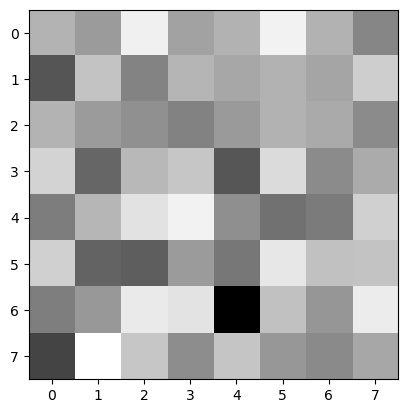

In [58]:
noise = tf.random.normal([1, 64])
generated_image = GEN(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')